<a href="https://colab.research.google.com/github/lorenzlorg/MSc-Thesis-CV/blob/main/4_GIS_Analysis_Trajectory_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRAJECTORY DATA MINING**

Questo notebbok a partire dalle detection georeferenziate ottenute nel notebook precedente serve per eseguire delle analisi per identificare dei pattern nelle traiettorie delle detections

**Reference:**
*   Vedi elaborato tesi
*   https://www2.cs.uh.edu/~ceick/7362/Yongli1.pdf
*   Age and Group-driven Pedestrian Behaviour: from Observations to Simulations





# Lettura dataset

In [ ]:
!apt-get update && apt-get install texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super -y

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:14 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package list

In [ ]:
# se ci sono problemi con grafici
# !pip install matplotlib==3.2.2
import matplotlib
matplotlib.__version__

'3.2.2'

In [ ]:
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [ ]:
# grid
%cd /content/drive/MyDrive/grid
grid_duomo = gpd.read_file('Griglia_2m-SS.shp')  # carico i file griglia

# in alternativa
# grid
# !pip install scikit-mobility
# from skmob.tessellation.tilers import tiler
# from skmob.utils.plot import plot_gdf
# tess_squared = tiler.get('squared', base_shape='Piazza Duomo, Italy', meters=10, crs = 'epsg:32632')
# print("tiles = %s" %len(tess_squared))
# tess_squared.head()

%cd ..
%cd ..
%cd ..

grid_duomo

/content/drive/MyDrive/grid
/content/drive/MyDrive
/content/drive
/content


,Depthmap_R,id,geometry
0,5767220,0,"POLYGON ((514729.000 5034415.000, 514729.000 5..."
1,5832756,1,"POLYGON ((514731.000 5034415.000, 514731.000 5..."
2,5898292,2,"POLYGON ((514733.000 5034415.000, 514733.000 5..."
3,5963828,3,"POLYGON ((514735.000 5034415.000, 514735.000 5..."
4,6029364,4,"POLYGON ((514737.000 5034415.000, 514737.000 5..."
...,...,...,...
7282,11665575,7282,"POLYGON ((514909.000 5034645.000, 514909.000 5..."
7283,11731111,7283,"POLYGON ((514911.000 5034645.000, 514911.000 5..."
7284,11796647,7284,"POLYGON ((514913.000 5034645.000, 514913.000 5..."
7285,11862183,7285,"POLYGON ((514915.000 5034645.000, 514915.000 5..."


In [ ]:
# 07.59
df_geopandas = gpd.read_feather("/content/drive/MyDrive/detections_YOLOv7_SORT/milan_2021-07-15_07_59_31/Copia di detection_milan_2021-07-15_07_59_31_hour.feather")  
datetime_detection = '(08:00 - 08:30)'
hour_label = '8'

# 10.59
# df_geopandas = gpd.read_feather("/content/drive/MyDrive/detections_YOLOv7_SORT/milan_2021-07-15_10_59_31/Copia di detection_milan_2021-07-15_10_59_31_hour.feather")  
# datetime_detection = '(11:00 - 11:30)'
# hour_label = '11'

# 12.44
# df_geopandas = gpd.read_feather("/content/drive/MyDrive/detections_YOLOv7_SORT/milan_2021-07-15_12_44_31/Copia di detection_milan_2021-07-15_12_44_31_hour.feather") 
# datetime_detection = '(12:45 - 13:15)'
# hour_label = '12'

# 14.59
# df_geopandas = gpd.read_feather("/content/drive/MyDrive/detections_YOLOv7_SORT/milan_2021-07-15_14_59_31/Copia di detection_milan_2021-07-15_14_59_31_hour.feather") 
# datetime_detection = '(15:00 - 15:30)'
# hour_label = '15'

# 17.59
# df_geopandas= gpd.read_feather("/content/drive/MyDrive/detections_YOLOv7_SORT/milan_2021-07-15_17_59_31/Copia di detection_milan_2021-07-15_17_59_31_hour.feather")  
# datetime_detection = '(18:00 - 18:30)'
# hour_label = '18'

df_geopandas

,frame,id,class,time,geometry,lon,lat
0,1,0,0,2021-07-15 07:59:31.000,POINT (514785.437 5034541.019),514785.436647,5.034541e+06
1,1,1,0,2021-07-15 07:59:31.000,POINT (514803.842 5034561.403),514803.841525,5.034561e+06
2,1,2,0,2021-07-15 07:59:31.000,POINT (514828.381 5034566.152),514828.381362,5.034566e+06
3,1,3,0,2021-07-15 07:59:31.000,POINT (514806.216 5034555.861),514806.216348,5.034556e+06
4,1,4,0,2021-07-15 07:59:31.000,POINT (514787.614 5034505.396),514787.613568,5.034505e+06
...,...,...,...,...,...,...,...
2351171,27873,54406,0,2021-07-15 08:32:02.040,POINT (514889.533 5034576.047),514889.533053,5.034576e+06
2351172,27873,54407,0,2021-07-15 08:32:02.040,POINT (514789.790 5034563.580),514789.790489,5.034564e+06
2351173,27873,54408,0,2021-07-15 08:32:02.040,POINT (514859.254 5034593.661),514859.254061,5.034594e+06
2351174,27873,54409,0,2021-07-15 08:32:02.040,POINT (514830.954 5034566.152),514830.954087,5.034566e+06


In [ ]:
df_geopandas['id'].nunique()

# nel dataset di partenza considerando la fascia oraria 15.00 - 15.30 si hanno 
# 944.6275  detections 
# 258.074 traiettorie

54407

# Seleziono i frame multipli di 15

dato che ho 15 frame al secondo, se seleziono ogni 15 frame ho intervalli tra un frame e l'altro di 1 secondo

In [ ]:
df_geopandas = df_geopandas[df_geopandas['frame'] % 15 == 0]  # forse ha più senso guardare ogni tot frame, quindi ogni tot istanti
df_geopandas

# alcuni id li andrò a perdere già qui: sono quegli id che però sono comparsi per meno di 1 sec, ad esempio se sono comparsi dal frame 17 al frame 19 
# non appariranno ma ha anche senso dato si tratta di meno di un secondo. Per apparire per almeno uns econdo dovrò avere l'id nei frame ad ese. 17-18-19-20-21, quindi almeno 5 frame

,frame,id,class,time,geometry,lon,lat
897,15,0,0,2021-07-15 07:59:31.980,POINT (514785.239 5034540.029),514785.238745,5.034540e+06
898,15,1,0,2021-07-15 07:59:31.980,POINT (514804.237 5034560.413),514804.237329,5.034560e+06
899,15,2,0,2021-07-15 07:59:31.980,POINT (514829.173 5034567.538),514829.172970,5.034568e+06
900,15,3,0,2021-07-15 07:59:31.980,POINT (514806.414 5034555.861),514806.414250,5.034556e+06
901,15,4,0,2021-07-15 07:59:31.980,POINT (514787.416 5034504.209),514787.415666,5.034504e+06
...,...,...,...,...,...,...,...
2350912,27870,54403,0,2021-07-15 08:32:01.830,POINT (514806.414 5034553.882),514806.414250,5.034554e+06
2350913,27870,54404,0,2021-07-15 08:32:01.830,POINT (514785.635 5034506.188),514785.634549,5.034506e+06
2350914,27870,54405,0,2021-07-15 08:32:01.830,POINT (514885.377 5034579.808),514885.377113,5.034580e+06
2350915,27870,54406,0,2021-07-15 08:32:01.830,POINT (514888.544 5034576.047),514888.543544,5.034576e+06


In [ ]:
df_geopandas['id'].nunique()

# nel dataset di partenza considerando la fascia oraria 15.00 - 15.30 si hanno 
# 621.209 detections 
# 188.885 traiettorie

40787

In [ ]:
df_geopandas[df_geopandas['id']==6]

# prima avevo 521 osservazioni -> 36,47 s
# ora ne ho 34 ma sto considerando secondi -> torna con il risultato sopra

,frame,id,class,time,geometry,lon,lat
903,15,6,0,2021-07-15 07:59:31.980,POINT (514788.603 5034508.563),514788.603078,5.034509e+06
1835,30,6,0,2021-07-15 07:59:33.030,POINT (514788.207 5034506.980),514788.207274,5.034507e+06
2765,45,6,0,2021-07-15 07:59:34.080,POINT (514787.614 5034505.199),514787.613568,5.034505e+06
3708,60,6,0,2021-07-15 07:59:35.130,POINT (514787.020 5034503.615),514787.019862,5.034504e+06
4587,75,6,0,2021-07-15 07:59:36.180,POINT (514785.832 5034501.834),514785.832451,5.034502e+06
5542,90,6,0,2021-07-15 07:59:37.230,POINT (514785.832 5034499.459),514785.832451,5.034499e+06
6441,105,6,0,2021-07-15 07:59:38.280,POINT (514785.437 5034497.282),514785.436647,5.034497e+06
7455,120,6,0,2021-07-15 07:59:39.330,POINT (514785.041 5034494.908),514785.040843,5.034495e+06
8598,135,6,0,2021-07-15 07:59:40.380,POINT (514784.645 5034492.335),514784.645039,5.034492e+06
9761,150,6,0,2021-07-15 07:59:41.430,POINT (514786.228 5034490.950),514786.228255,5.034491e+06


In [ ]:
df_geopandas.groupby('id')['frame'].size()

# anche qui ovviamente ho valori tutti più bassi

id
0         1
1         6
2        26
3        36
4         8
         ..
54403     1
54404     1
54405     1
54406     1
54407     1
Name: frame, Length: 40787, dtype: int64

# Eliminazione punti outliers sulla base dei valori di x e y

In [ ]:
df_geopandas[df_geopandas['lon'] >= 514950]['id'].nunique()

# viene eliminata una tariettoria considerata outlier

2

In [ ]:
df_geopandas = df_geopandas[df_geopandas['lon'] < 514950]

# elimino cosi gli outlier

In [ ]:
df_geopandas['id'].nunique()

# è stata eliminata un traiettoria che probabilmente era fuori dall'area di analisi

40785

In [ ]:
len(df_geopandas)

155207

In [ ]:
import pandas as pd
pd.DataFrame(df_geopandas.groupby('id')['frame'].size().values)

# gli indici sono gli id traiettorie e la colonna 0 indica il numero di punti per ciascuna traiettoria
# quindi ad esempio la traiettoria con id 0 sarà costituita da 79 punti e cosi via

,0
0,1
1,6
2,26
3,36
4,8
...,...
40780,1
40781,1
40782,1
40783,1


In [ ]:
# mpl.plot_trajectories(df_geopandas, return_fig=False, markersize=0.5)

# plt.title('Trajectories initial state', fontsize=20)
# plt.xlabel('x', fontsize=20)
# plt.ylabel('y', fontsize=20)
# plt.show()

# troppo pesante

In [ ]:
df_geopandas.groupby('id')['frame'].size().values.max()

# la traiettoria più lunga è costuita da 2976 punti, mentre quella più corta da 1 punto
# il valore medio è di 36
# ci sono molti outliers
# gran parte delle traiettorie sono costituite da meno di 200 punti

# simile al risultato ottenuto in precedenza

185

# Trajectory data compression: selezione delle traiettorie con uan durata minima (20 frames = 20 s)

ho tante traiettorie, tra cui molte non utili alle analisi perchè poco accurate

una traiettoria accettabile da quanti punti è formata?

considerando una soglia che si basa sul numero di points per traiettroia sto implicitamente considerando l'aspetto temporale.

Ad esempio se considero pedone 1: 


```
df_geopandas[df_geopandas['id'] == 1][['frame', 'id', 'time']]
```


```
	  frame	       id	                time
1	     1	       1	          2021-07-15 14:59:31.000
251	   2	       1	          2021-07-15 14:59:31.070
509	   3	       1	          2021-07-15 14:59:31.140
785	   4	       1	          2021-07-15 14:59:31.210
1073	  5	       1	          2021-07-15 14:59:31.280
...	...	...	...
78870	 250	     1	          2021-07-15 14:59:48.430
79163	 251	     1	          2021-07-15 14:59:48.500
79455	 252	     1	          2021-07-15 14:59:48.570
79737	 253	     1	          2021-07-15 14:59:48.640
80020	 254	     1	          2021-07-15 14:59:48.710
```

si può vedere che la sua traiettoria dura per 254 frame. Ma i frame sono distanti tra loro 70ms quindi dire che seleziono i primi 200 punti, quindi i primi 200 frame significa anche considerare una determinata durata temporale, supponendo che i frame siano tutti consecutivi:

1 frame : 70 ms = 200 frame : Xms
in questo caso Xms = 14000 millisecondi ovvero 14 secondi


Quindi se ad esempio seleziono una soglia di 450 stiamo considerando delle soglie di 31.5 secondi, ovvero delle traiettorie di tale durata.

Alla fine avrò comunque dei valori inferiori di durata temporale dato che andrò ad applicare un ulteriore filtro, quindi elimino dei punti, quindi seleziono un numuero minimo di punti.


questa soglia viene decisa in base alle caratteristiche spaziali dell'area studiata


In [ ]:
# visualizzo thres


import pandas as pd

def pre_proc_num_punti(df, thres):

  df_geopandas = df
  df_geopandas_id_groupby = df_geopandas.groupby('id')['frame'].size()
  # in questo modo ottengo il numero di punti per ogni traiettoria id. Infatti raggruppo per id e poi vado a vedere in quanti frame compare il seguente id, che equivale a vedere a quanti punti ha questo id

  df_geopandas_id_groupby = df_geopandas_id_groupby[df_geopandas_id_groupby >= thres]  # <------------- impostare lunghezza desiderata - commentare se non faccio questo filtering

  df_geopandas_id_groupby = pd.DataFrame({'id':df_geopandas_id_groupby.index})

  df_geopandas_long_traj = df_geopandas[df_geopandas['id'].isin(list(df_geopandas_id_groupby['id']))]
 
  df_geopandas_long_traj['lon'] = df_geopandas_long_traj.geometry.x
  df_geopandas_long_traj['lat'] = df_geopandas_long_traj.geometry.y

  df_geopandas_long_traj = df_geopandas_long_traj[['lon', 'lat', 'time', 'id', 'frame']]
  df_geopandas_long_traj


  # trasformo nuovamente in geodataframe
  df_geopandas_long_traj = gpd.GeoDataFrame(df_geopandas_long_traj, geometry=gpd.points_from_xy(df_geopandas_long_traj.lon, df_geopandas_long_traj.lat))
  df_geopandas_long_traj

  num_punti = len(df_geopandas_long_traj)

  return num_punti


def pre_proc_num_traiet(df, thres):

  df_geopandas = df
  df_geopandas_id_groupby = df_geopandas.groupby('id')['frame'].size()

  df_geopandas_id_groupby = df_geopandas_id_groupby[df_geopandas_id_groupby >= thres]  # <------------- impostare lunghezza desiderata - commentare se non faccio questo filtering

  df_geopandas_id_groupby = pd.DataFrame({'id':df_geopandas_id_groupby.index})

  df_geopandas_long_traj = df_geopandas[df_geopandas['id'].isin(list(df_geopandas_id_groupby['id']))]

  df_geopandas_long_traj['lon'] = df_geopandas_long_traj.geometry.x
  df_geopandas_long_traj['lat'] = df_geopandas_long_traj.geometry.y

  df_geopandas_long_traj = df_geopandas_long_traj[['lon', 'lat', 'time', 'id', 'frame']]
  df_geopandas_long_traj


  # trasformo nuovamente in geodataframe
  df_geopandas_long_traj = gpd.GeoDataFrame(df_geopandas_long_traj, geometry=gpd.points_from_xy(df_geopandas_long_traj.lon, df_geopandas_long_traj.lat))
  df_geopandas_long_traj

  num_traiettorie = df_geopandas_long_traj['id'].nunique()

  return num_traiettorie


list_thres = list(range(0, 60, 5))
list_thres

list_results1 = []
for th in list_thres:
  res = pre_proc_num_punti(df_geopandas, th)
  list_results1.append(res)

list_results2 = []
for th in list_thres:
  res = pre_proc_num_traiet(df_geopandas, th)
  list_results2.append(res)

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


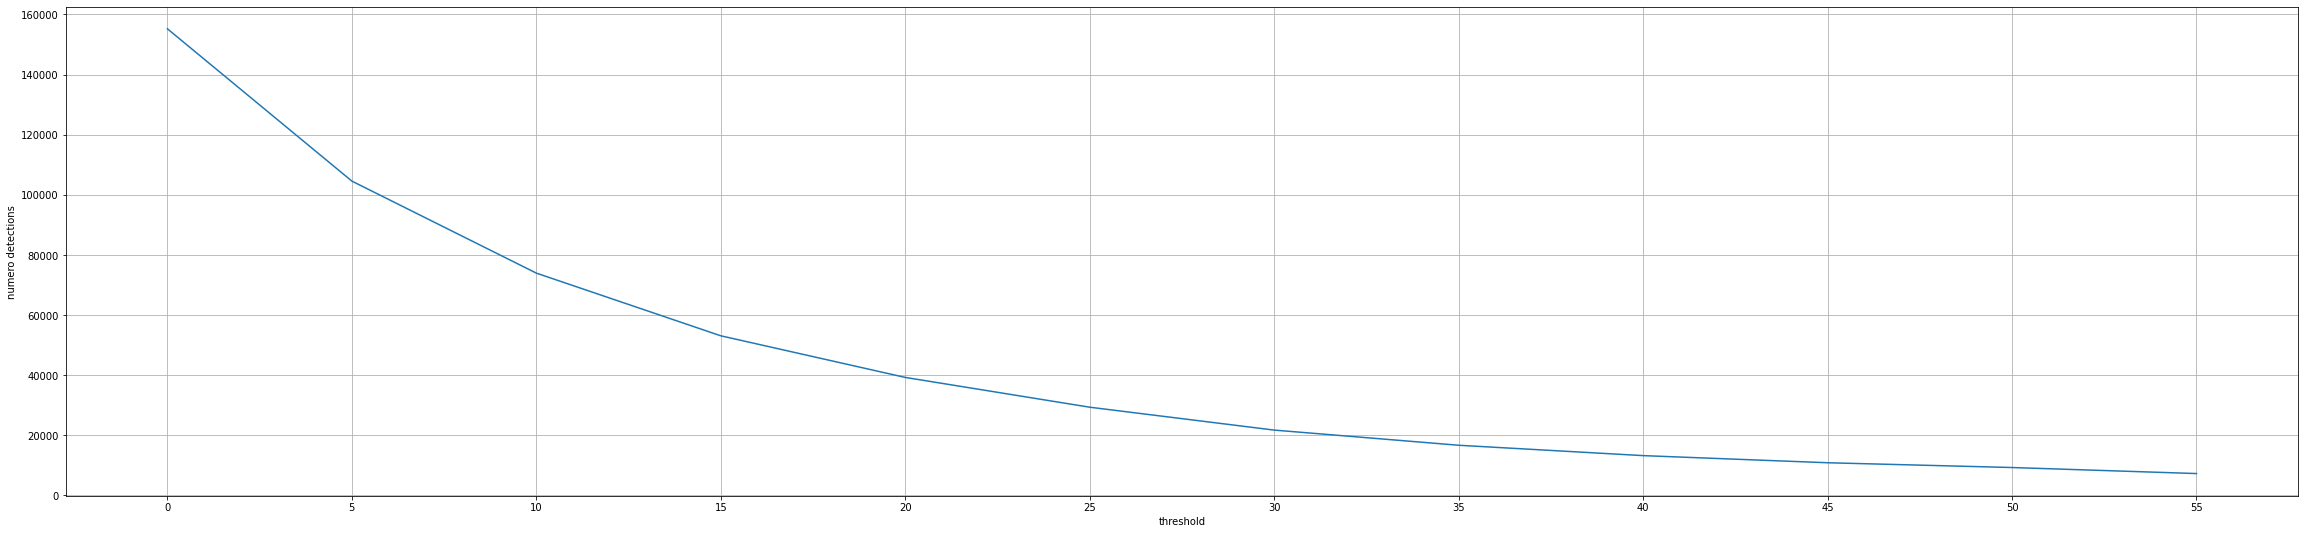

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

t = list_thres
s =  list_results1

ax.plot(t, s)

ax.set(xlabel='threshold', ylabel='numero detections')
ax.grid()

width = 40
height = 9
fig.set_size_inches(width, height)


#specify x-axis locations
x_ticks = list_thres
x_labels = list_thres 

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)


plt.show()

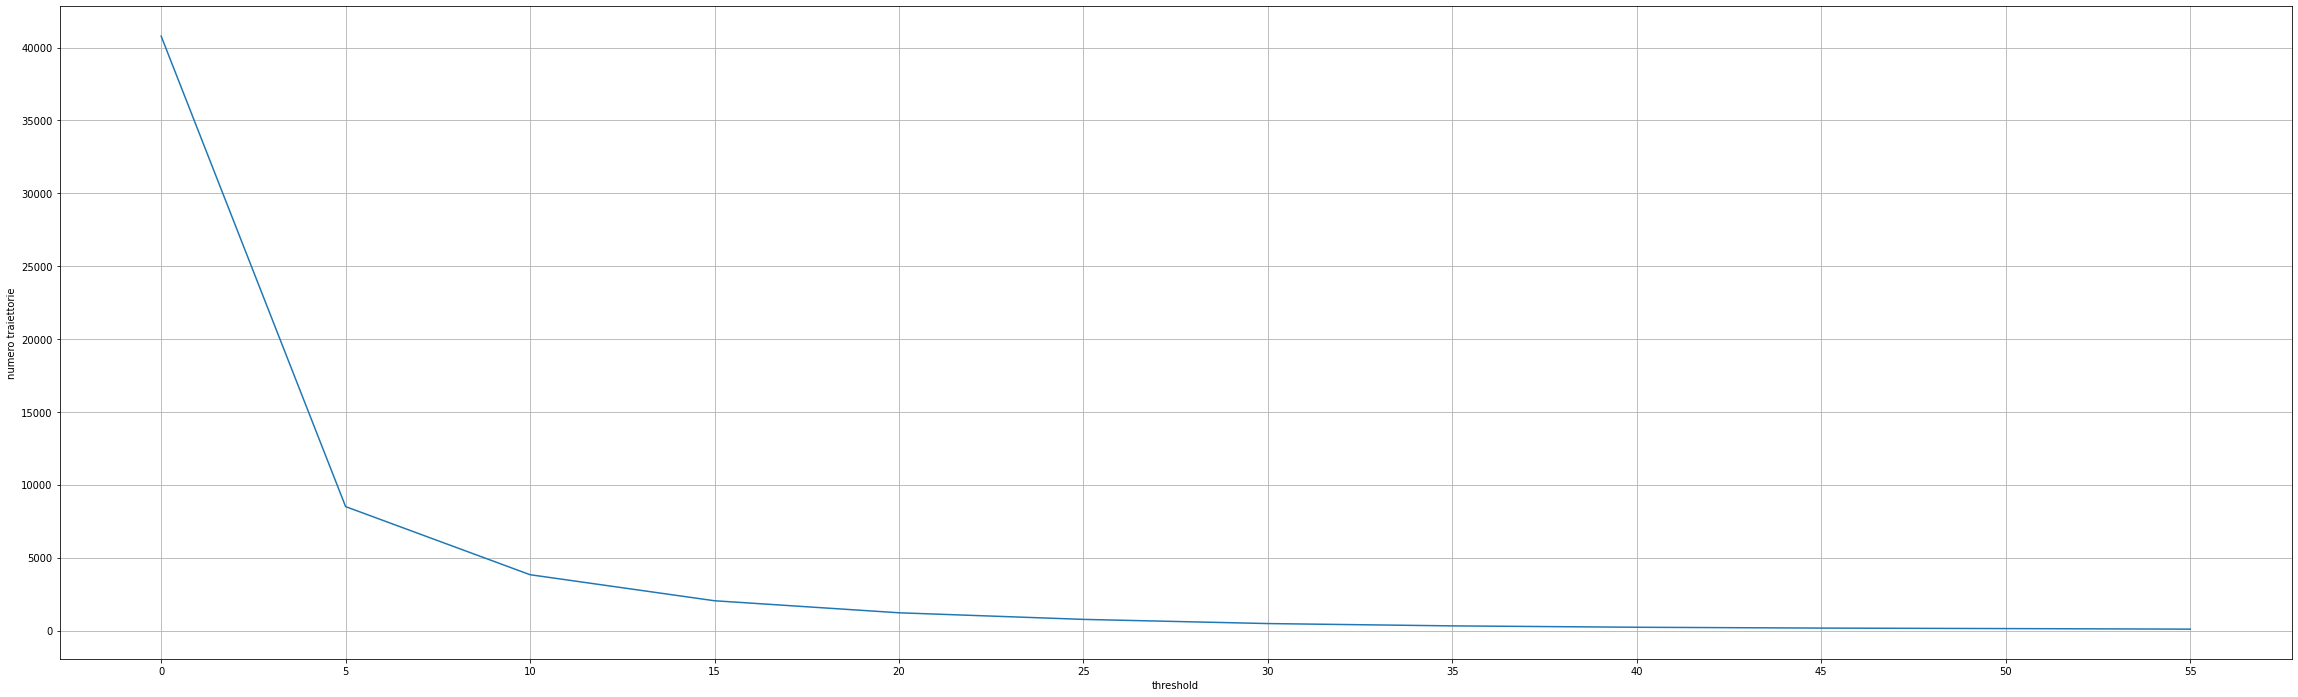

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

t = list_thres
s =  list_results2

ax.plot(t, s)

ax.set(xlabel='threshold', ylabel='numero traiettorie')
ax.grid()

width = 40
height = 12
fig.set_size_inches(width, height)

#specify x-axis locations
x_ticks = list_thres
x_labels = list_thres 

y_ticks = list_results2
y_labels = list_results2 

#add x-axis values to plot
plt.xticks(ticks=x_ticks, labels=x_labels)
# plt.yticks(ticks=y_ticks, labels=y_labels)

plt.show()

In [ ]:
df_thres = pd.DataFrame(
    {'threshold': list_thres,
     'numero detections': list_results1,
     'numero traiettorie': list_results2
    })
df_thres['numero detections eliminate'] = int(df_thres['numero detections'].head(1))- df_thres['numero detections']
df_thres['%_detections eliminate'] = ((int(df_thres['numero detections'].head(1))-df_thres['numero detections'])*100)/int(df_thres['numero detections'].head(1))
df_thres['%_traiettorie eliminate'] = ((int(df_thres['numero traiettorie'].head(1))-df_thres['numero traiettorie'])*100)/int(df_thres['numero traiettorie'].head(1))
df_thres = df_thres[['threshold', 'numero detections', 'numero detections eliminate', '%_detections eliminate', 'numero traiettorie', '%_traiettorie eliminate']]
df_thres

# !!! IMPORTANTE: possiamo decidere di considerare quelle traiettorie che durano un tot, almeno x secondi (mi ricollego al discorso fatto sopra). Quindi una soglia di 450 ci permette di cosniderare 
# tutte quelle traiettorie che sono durate almeno 30 secondi. E questa durata temporale è sensata perchè un pedone con una velocità costante di 1.5 m/s in 30 secondi percorre una distanza di
# circa 45 metri. E abbiamo visto che 40 metri si può considerare la distanza minima di un pedone da una fermata della metro al centro della piazza in veste di turista. Tutte le traiettorie più brevi non possono dirci nulla quindi vengono scartate.



# ALTRE NOTE:

# ho misurato tramite google maps piazza duomo. In lunghezza misura circa 100m. Il minimo percorso da una stazione della metro al centro (minimo percorso che potrebbe essere fatto
# da un turista è di circa 40 metri che se fatto ad una velocità di 1.5 m/s ci si impiega circa 26.6 secondi. Quindi potremmo pensare di considerare come soglia 400 o 450)

# noi comunque ci dobbiamo concentrare più sulla durata che sulla distanza totale percorsa perchè un pedone può rimanere anche fermo per tanto tempo

# queste percentuali elevate indicano che la maggior parte delle traiettorie sono davvero brevi e di poco signficato. Noi siamo interessati a traiettorie più lunghe

# il numero di detection diminusice molto perchè andiamo ad eliminare tutti quei punti che costuituiscono tracce brevissime e di poco significato

# IMPORTANTE: stabilisco io quale sia la minima traiettoria. Ad esempio può essere quella di un turista che da un'uscita della metro va al centro di piazza Duomo. Le traiettorie più brevi non mi interessano quindi provvedo a scartarle. 
# Ne eliminiamo davvero tante perchè effettivamente sono tutte traiettorie molto brevi di qualche secondo che non mi interessano per le analisi. In queste traiettorie eliminate ci sono evidenti problemi di switch.


# ---------> il percorso minimo è di 20 secondi (soglia) che permette ad una velocità di 1.5 m/s di raggiungere il centro della piazza

,threshold,numero detections,numero detections eliminate,%_detections eliminate,numero traiettorie,%_traiettorie eliminate
0,0,155207,0,0.000000,40785,0.000000
1,5,104553,50654,32.636415,8501,79.156553
2,10,73946,81261,52.356530,3828,90.614196
3,15,53099,102108,65.788270,2041,94.995709
4,20,39257,115950,74.706682,1216,97.018512
5,25,29351,125856,81.089126,763,98.129214
6,30,21739,133468,85.993544,476,98.832904
7,35,16695,138512,89.243398,317,99.222753
8,40,13247,141960,91.464947,223,99.453230
9,45,10876,144331,92.992584,166,99.592988


In [ ]:
# data = list(df_thres['numero detections'])
# data.sort()
# data

data = list(range(1,528489))
# data

In [ ]:
from scipy.stats import percentileofscore
percentile_of = percentileofscore(data, 107826)
print(percentile_of)
# This output means that 20.40% of the values in the dataset are less than or equal to 107826

20.40273383690831


In [ ]:
# selezione threshold desiderata
import pandas as pd
THRESHOLD = 20


df_geopandas_id_groupby = df_geopandas.groupby('id')['frame'].size()

df_geopandas_id_groupby = df_geopandas_id_groupby[df_geopandas_id_groupby >= THRESHOLD]  # <------------- impostare lunghezza desiderata - commentare se non faccio questo filtering - 800

df_geopandas_id_groupby = pd.DataFrame({'id':df_geopandas_id_groupby.index})

df_geopandas_long_traj = df_geopandas[df_geopandas['id'].isin(list(df_geopandas_id_groupby['id']))]

df_geopandas_long_traj['lon'] = df_geopandas_long_traj.geometry.x
df_geopandas_long_traj['lat'] = df_geopandas_long_traj.geometry.y

df_geopandas_long_traj = df_geopandas_long_traj[['lon', 'lat', 'time', 'id', 'frame']]
df_geopandas_long_traj


# trasformo nuovamente in geodataframe
df_geopandas_long_traj = gpd.GeoDataFrame(df_geopandas_long_traj, geometry=gpd.points_from_xy(df_geopandas_long_traj.lon, df_geopandas_long_traj.lat))
df_geopandas_long_traj

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,lon,lat,time,id,frame,geometry
899,514829.172970,5.034568e+06,2021-07-15 07:59:31.980,2,15,POINT (514829.173 5034567.538)
900,514806.414250,5.034556e+06,2021-07-15 07:59:31.980,3,15,POINT (514806.414 5034555.861)
902,514812.549209,5.034524e+06,2021-07-15 07:59:31.980,5,15,POINT (514812.549 5034524.197)
904,514819.673678,5.034568e+06,2021-07-15 07:59:31.980,7,15,POINT (514819.674 5034568.329)
907,514799.883487,5.034558e+06,2021-07-15 07:59:31.980,10,15,POINT (514799.883 5034558.434)
...,...,...,...,...,...,...
2350830,514837.880654,5.034577e+06,2021-07-15 08:32:01.830,53421,27870,POINT (514837.881 5034576.641)
2350831,514809.580680,5.034545e+06,2021-07-15 08:32:01.830,53664,27870,POINT (514809.581 5034544.779)
2350832,514816.903051,5.034592e+06,2021-07-15 08:32:01.830,53754,27870,POINT (514816.903 5034591.682)
2350833,514802.258310,5.034526e+06,2021-07-15 08:32:01.830,53766,27870,POINT (514802.258 5034525.978)


In [ ]:
df_geopandas_long_traj['id'].nunique()

# ora ho 2220 traiettorie
# prima dell'eliminazione c'erano 188884, la maggior parte saranno state costituite da pochi punti

1216

In [ ]:
!pip install pymove
import pymove
import pymove as pm
from pymove.visualization import folium as f, matplotlib as mpl
from pymove.utils import visual

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 KB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.9 MB/s eta 0:00:00
  Created wheel for geohash2: filename=geohash2-1.1-py3-none-any.whl size=15562 sha256=091834d02d61d881fe7cbfacc218f0243ddb43dac09187553f3b1b1dc8a8b6ca
  Stored in directory: /root/.cache/pip/wheels/2d/0c/66/dcd768c9e7c26fc81ec59bfe24af9d780fc9dbdf7f90b0cf00
  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28582 sha256=ee7ff390bcf34947cf3a2e77bc743173d9eb7b98201e61494d258da6873d7392
  Stored in directory: /root/.cache/pip/wheels/d4/a9/cf/8c4753b208759e9509ade040a94c3d4271f1756f529c575dc8
Successfully built geohash2 mplleaflet


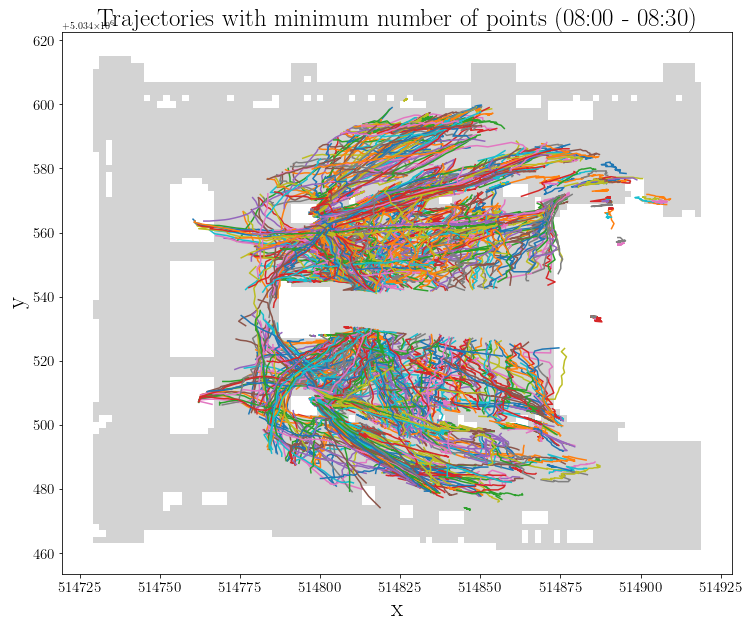

In [ ]:
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig = plt.figure(figsize=(12, 12))
ids = df_geopandas_long_traj['id'].unique()
for id_ in ids:
  self_id = df_geopandas_long_traj[df_geopandas_long_traj['id'] == id_]
  plt.plot(
            self_id['lon'],
            self_id['lat'],
            # markers= 'o',
            # markersize=12
        )
  ax = plt.axes()
 
  # Giving title to the plot
  
  # Showing the plot using plt.show()
grid_duomo[1150:6700].to_crs(epsg=32632).plot(ax=ax, color='lightgrey')

plt.title('Trajectories with minimum number of points {}'.format(datetime_detection), fontsize=25)
plt.xlabel('x', fontsize=25)
plt.ylabel('y', fontsize=25)

# Get the axes object
ax = plt.gca()

# Set the tick font size
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()


In [ ]:
# mpl.plot_trajectories(df_geopandas_long_traj, return_fig=False, markersize=0.5)
# plt.title('Trajectories with minimum number of points {}'.format(datetime_detection), fontsize=20)
# plt.xlabel('x', fontsize=20)
# plt.ylabel('y', fontsize=20)
# plt.show()

In [ ]:
import plotly.express as px
fig = px.histogram(df_geopandas_long_traj.groupby('id')['frame'].size().values)
fig.show()

In [ ]:
import plotly.express as px
fig = px.scatter(x = df_geopandas_long_traj.groupby('id')['frame'].size().index, y =  df_geopandas_long_traj.groupby('id')['frame'].size().values)
fig.show()

In [ ]:
# l'output è "df_geopandas_long_traj"

# Preparazione feature per operazioni successive

The walking speed of an average person is 0.8 m/s–1.5 m/s

In [ ]:
!pip install movingpandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.2 MB/s eta 0:00:00


In [ ]:
df_geopandas_long_traj_mp = df_geopandas_long_traj.copy(deep=False)
df_geopandas_long_traj_mp['Timestamp'] = df_geopandas_long_traj_mp['time']
df_geopandas_long_traj_mp = df_geopandas_long_traj_mp.set_index('time')
df_geopandas_long_traj_mp

,lon,lat,id,frame,geometry,Timestamp
time,,,,,,
2021-07-15 07:59:31.980,514829.172970,5.034568e+06,2,15,POINT (514829.173 5034567.538),2021-07-15 07:59:31.980
2021-07-15 07:59:31.980,514806.414250,5.034556e+06,3,15,POINT (514806.414 5034555.861),2021-07-15 07:59:31.980
2021-07-15 07:59:31.980,514812.549209,5.034524e+06,5,15,POINT (514812.549 5034524.197),2021-07-15 07:59:31.980
2021-07-15 07:59:31.980,514819.673678,5.034568e+06,7,15,POINT (514819.674 5034568.329),2021-07-15 07:59:31.980
2021-07-15 07:59:31.980,514799.883487,5.034558e+06,10,15,POINT (514799.883 5034558.434),2021-07-15 07:59:31.980
...,...,...,...,...,...,...
2021-07-15 08:32:01.830,514837.880654,5.034577e+06,53421,27870,POINT (514837.881 5034576.641),2021-07-15 08:32:01.830
2021-07-15 08:32:01.830,514809.580680,5.034545e+06,53664,27870,POINT (514809.581 5034544.779),2021-07-15 08:32:01.830
2021-07-15 08:32:01.830,514816.903051,5.034592e+06,53754,27870,POINT (514816.903 5034591.682),2021-07-15 08:32:01.830


In [ ]:
import movingpandas as mpd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [ ]:
traj_collection_df = df_geopandas_long_traj_mp.copy(deep=True)
traj_collection_df = traj_collection_df.sort_values(by = ['id', 'frame'])
traj_collection_df

,lon,lat,id,frame,geometry,Timestamp
time,,,,,,
2021-07-15 07:59:31.980,514829.172970,5.034568e+06,2,15,POINT (514829.173 5034567.538),2021-07-15 07:59:31.980
2021-07-15 07:59:33.030,514830.558283,5.034569e+06,2,30,POINT (514830.558 5034569.121),2021-07-15 07:59:33.030
2021-07-15 07:59:34.080,514831.547793,5.034571e+06,2,45,POINT (514831.548 5034570.704),2021-07-15 07:59:34.080
2021-07-15 07:59:35.130,514832.141499,5.034572e+06,2,60,POINT (514832.141 5034572.089),2021-07-15 07:59:35.130
2021-07-15 07:59:36.180,514832.933106,5.034573e+06,2,75,POINT (514832.933 5034573.475),2021-07-15 07:59:36.180
...,...,...,...,...,...,...
2021-07-15 08:31:57.630,514846.192534,5.034575e+06,53815,27810,POINT (514846.193 5034574.662),2021-07-15 08:31:57.630
2021-07-15 08:31:58.680,514844.213515,5.034574e+06,53815,27825,POINT (514844.214 5034574.266),2021-07-15 08:31:58.680
2021-07-15 08:31:59.730,514842.828202,5.034574e+06,53815,27840,POINT (514842.828 5034574.068),2021-07-15 08:31:59.730


In [ ]:
My_list = [*range(0, len(traj_collection_df), 1)]
traj_collection_df['point_id'] = My_list
traj_collection_df['point_id'] = traj_collection_df['point_id'].astype(str) 
traj_collection_df['point_id'] = traj_collection_df['point_id'] + '_' + traj_collection_df['id'].astype(str)  # id point (indice df) + id traj
traj_collection_df['prev_point_id'] = traj_collection_df['point_id'].shift()
traj_collection_df

traj_collection_df['geometry_point'] = gpd.points_from_xy(traj_collection_df['lon'], traj_collection_df['lat'], crs = 'epsg:32632')

traj_collection_df['prev_lon'] = traj_collection_df['lon'].shift()
traj_collection_df['prev_lat'] = traj_collection_df['lat'].shift()
traj_collection_df['geometry_prev_point'] = gpd.points_from_xy(traj_collection_df['prev_lon'], traj_collection_df['prev_lat'], crs = 'epsg:32632')

traj_collection_df

# ottengo lo stesso risultato delel celle successive, evito di usare to_line_gdf()

# 84.581 detections

,lon,lat,id,frame,geometry,Timestamp,point_id,prev_point_id,geometry_point,prev_lon,prev_lat,geometry_prev_point
time,,,,,,,,,,,,
2021-07-15 07:59:31.980,514829.172970,5.034568e+06,2,15,POINT (514829.173 5034567.538),2021-07-15 07:59:31.980,0_2,NaN,POINT (514829.173 5034567.538),NaN,NaN,POINT EMPTY
2021-07-15 07:59:33.030,514830.558283,5.034569e+06,2,30,POINT (514830.558 5034569.121),2021-07-15 07:59:33.030,1_2,0_2,POINT (514830.558 5034569.121),514829.172970,5.034568e+06,POINT (514829.173 5034567.538)
2021-07-15 07:59:34.080,514831.547793,5.034571e+06,2,45,POINT (514831.548 5034570.704),2021-07-15 07:59:34.080,2_2,1_2,POINT (514831.548 5034570.704),514830.558283,5.034569e+06,POINT (514830.558 5034569.121)
2021-07-15 07:59:35.130,514832.141499,5.034572e+06,2,60,POINT (514832.141 5034572.089),2021-07-15 07:59:35.130,3_2,2_2,POINT (514832.141 5034572.089),514831.547793,5.034571e+06,POINT (514831.548 5034570.704)
2021-07-15 07:59:36.180,514832.933106,5.034573e+06,2,75,POINT (514832.933 5034573.475),2021-07-15 07:59:36.180,4_2,3_2,POINT (514832.933 5034573.475),514832.141499,5.034572e+06,POINT (514832.141 5034572.089)
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-15 08:31:57.630,514846.192534,5.034575e+06,53815,27810,POINT (514846.193 5034574.662),2021-07-15 08:31:57.630,39252_53815,39251_53815,POINT (514846.193 5034574.662),514847.973652,5.034575e+06,POINT (514847.974 5034575.058)
2021-07-15 08:31:58.680,514844.213515,5.034574e+06,53815,27825,POINT (514844.214 5034574.266),2021-07-15 08:31:58.680,39253_53815,39252_53815,POINT (514844.214 5034574.266),514846.192534,5.034575e+06,POINT (514846.193 5034574.662)
2021-07-15 08:31:59.730,514842.828202,5.034574e+06,53815,27840,POINT (514842.828 5034574.068),2021-07-15 08:31:59.730,39254_53815,39253_53815,POINT (514842.828 5034574.068),514844.213515,5.034574e+06,POINT (514844.214 5034574.266)


In [ ]:
# la feature distanza può essere anche calcolata come somma dei vari segmenti


lista = []
from movingpandas.geometry_utils import (
    azimuth,
    calculate_initial_compass_bearing,
    angular_difference,
    mrr_diagonal,
    measure_distance_geodesic,
    measure_distance_euclidean,
    measure_distance_spherical,
)

for index, row in traj_collection_df.iterrows():
  diff = measure_distance_euclidean(row['geometry_point'], row['geometry_prev_point'])
  lista.append(diff)

traj_collection_df['distance'] = lista


# dovrei mettere come distance per il punto inziale di ogni traiettoria = 0
import pandas as pd

# supponiamo di avere un DataFrame df con le colonne 'id' e 'value'

# raggruppa i dati per 'id'
groups = traj_collection_df.groupby('id')

# definisci la funzione che modificherà il valore di 'value' per ogni gruppo
def modify_value(group):
  # modifica il valore di 'value' della prima occorrenza di 'id'
  group.loc[group.index[0], 'distance'] = 0
  # restituisci il gruppo con le modifiche apportate
  return group

# applica la funzione a ogni gruppo
traj_collection_df = groups.apply(modify_value)
traj_collection_df

,lon,lat,id,frame,geometry,Timestamp,point_id,prev_point_id,geometry_point,prev_lon,prev_lat,geometry_prev_point,distance
time,,,,,,,,,,,,,
2021-07-15 07:59:31.980,514829.172970,5.034568e+06,2,15,POINT (514829.173 5034567.538),2021-07-15 07:59:31.980,0_2,NaN,POINT (514829.173 5034567.538),NaN,NaN,POINT EMPTY,0.000000
2021-07-15 07:59:33.030,514830.558283,5.034569e+06,2,30,POINT (514830.558 5034569.121),2021-07-15 07:59:33.030,1_2,0_2,POINT (514830.558 5034569.121),514829.172970,5.034568e+06,POINT (514829.173 5034567.538),2.103726
2021-07-15 07:59:34.080,514831.547793,5.034571e+06,2,45,POINT (514831.548 5034570.704),2021-07-15 07:59:34.080,2_2,1_2,POINT (514831.548 5034570.704),514830.558283,5.034569e+06,POINT (514830.558 5034569.121),1.867003
2021-07-15 07:59:35.130,514832.141499,5.034572e+06,2,60,POINT (514832.141 5034572.089),2021-07-15 07:59:35.130,3_2,2_2,POINT (514832.141 5034572.089),514831.547793,5.034571e+06,POINT (514831.548 5034570.704),1.507176
2021-07-15 07:59:36.180,514832.933106,5.034573e+06,2,75,POINT (514832.933 5034573.475),2021-07-15 07:59:36.180,4_2,3_2,POINT (514832.933 5034573.475),514832.141499,5.034572e+06,POINT (514832.141 5034572.089),1.595536
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-15 08:31:57.630,514846.192534,5.034575e+06,53815,27810,POINT (514846.193 5034574.662),2021-07-15 08:31:57.630,39252_53815,39251_53815,POINT (514846.193 5034574.662),514847.973652,5.034575e+06,POINT (514847.974 5034575.058),1.824565
2021-07-15 08:31:58.680,514844.213515,5.034574e+06,53815,27825,POINT (514844.214 5034574.266),2021-07-15 08:31:58.680,39253_53815,39252_53815,POINT (514844.214 5034574.266),514846.192534,5.034575e+06,POINT (514846.193 5034574.662),2.018211
2021-07-15 08:31:59.730,514842.828202,5.034574e+06,53815,27840,POINT (514842.828 5034574.068),2021-07-15 08:31:59.730,39254_53815,39253_53815,POINT (514842.828 5034574.068),514844.213515,5.034574e+06,POINT (514844.214 5034574.266),1.399378


In [ ]:
# lunghezza traiettorie come somma di segmenti

result = traj_collection_df.groupby('id')['distance'].sum()
x = pd.DataFrame(result)
x

,distance
id,
2,53.710618
3,24.615861
5,13.764009
7,35.257642
10,30.392747
...,...
53704,12.122470
53754,6.924132
53756,23.668618


In [ ]:
# l'output è "traj_collection_df" che equivale a "df_geopandas_long_traj" ma risulta arricchito

# DEPRECATED: Trajectory noise filtering: eliminazione delle traiettorie che contengono dei punti che distano dal punto precedente più della soglia consentita (2.5 m)

si rischia che se una traiettoria ha una distanza elevata all'inizio poi perdo tutto il resto che potrebbe essere una buona traiettoria 

Comfortable and maximum walking speed of adults aged 20-79 years: reference values and determinants 

According to Bohannon et al. [18], the mean comfortable speed was 1.27 m/s for women and 1.46 m/s for men, whereas the mean maximum speed was 1.75 m/s for women and 2.53 m/s for men.

Quindi ci sta metetre come soglia 2.5m.


In [ ]:
# in questo momento sto considerando traiettorie lunghe più di 800 punte ma che contengono ancora punti con velocità/distanze elevate

In [ ]:
# se trovo un punto di una traiettoria tanto distaccato dalla sua traiettoria lo escludo come tutti i punti a seguire. Suppongo che ci sia stato ad esempio un errore di switch 

In [ ]:
# traj_collection_df.groupby('id')['frame'].size().min()  # adesso non ho più traiettorie costituite da un solo punto

# tutte le traiettorie ora durano più di 26 sec

In [ ]:
# traj_collection_df['id'].nunique()

In [ ]:
# traj_collection_df

In [ ]:
# import numpy as np
# list_dist_measures = list(np.arange(0, 5, 0.5))

# def find_id_above_threshold(df, thres):
#     if not df[df['distance'] > thres].index.empty:
#         return df['id'].unique()[0]
#     return None

# def distance_filtering(df, thres):
#   traj_collection_df = df
#   df_above_threshold = traj_collection_df.groupby('id').apply(find_id_above_threshold,thres)
#   y = pd.DataFrame(df_above_threshold)
#   some_values = list(y[y[0].isna()].index)  
#   traj_collection_df_new_app = traj_collection_df.loc[traj_collection_df['id'].isin(some_values)]
#   num_det = len(traj_collection_df_new_app)
#   num_traiettorie = traj_collection_df_new_app['id'].nunique()
#   return num_traiettorie, num_det

# list_results3 = []
# list_results4 = []
# for th in list_dist_measures:
#   res1, res2 = distance_filtering(traj_collection_df, th)
#   list_results3.append(res1)
#   list_results4.append(res2)


# df_thres_distances = pd.DataFrame(
#     {'threshold': list_dist_measures,
#      'numero detections': list_results4,
#      'numero traiettorie': list_results3
#     })


# df_thres_distances['%_detections eliminate'] = ((len(traj_collection_df)-df_thres_distances['numero detections'])*100)/len(traj_collection_df)
# df_thres_distances['%_traiettorie eliminate'] = ((traj_collection_df['id'].nunique()-df_thres_distances['numero traiettorie'])*100)/traj_collection_df['id'].nunique()
# df_thres_distances = df_thres_distances[['threshold', 'numero detections', '%_detections eliminate', 'numero traiettorie', '%_traiettorie eliminate']]
# df_thres_distances


# --------> si sceglie 2.5 tenendo conto che delle possibili distorsioni che si ottengono, quindi non avremo distanze esatte e corrette, ammettiamo un margine di errore pur sapendo che nella realtà già 2 metri in un secono sono tanti

In [ ]:
# import plotly.express as px
# fig = px.scatter(traj_collection_df['distance'])
# fig.show()

In [ ]:
# situazione inziale
# num det: 965931
# num traj: 1489
# aumentando la soglia tengo più punti e traiettorie,s e la diminuisco sono più restrittivo

# import numpy as np

# # APPROCCIO 2: se trovo un outlier in una traiettoria allora elimino quella traiettoria -> mi rimarrebbero solo 269 traiettorie contro le 426 dell'approccio sopra. Effettivamente se una traiettoria molto lunga e precisa ha solo il penultimo punto che un outlier è stupido buttare via tutto.
# def find_id_above_threshold(df):
#     if not df[df['distance'] > 2.5].index.empty:
#         return df['id'].unique()[0]
#     return None

# df_above_threshold = traj_collection_df.groupby('id').apply(find_id_above_threshold)

# APPROCCIO 1: trovo un outlier in una traiettoria, elimino quel punto e tutti i punti a seguire. Non è molto sicuro perchè andremmo a modificare la natura delle traiettorie
# APPROCCIO 3: se trovo un outlier splitto e creo nuove traiettorie con id nuovo. Però poi dovrei comunque riapplicare un filtro per vedere se le nuove traiettorie create sono piccole o meno. Nel caso ideale di un unico outlier di una traiettoria tutta corretta li richieremmo di dare un id diverso alla seconda metà della traiettoria quando invece appertiene sicuramente alla prima metà. Andremmo a creare tanto id e aggiugnere informazione.

In [ ]:
# y = pd.DataFrame(df_above_threshold)
# # sono gli id che hanno almeno un punto con una distanza dal precedente maggiore della soglia
# # i nan invece sono gli id delle traiettorie che ci interessano

# y.count()  # sono le traiettorie da escludere che contengono dei punti che distano dal precedente più della soglia

# some_values = list(y[y[0].isna()].index)  # questi sono gli id invece delle traiettorie che ci interessano

# traj_collection_df_new_app = traj_collection_df.loc[traj_collection_df['id'].isin(some_values)]
# traj_collection_df_new_app


# # ora abbiamo 16.660  detection
# # è normale che ho molti meno record, prima stavo considerando intervalli tra un punto e l'altro di 70ms, quindi di 0,07 secondi. Ora di un secondo, che è molto più grande

In [ ]:
# traj_collection_df_new_app['id'].nunique()

# # prima ne avevamo 2220

In [ ]:
# fig = plt.figure(figsize=(15, 15))
# ids = traj_collection_df_new_app['id'].unique()
# for id_ in ids:
#   self_id = traj_collection_df_new_app[traj_collection_df_new_app['id'] == id_]
#   plt.plot(
#             self_id['lon'],
#             self_id['lat'],
#             # markers= 'o',
#             # markersize=12
#         )
#   ax = plt.axes()
 
#   # Giving title to the plot
  
#   # Showing the plot using plt.show()
# grid_duomo.to_crs(epsg=32632).plot(ax=ax, color='lightgrey')

# plt.title('Trajectories after pre-processing {}'.format(datetime_detection), fontsize=20)
# plt.xlabel('x', fontsize=20)
# plt.ylabel('y', fontsize=20)
# plt.show()

In [ ]:
# from pymove.visualization.matplotlib import plot_trajectories
# mpl.plot_trajectories(traj_collection_df_new_app, return_fig=False, markersize=0.5, markers='o')
# plt.title('Trajectories after pre-processing {}'.format(datetime_detection), fontsize=20)
# plt.xlabel('x', fontsize=20)
# plt.ylabel('y', fontsize=20)
# plt.show()

In [ ]:
# traj_collection_df_new_app[traj_collection_df_new_app['distance'] > 2.5]  # i valori di distanza sono corretti ora

In [ ]:
# l'output è "selected_rows" che viene convertito in df nel passaggio successivo, "selected_rows_t"

# Trajectory noise filtering: eliminazione delle traiettorie che contengono dei punti che hanno velocità superiore a 2 m/s

EDIT: non ha senso fare il filtro precedente e questo, o uno o l'altro. Si può fare ad esempio il primo filtro e poi far vedere che non avrò valori di velocità elevati. Uno ovviamente implica l'altro.

Starei sul filtro del valore di velocità che mi permette di fare un ragionamento più robusto.

In [ ]:
# faccio clustering su df_geopandas_long_tra j_new: ricreo feature base dalle quali poi ricavolo quelle più sintetiche per ogni traccia

# forse se elimino le traiettorie non è necessario ricreare le feature, dovrebbero essere rimaste corrette

In [ ]:
# i valori di distanza sono corretti. Ora si procederà ad aggiungere anche al feature velocità per cui bisognerà verificare che non ci sono valori superiori a 1.5 m/s

In [ ]:
# da utilizzare dal momento in cui non utilizziamo il filtro precedente
traj_collection_df_new_app = traj_collection_df

In [ ]:
traj_collection_df_new_app

,lon,lat,id,frame,geometry,Timestamp,point_id,prev_point_id,geometry_point,prev_lon,prev_lat,geometry_prev_point,distance
time,,,,,,,,,,,,,
2021-07-15 07:59:31.980,514829.172970,5.034568e+06,2,15,POINT (514829.173 5034567.538),2021-07-15 07:59:31.980,0_2,NaN,POINT (514829.173 5034567.538),NaN,NaN,POINT EMPTY,0.000000
2021-07-15 07:59:33.030,514830.558283,5.034569e+06,2,30,POINT (514830.558 5034569.121),2021-07-15 07:59:33.030,1_2,0_2,POINT (514830.558 5034569.121),514829.172970,5.034568e+06,POINT (514829.173 5034567.538),2.103726
2021-07-15 07:59:34.080,514831.547793,5.034571e+06,2,45,POINT (514831.548 5034570.704),2021-07-15 07:59:34.080,2_2,1_2,POINT (514831.548 5034570.704),514830.558283,5.034569e+06,POINT (514830.558 5034569.121),1.867003
2021-07-15 07:59:35.130,514832.141499,5.034572e+06,2,60,POINT (514832.141 5034572.089),2021-07-15 07:59:35.130,3_2,2_2,POINT (514832.141 5034572.089),514831.547793,5.034571e+06,POINT (514831.548 5034570.704),1.507176
2021-07-15 07:59:36.180,514832.933106,5.034573e+06,2,75,POINT (514832.933 5034573.475),2021-07-15 07:59:36.180,4_2,3_2,POINT (514832.933 5034573.475),514832.141499,5.034572e+06,POINT (514832.141 5034572.089),1.595536
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-15 08:31:57.630,514846.192534,5.034575e+06,53815,27810,POINT (514846.193 5034574.662),2021-07-15 08:31:57.630,39252_53815,39251_53815,POINT (514846.193 5034574.662),514847.973652,5.034575e+06,POINT (514847.974 5034575.058),1.824565
2021-07-15 08:31:58.680,514844.213515,5.034574e+06,53815,27825,POINT (514844.214 5034574.266),2021-07-15 08:31:58.680,39253_53815,39252_53815,POINT (514844.214 5034574.266),514846.192534,5.034575e+06,POINT (514846.193 5034574.662),2.018211
2021-07-15 08:31:59.730,514842.828202,5.034574e+06,53815,27840,POINT (514842.828 5034574.068),2021-07-15 08:31:59.730,39254_53815,39253_53815,POINT (514842.828 5034574.068),514844.213515,5.034574e+06,POINT (514844.214 5034574.266),1.399378


In [ ]:
df_geopandas_long_traj_new = traj_collection_df_new_app[['lon', 'lat', 'Timestamp', 'id', 'frame']]
df_geopandas_long_traj_new = df_geopandas_long_traj_new.reset_index()
df_geopandas_long_traj_new = df_geopandas_long_traj_new[['lon', 'lat', 'time', 'id', 'frame']]
df_geopandas_long_traj_new = df_geopandas_long_traj_new.rename(columns={"time": "t"})
df_geopandas_long_traj_new

,lon,lat,t,id,frame
0,514829.172970,5.034568e+06,2021-07-15 07:59:31.980,2,15
1,514830.558283,5.034569e+06,2021-07-15 07:59:33.030,2,30
2,514831.547793,5.034571e+06,2021-07-15 07:59:34.080,2,45
3,514832.141499,5.034572e+06,2021-07-15 07:59:35.130,2,60
4,514832.933106,5.034573e+06,2021-07-15 07:59:36.180,2,75
...,...,...,...,...,...
39252,514846.192534,5.034575e+06,2021-07-15 08:31:57.630,53815,27810
39253,514844.213515,5.034574e+06,2021-07-15 08:31:58.680,53815,27825
39254,514842.828202,5.034574e+06,2021-07-15 08:31:59.730,53815,27840
39255,514840.849183,5.034574e+06,2021-07-15 08:32:00.780,53815,27855


In [ ]:
df_geopandas_long_traj_new_new = gpd.GeoDataFrame(df_geopandas_long_traj_new, geometry=gpd.points_from_xy(df_geopandas_long_traj_new.lon, df_geopandas_long_traj_new.lat))
df_geopandas_long_traj_new_new

,lon,lat,t,id,frame,geometry
0,514829.172970,5.034568e+06,2021-07-15 07:59:31.980,2,15,POINT (514829.173 5034567.538)
1,514830.558283,5.034569e+06,2021-07-15 07:59:33.030,2,30,POINT (514830.558 5034569.121)
2,514831.547793,5.034571e+06,2021-07-15 07:59:34.080,2,45,POINT (514831.548 5034570.704)
3,514832.141499,5.034572e+06,2021-07-15 07:59:35.130,2,60,POINT (514832.141 5034572.089)
4,514832.933106,5.034573e+06,2021-07-15 07:59:36.180,2,75,POINT (514832.933 5034573.475)
...,...,...,...,...,...,...
39252,514846.192534,5.034575e+06,2021-07-15 08:31:57.630,53815,27810,POINT (514846.193 5034574.662)
39253,514844.213515,5.034574e+06,2021-07-15 08:31:58.680,53815,27825,POINT (514844.214 5034574.266)
39254,514842.828202,5.034574e+06,2021-07-15 08:31:59.730,53815,27840,POINT (514842.828 5034574.068)
39255,514840.849183,5.034574e+06,2021-07-15 08:32:00.780,53815,27855,POINT (514840.849 5034573.673)


In [ ]:
df_geopandas_long_traj_mp_new = df_geopandas_long_traj_new_new.copy(deep=False)
df_geopandas_long_traj_mp_new['Timestamp'] = df_geopandas_long_traj_mp_new['t']
df_geopandas_long_traj_mp_new = df_geopandas_long_traj_mp_new.set_index('t')
df_geopandas_long_traj_mp_new

,lon,lat,id,frame,geometry,Timestamp
t,,,,,,
2021-07-15 07:59:31.980,514829.172970,5.034568e+06,2,15,POINT (514829.173 5034567.538),2021-07-15 07:59:31.980
2021-07-15 07:59:33.030,514830.558283,5.034569e+06,2,30,POINT (514830.558 5034569.121),2021-07-15 07:59:33.030
2021-07-15 07:59:34.080,514831.547793,5.034571e+06,2,45,POINT (514831.548 5034570.704),2021-07-15 07:59:34.080
2021-07-15 07:59:35.130,514832.141499,5.034572e+06,2,60,POINT (514832.141 5034572.089),2021-07-15 07:59:35.130
2021-07-15 07:59:36.180,514832.933106,5.034573e+06,2,75,POINT (514832.933 5034573.475),2021-07-15 07:59:36.180
...,...,...,...,...,...,...
2021-07-15 08:31:57.630,514846.192534,5.034575e+06,53815,27810,POINT (514846.193 5034574.662),2021-07-15 08:31:57.630
2021-07-15 08:31:58.680,514844.213515,5.034574e+06,53815,27825,POINT (514844.214 5034574.266),2021-07-15 08:31:58.680
2021-07-15 08:31:59.730,514842.828202,5.034574e+06,53815,27840,POINT (514842.828 5034574.068),2021-07-15 08:31:59.730


In [ ]:
joindf = df_geopandas_long_traj_new_new.groupby('id', as_index=False).first()[['id',  'lat', 'lon', 'geometry', 't']]
joindf['t'] = joindf['t'] - timedelta(seconds=1)
joindf

,id,lat,lon,geometry,t
0,2,5.034568e+06,514829.172970,POINT (514829.173 5034567.538),2021-07-15 07:59:30.980
1,3,5.034556e+06,514806.414250,POINT (514806.414 5034555.861),2021-07-15 07:59:30.980
2,5,5.034524e+06,514812.549209,POINT (514812.549 5034524.197),2021-07-15 07:59:30.980
3,7,5.034568e+06,514819.673678,POINT (514819.674 5034568.329),2021-07-15 07:59:30.980
4,10,5.034558e+06,514799.883487,POINT (514799.883 5034558.434),2021-07-15 07:59:30.980
...,...,...,...,...,...
1211,53704,5.034572e+06,514902.000874,POINT (514902.001 5034571.892),2021-07-15 08:31:36.680
1212,53754,5.034591e+06,514816.903051,POINT (514816.903 5034591.484),2021-07-15 08:31:38.780
1213,53756,5.034508e+06,514762.677927,POINT (514762.678 5034508.365),2021-07-15 08:31:38.780
1214,53766,5.034505e+06,514780.093295,POINT (514780.093 5034505.396),2021-07-15 08:31:39.830


In [ ]:
# creo per ogni traj id un punto nel frame 0

test = pd.DataFrame()
test['id'] = list(set(df_geopandas_long_traj_mp_new['id']))
test['frame'] = 0
# test['lon'] = int(df_geopandas_long_traj['lon'][6])  # dovrei mettere lo stesso punto inizio, così vario un po
# test['lat'] = int(df_geopandas_long_traj['lon'][6])
# test['geometry'] = df_geopandas_long_traj['geometry'][6]
# test['Timestamp'] = df_geopandas_long_traj['time'][6] - timedelta(milliseconds=70)

test = test.merge(joindf, on='id', how='left')
test = test.rename(columns={'t':'Timestamp'})

test

,id,frame,lat,lon,geometry,Timestamp
0,2,0,5.034568e+06,514829.172970,POINT (514829.173 5034567.538),2021-07-15 07:59:30.980
1,3,0,5.034556e+06,514806.414250,POINT (514806.414 5034555.861),2021-07-15 07:59:30.980
2,20484,0,5.034542e+06,514815.121934,POINT (514815.122 5034542.008),2021-07-15 08:13:26.780
3,5,0,5.034524e+06,514812.549209,POINT (514812.549 5034524.197),2021-07-15 07:59:30.980
4,22533,0,5.034566e+06,514796.914958,POINT (514796.915 5034565.757),2021-07-15 08:14:39.230
...,...,...,...,...,...,...
1211,12277,0,5.034512e+06,514790.384195,POINT (514790.384 5034511.729),2021-07-15 08:08:52.730
1212,22518,0,5.034566e+06,514856.681336,POINT (514856.681 5034566.350),2021-07-15 08:14:38.180
1213,4088,0,5.034516e+06,514800.081389,POINT (514800.081 5034515.885),2021-07-15 08:02:36.830
1214,32762,0,5.034592e+06,514847.973652,POINT (514847.974 5034592.275),2021-07-15 08:20:42.530


In [ ]:
test['time'] = test['Timestamp']
test = test.set_index('time')
test = test[['lon', 'lat', 'id', 'frame', 'geometry', 'Timestamp']]
test

,lon,lat,id,frame,geometry,Timestamp
time,,,,,,
2021-07-15 07:59:30.980,514829.172970,5.034568e+06,2,0,POINT (514829.173 5034567.538),2021-07-15 07:59:30.980
2021-07-15 07:59:30.980,514806.414250,5.034556e+06,3,0,POINT (514806.414 5034555.861),2021-07-15 07:59:30.980
2021-07-15 08:13:26.780,514815.121934,5.034542e+06,20484,0,POINT (514815.122 5034542.008),2021-07-15 08:13:26.780
2021-07-15 07:59:30.980,514812.549209,5.034524e+06,5,0,POINT (514812.549 5034524.197),2021-07-15 07:59:30.980
2021-07-15 08:14:39.230,514796.914958,5.034566e+06,22533,0,POINT (514796.915 5034565.757),2021-07-15 08:14:39.230
...,...,...,...,...,...,...
2021-07-15 08:08:52.730,514790.384195,5.034512e+06,12277,0,POINT (514790.384 5034511.729),2021-07-15 08:08:52.730
2021-07-15 08:14:38.180,514856.681336,5.034566e+06,22518,0,POINT (514856.681 5034566.350),2021-07-15 08:14:38.180
2021-07-15 08:02:36.830,514800.081389,5.034516e+06,4088,0,POINT (514800.081 5034515.885),2021-07-15 08:02:36.830


In [ ]:
supertest = test.append(df_geopandas_long_traj_mp_new)
supertest = supertest.sort_values(by=['frame', 'id'], ascending=True)
supertest

,lon,lat,id,frame,geometry,Timestamp
2021-07-15 07:59:30.980,514829.172970,5.034568e+06,2,0,POINT (514829.173 5034567.538),2021-07-15 07:59:30.980
2021-07-15 07:59:30.980,514806.414250,5.034556e+06,3,0,POINT (514806.414 5034555.861),2021-07-15 07:59:30.980
2021-07-15 07:59:30.980,514812.549209,5.034524e+06,5,0,POINT (514812.549 5034524.197),2021-07-15 07:59:30.980
2021-07-15 07:59:30.980,514819.673678,5.034568e+06,7,0,POINT (514819.674 5034568.329),2021-07-15 07:59:30.980
2021-07-15 07:59:30.980,514799.883487,5.034558e+06,10,0,POINT (514799.883 5034558.434),2021-07-15 07:59:30.980
...,...,...,...,...,...,...
2021-07-15 08:32:01.830,514837.880654,5.034577e+06,53421,27870,POINT (514837.881 5034576.641),2021-07-15 08:32:01.830
2021-07-15 08:32:01.830,514809.580680,5.034545e+06,53664,27870,POINT (514809.581 5034544.779),2021-07-15 08:32:01.830
2021-07-15 08:32:01.830,514816.903051,5.034592e+06,53754,27870,POINT (514816.903 5034591.682),2021-07-15 08:32:01.830
2021-07-15 08:32:01.830,514802.258310,5.034526e+06,53766,27870,POINT (514802.258 5034525.978),2021-07-15 08:32:01.830


In [ ]:
gdf = gpd.GeoDataFrame(
    supertest, geometry=gpd.points_from_xy(supertest.lon, supertest.lat))
gdf

,lon,lat,id,frame,geometry,Timestamp
2021-07-15 07:59:30.980,514829.172970,5.034568e+06,2,0,POINT (514829.173 5034567.538),2021-07-15 07:59:30.980
2021-07-15 07:59:30.980,514806.414250,5.034556e+06,3,0,POINT (514806.414 5034555.861),2021-07-15 07:59:30.980
2021-07-15 07:59:30.980,514812.549209,5.034524e+06,5,0,POINT (514812.549 5034524.197),2021-07-15 07:59:30.980
2021-07-15 07:59:30.980,514819.673678,5.034568e+06,7,0,POINT (514819.674 5034568.329),2021-07-15 07:59:30.980
2021-07-15 07:59:30.980,514799.883487,5.034558e+06,10,0,POINT (514799.883 5034558.434),2021-07-15 07:59:30.980
...,...,...,...,...,...,...
2021-07-15 08:32:01.830,514837.880654,5.034577e+06,53421,27870,POINT (514837.881 5034576.641),2021-07-15 08:32:01.830
2021-07-15 08:32:01.830,514809.580680,5.034545e+06,53664,27870,POINT (514809.581 5034544.779),2021-07-15 08:32:01.830
2021-07-15 08:32:01.830,514816.903051,5.034592e+06,53754,27870,POINT (514816.903 5034591.682),2021-07-15 08:32:01.830
2021-07-15 08:32:01.830,514802.258310,5.034526e+06,53766,27870,POINT (514802.258 5034525.978),2021-07-15 08:32:01.830


In [ ]:
traj_collection = mpd.TrajectoryCollection(gdf, 'id', min_length=0, crs = 'epsg:32632')

traj_collection.add_speed(overwrite=True)
traj_collection.add_direction(overwrite=True)

traj_collection

/usr/local/lib/python3.8/dist-packages/movingpandas/trajectory.py:133: MissingCRSWarning:

Trajectory generated without CRS. Computations will use Euclideandistances.



TrajectoryCollection with 1216 trajectories

In [ ]:
traj_collection_new_df = traj_collection.to_line_gdf()
traj_collection_new_df

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pa

,lon,lat,id,frame,Timestamp,speed,direction,t,prev_t,geometry
0,514829.172970,5.034568e+06,2,15,2021-07-15 07:59:31.980,0.000000,0.000000,2021-07-15 07:59:31.980,2021-07-15 07:59:30.980,"LINESTRING (514829.173 5034567.538, 514829.173..."
1,514830.558283,5.034569e+06,2,30,2021-07-15 07:59:33.030,2.003549,41.185925,2021-07-15 07:59:33.030,2021-07-15 07:59:31.980,"LINESTRING (514829.173 5034567.538, 514830.558..."
2,514831.547793,5.034571e+06,2,45,2021-07-15 07:59:34.080,1.778098,32.005383,2021-07-15 07:59:34.080,2021-07-15 07:59:33.030,"LINESTRING (514830.558 5034569.121, 514831.548..."
3,514832.141499,5.034572e+06,2,60,2021-07-15 07:59:35.130,1.435406,23.198591,2021-07-15 07:59:35.130,2021-07-15 07:59:34.080,"LINESTRING (514831.548 5034570.704, 514832.141..."
4,514832.933106,5.034573e+06,2,75,2021-07-15 07:59:36.180,1.519558,29.744881,2021-07-15 07:59:36.180,2021-07-15 07:59:35.130,"LINESTRING (514832.141 5034572.089, 514832.933..."
...,...,...,...,...,...,...,...,...,...,...
39252,514846.192534,5.034575e+06,53815,27810,2021-07-15 08:31:57.630,1.737681,257.471192,2021-07-15 08:31:57.630,2021-07-15 08:31:56.580,"LINESTRING (514847.974 5034575.058, 514846.193..."
39253,514844.213515,5.034574e+06,53815,27825,2021-07-15 08:31:58.680,1.922106,258.690068,2021-07-15 08:31:58.680,2021-07-15 08:31:57.630,"LINESTRING (514846.193 5034574.662, 514844.214..."
39254,514842.828202,5.034574e+06,53815,27840,2021-07-15 08:31:59.730,1.332741,261.869898,2021-07-15 08:31:59.730,2021-07-15 08:31:58.680,"LINESTRING (514844.214 5034574.266, 514842.828..."
39255,514840.849183,5.034574e+06,53815,27855,2021-07-15 08:32:00.780,1.922106,258.690068,2021-07-15 08:32:00.780,2021-07-15 08:31:59.730,"LINESTRING (514842.828 5034574.068, 514840.849..."


In [ ]:
My_list = [*range(0, len(traj_collection_new_df), 1)]
traj_collection_new_df['point_id'] = My_list
traj_collection_new_df['point_id'] = traj_collection_new_df['point_id'].astype(str) 
traj_collection_new_df['point_id'] = traj_collection_new_df['point_id'] + '_' + traj_collection_new_df['id'].astype(str)  # id point + id traj
traj_collection_new_df['prev_point_id'] = traj_collection_new_df['point_id'].shift()
traj_collection_new_df

traj_collection_new_df['geometry_point'] = gpd.points_from_xy(traj_collection_new_df['lon'], traj_collection_new_df['lat'], crs = 'epsg:32632')

traj_collection_new_df['prev_lon'] = traj_collection_new_df['lon'].shift()
traj_collection_new_df['prev_lat'] = traj_collection_new_df['lat'].shift()
traj_collection_new_df['geometry_prev_point'] = gpd.points_from_xy(traj_collection_new_df['prev_lon'], traj_collection_new_df['prev_lat'], crs = 'epsg:32632')

traj_collection_new_df

,lon,lat,id,frame,Timestamp,speed,direction,t,prev_t,geometry,point_id,prev_point_id,geometry_point,prev_lon,prev_lat,geometry_prev_point
0,514829.172970,5.034568e+06,2,15,2021-07-15 07:59:31.980,0.000000,0.000000,2021-07-15 07:59:31.980,2021-07-15 07:59:30.980,"LINESTRING (514829.173 5034567.538, 514829.173...",0_2,NaN,POINT (514829.173 5034567.538),NaN,NaN,POINT EMPTY
1,514830.558283,5.034569e+06,2,30,2021-07-15 07:59:33.030,2.003549,41.185925,2021-07-15 07:59:33.030,2021-07-15 07:59:31.980,"LINESTRING (514829.173 5034567.538, 514830.558...",1_2,0_2,POINT (514830.558 5034569.121),514829.172970,5.034568e+06,POINT (514829.173 5034567.538)
2,514831.547793,5.034571e+06,2,45,2021-07-15 07:59:34.080,1.778098,32.005383,2021-07-15 07:59:34.080,2021-07-15 07:59:33.030,"LINESTRING (514830.558 5034569.121, 514831.548...",2_2,1_2,POINT (514831.548 5034570.704),514830.558283,5.034569e+06,POINT (514830.558 5034569.121)
3,514832.141499,5.034572e+06,2,60,2021-07-15 07:59:35.130,1.435406,23.198591,2021-07-15 07:59:35.130,2021-07-15 07:59:34.080,"LINESTRING (514831.548 5034570.704, 514832.141...",3_2,2_2,POINT (514832.141 5034572.089),514831.547793,5.034571e+06,POINT (514831.548 5034570.704)
4,514832.933106,5.034573e+06,2,75,2021-07-15 07:59:36.180,1.519558,29.744881,2021-07-15 07:59:36.180,2021-07-15 07:59:35.130,"LINESTRING (514832.141 5034572.089, 514832.933...",4_2,3_2,POINT (514832.933 5034573.475),514832.141499,5.034572e+06,POINT (514832.141 5034572.089)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39252,514846.192534,5.034575e+06,53815,27810,2021-07-15 08:31:57.630,1.737681,257.471192,2021-07-15 08:31:57.630,2021-07-15 08:31:56.580,"LINESTRING (514847.974 5034575.058, 514846.193...",39252_53815,39251_53815,POINT (514846.193 5034574.662),514847.973652,5.034575e+06,POINT (514847.974 5034575.058)
39253,514844.213515,5.034574e+06,53815,27825,2021-07-15 08:31:58.680,1.922106,258.690068,2021-07-15 08:31:58.680,2021-07-15 08:31:57.630,"LINESTRING (514846.193 5034574.662, 514844.214...",39253_53815,39252_53815,POINT (514844.214 5034574.266),514846.192534,5.034575e+06,POINT (514846.193 5034574.662)
39254,514842.828202,5.034574e+06,53815,27840,2021-07-15 08:31:59.730,1.332741,261.869898,2021-07-15 08:31:59.730,2021-07-15 08:31:58.680,"LINESTRING (514844.214 5034574.266, 514842.828...",39254_53815,39253_53815,POINT (514842.828 5034574.068),514844.213515,5.034574e+06,POINT (514844.214 5034574.266)
39255,514840.849183,5.034574e+06,53815,27855,2021-07-15 08:32:00.780,1.922106,258.690068,2021-07-15 08:32:00.780,2021-07-15 08:31:59.730,"LINESTRING (514842.828 5034574.068, 514840.849...",39255_53815,39254_53815,POINT (514840.849 5034573.673),514842.828202,5.034574e+06,POINT (514842.828 5034574.068)


In [ ]:
lista = []
from movingpandas.geometry_utils import (
    azimuth,
    calculate_initial_compass_bearing,
    angular_difference,
    mrr_diagonal,
    measure_distance_geodesic,
    measure_distance_euclidean,
    measure_distance_spherical,
)

for index, row in traj_collection_new_df.iterrows():
  diff = measure_distance_euclidean(row['geometry_point'], row['geometry_prev_point'])
  lista.append(diff)

traj_collection_new_df['distance'] = lista


# dovrei mettere come distance per il punto inziale di ogni traiettoria = 0
import pandas as pd

# supponiamo di avere un DataFrame df con le colonne 'id' e 'value'

# raggruppa i dati per 'id'
groups = traj_collection_new_df.groupby('id')

# definisci la funzione che modificherà il valore di 'value' per ogni gruppo
def modify_value(group):
  # modifica il valore di 'value' della prima occorrenza di 'id'
  group.loc[group.index[0], 'distance'] = 0
  # restituisci il gruppo con le modifiche apportate
  return group

# applica la funzione a ogni gruppo
traj_collection_new_df = groups.apply(modify_value)
traj_collection_new_df

,lon,lat,id,frame,Timestamp,speed,direction,t,prev_t,geometry,point_id,prev_point_id,geometry_point,prev_lon,prev_lat,geometry_prev_point,distance
0,514829.172970,5.034568e+06,2,15,2021-07-15 07:59:31.980,0.000000,0.000000,2021-07-15 07:59:31.980,2021-07-15 07:59:30.980,"LINESTRING (514829.173 5034567.538, 514829.173...",0_2,NaN,POINT (514829.173 5034567.538),NaN,NaN,POINT EMPTY,0.000000
1,514830.558283,5.034569e+06,2,30,2021-07-15 07:59:33.030,2.003549,41.185925,2021-07-15 07:59:33.030,2021-07-15 07:59:31.980,"LINESTRING (514829.173 5034567.538, 514830.558...",1_2,0_2,POINT (514830.558 5034569.121),514829.172970,5.034568e+06,POINT (514829.173 5034567.538),2.103726
2,514831.547793,5.034571e+06,2,45,2021-07-15 07:59:34.080,1.778098,32.005383,2021-07-15 07:59:34.080,2021-07-15 07:59:33.030,"LINESTRING (514830.558 5034569.121, 514831.548...",2_2,1_2,POINT (514831.548 5034570.704),514830.558283,5.034569e+06,POINT (514830.558 5034569.121),1.867003
3,514832.141499,5.034572e+06,2,60,2021-07-15 07:59:35.130,1.435406,23.198591,2021-07-15 07:59:35.130,2021-07-15 07:59:34.080,"LINESTRING (514831.548 5034570.704, 514832.141...",3_2,2_2,POINT (514832.141 5034572.089),514831.547793,5.034571e+06,POINT (514831.548 5034570.704),1.507176
4,514832.933106,5.034573e+06,2,75,2021-07-15 07:59:36.180,1.519558,29.744881,2021-07-15 07:59:36.180,2021-07-15 07:59:35.130,"LINESTRING (514832.141 5034572.089, 514832.933...",4_2,3_2,POINT (514832.933 5034573.475),514832.141499,5.034572e+06,POINT (514832.141 5034572.089),1.595536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39252,514846.192534,5.034575e+06,53815,27810,2021-07-15 08:31:57.630,1.737681,257.471192,2021-07-15 08:31:57.630,2021-07-15 08:31:56.580,"LINESTRING (514847.974 5034575.058, 514846.193...",39252_53815,39251_53815,POINT (514846.193 5034574.662),514847.973652,5.034575e+06,POINT (514847.974 5034575.058),1.824565
39253,514844.213515,5.034574e+06,53815,27825,2021-07-15 08:31:58.680,1.922106,258.690068,2021-07-15 08:31:58.680,2021-07-15 08:31:57.630,"LINESTRING (514846.193 5034574.662, 514844.214...",39253_53815,39252_53815,POINT (514844.214 5034574.266),514846.192534,5.034575e+06,POINT (514846.193 5034574.662),2.018211
39254,514842.828202,5.034574e+06,53815,27840,2021-07-15 08:31:59.730,1.332741,261.869898,2021-07-15 08:31:59.730,2021-07-15 08:31:58.680,"LINESTRING (514844.214 5034574.266, 514842.828...",39254_53815,39253_53815,POINT (514842.828 5034574.068),514844.213515,5.034574e+06,POINT (514844.214 5034574.266),1.399378
39255,514840.849183,5.034574e+06,53815,27855,2021-07-15 08:32:00.780,1.922106,258.690068,2021-07-15 08:32:00.780,2021-07-15 08:31:59.730,"LINESTRING (514842.828 5034574.068, 514840.849...",39255_53815,39254_53815,POINT (514840.849 5034573.673),514842.828202,5.034574e+06,POINT (514842.828 5034574.068),2.018211


In [ ]:
traj_collection_new_df.head()

,lon,lat,id,frame,Timestamp,speed,direction,t,prev_t,geometry,point_id,prev_point_id,geometry_point,prev_lon,prev_lat,geometry_prev_point,distance
0,514829.172970,5.034568e+06,2,15,2021-07-15 07:59:31.980,0.000000,0.000000,2021-07-15 07:59:31.980,2021-07-15 07:59:30.980,"LINESTRING (514829.173 5034567.538, 514829.173...",0_2,NaN,POINT (514829.173 5034567.538),NaN,NaN,POINT EMPTY,0.000000
1,514830.558283,5.034569e+06,2,30,2021-07-15 07:59:33.030,2.003549,41.185925,2021-07-15 07:59:33.030,2021-07-15 07:59:31.980,"LINESTRING (514829.173 5034567.538, 514830.558...",1_2,0_2,POINT (514830.558 5034569.121),514829.172970,5.034568e+06,POINT (514829.173 5034567.538),2.103726
2,514831.547793,5.034571e+06,2,45,2021-07-15 07:59:34.080,1.778098,32.005383,2021-07-15 07:59:34.080,2021-07-15 07:59:33.030,"LINESTRING (514830.558 5034569.121, 514831.548...",2_2,1_2,POINT (514831.548 5034570.704),514830.558283,5.034569e+06,POINT (514830.558 5034569.121),1.867003
3,514832.141499,5.034572e+06,2,60,2021-07-15 07:59:35.130,1.435406,23.198591,2021-07-15 07:59:35.130,2021-07-15 07:59:34.080,"LINESTRING (514831.548 5034570.704, 514832.141...",3_2,2_2,POINT (514832.141 5034572.089),514831.547793,5.034571e+06,POINT (514831.548 5034570.704),1.507176
4,514832.933106,5.034573e+06,2,75,2021-07-15 07:59:36.180,1.519558,29.744881,2021-07-15 07:59:36.180,2021-07-15 07:59:35.130,"LINESTRING (514832.141 5034572.089, 514832.933...",4_2,3_2,POINT (514832.933 5034573.475),514832.141499,5.034572e+06,POINT (514832.141 5034572.089),1.595536


In [ ]:
# a questo punto ho aggiunto la feature speed e faccio un controllo anche su quello

In [ ]:
traj_collection_new_df['id'].nunique()  # ottengo correttamente lo stesso numero di traiettorie del passaggio precedente. L'unica differenza è che stata aggiunta la velocità

1216

In [ ]:
traj_collection_new_df['distance'].max() 

26.04271881772864

In [ ]:
import plotly.express as px
fig = px.histogram(traj_collection_new_df['distance'])
fig.show()

In [ ]:
fig = px.histogram(traj_collection_new_df['speed'])
fig.show()

In [ ]:
traj_collection_new_df['speed'].max()  # abbiamo però un problrma di velocità

# magari con questi dati le velocità sono più sensate, nel caso potrei provare anche sopra come uno dei primi filtri

24.80258935021775

In [ ]:
# testing

# se riesco ok altrimenti si dice che non si è considerato la velocità perchè valori troppo elevsati


import numpy as np
list_dist_measures = list(np.arange(0, 3, 0.5))
# più di 2.5 non ci sono valori, il max è 2.36 (quando si usava il filtro della distanza tra punti)

def find_id_above_threshold(df, thres):
    if not df[df['speed'] > thres].index.empty:
        return df['id'].unique()[0]
    return None

def distance_filtering(df, thres):
  traj_collection_df = df
  df_above_threshold = traj_collection_df.groupby('id').apply(find_id_above_threshold,thres)
  y = pd.DataFrame(df_above_threshold)
  some_values = list(y[y[0].isna()].index)  
  traj_collection_df_new_app = traj_collection_df.loc[traj_collection_df['id'].isin(some_values)]
  num_det = len(traj_collection_df_new_app)
  num_traiettorie = traj_collection_df_new_app['id'].nunique()
  return num_traiettorie, num_det

list_results3 = []
list_results4 = []
for th in list_dist_measures:
  res1, res2 = distance_filtering(traj_collection_new_df, th)
  list_results3.append(res1)
  list_results4.append(res2)


df_thres_distances = pd.DataFrame(
    {'threshold': list_dist_measures,
     'numero detections': list_results4,
     'numero traiettorie': list_results3
    })


df_thres_distances['%_detections eliminate'] = ((len(traj_collection_new_df)-df_thres_distances['numero detections'])*100)/len(traj_collection_new_df)
df_thres_distances['%_traiettorie eliminate'] = ((traj_collection_new_df['id'].nunique()-df_thres_distances['numero traiettorie'])*100)/traj_collection_new_df['id'].nunique()
df_thres_distances = df_thres_distances[['threshold', 'numero detections', '%_detections eliminate', 'numero traiettorie', '%_traiettorie eliminate']]
df_thres_distances

,threshold,numero detections,%_detections eliminate,numero traiettorie,%_traiettorie eliminate
0,0.0,0,100.000000,0,100.000000
1,0.5,147,99.625544,6,99.506579
2,1.0,1415,96.395547,44,96.381579
3,1.5,3691,90.597855,111,90.871711
4,2.0,7966,79.708078,255,79.029605
5,2.5,14366,63.405253,460,62.171053


In [ ]:
import numpy as np

# APPROCCIO 2: se trovo un outlier in una traiettoria allora elimino quella traiettoria -> mi rimarrebbero solo 269 traiettorie contro le 426 dell'approccio sopra. Effettivamente se una traiettoria molto lunga e precisa ha solo il penultimo punto che un outlier è stupido buttare via tutto.
def find_id_above_threshold(df):
    if not df[df['speed'] > 2].index.empty:  # per risultati ppt ho usato 2.5
        return df['id'].unique()[0]
    return None

df_above_threshold = traj_collection_new_df.groupby('id').apply(find_id_above_threshold)
df_above_threshold

id
2            2.0
3            3.0
5            5.0
7            7.0
10          10.0
          ...   
53704    53704.0
53754        NaN
53756    53756.0
53766    53766.0
53815    53815.0
Length: 1216, dtype: float64

In [ ]:
y = pd.DataFrame(df_above_threshold)
# sono gli id che hanno almeno un punto con una distanza dal precedente maggiore della soglia
# i nan invece sono gli id delle traiettorie che ci interessano

y.count()  # sono le traiettorie da escludere che contengono dei punti che distano dal precedente più della soglia

some_values = list(y[y[0].isna()].index)  # questi sono gli id invece delle traiettorie che ci interessano

traj_collection_df_new_app = traj_collection_new_df.loc[traj_collection_new_df['id'].isin(some_values)]
traj_collection_df_new_app

,lon,lat,id,frame,Timestamp,speed,direction,t,prev_t,geometry,point_id,prev_point_id,geometry_point,prev_lon,prev_lat,geometry_prev_point,distance
361,514789.988391,5.034519e+06,16,15,2021-07-15 07:59:31.980,0.000000,0.0,2021-07-15 07:59:31.980,2021-07-15 07:59:30.980,"LINESTRING (514789.988 5034519.052, 514789.988...",361_16,360_15,POINT (514789.988 5034519.052),514829.370872,5.034506e+06,POINT (514829.371 5034505.594),0.000000
362,514789.988391,5.034519e+06,16,30,2021-07-15 07:59:33.030,0.000000,0.0,2021-07-15 07:59:33.030,2021-07-15 07:59:31.980,"LINESTRING (514789.988 5034519.052, 514789.988...",362_16,361_16,POINT (514789.988 5034519.052),514789.988391,5.034519e+06,POINT (514789.988 5034519.052),0.000000
363,514789.988391,5.034519e+06,16,45,2021-07-15 07:59:34.080,0.000000,0.0,2021-07-15 07:59:34.080,2021-07-15 07:59:33.030,"LINESTRING (514789.988 5034519.052, 514789.988...",363_16,362_16,POINT (514789.988 5034519.052),514789.988391,5.034519e+06,POINT (514789.988 5034519.052),0.000000
364,514789.988391,5.034519e+06,16,60,2021-07-15 07:59:35.130,0.000000,0.0,2021-07-15 07:59:35.130,2021-07-15 07:59:34.080,"LINESTRING (514789.988 5034519.052, 514789.988...",364_16,363_16,POINT (514789.988 5034519.052),514789.988391,5.034519e+06,POINT (514789.988 5034519.052),0.000000
365,514789.988391,5.034519e+06,16,75,2021-07-15 07:59:36.180,0.000000,0.0,2021-07-15 07:59:36.180,2021-07-15 07:59:35.130,"LINESTRING (514789.988 5034519.052, 514789.988...",365_16,364_16,POINT (514789.988 5034519.052),514789.988391,5.034519e+06,POINT (514789.988 5034519.052),0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39190,514817.100953,5.034592e+06,53754,27810,2021-07-15 08:31:57.630,0.000000,0.0,2021-07-15 08:31:57.630,2021-07-15 08:31:56.580,"LINESTRING (514817.101 5034591.682, 514817.101...",39190_53754,39189_53754,POINT (514817.101 5034591.682),514817.100953,5.034592e+06,POINT (514817.101 5034591.682),0.000000
39191,514817.100953,5.034592e+06,53754,27825,2021-07-15 08:31:58.680,0.000000,0.0,2021-07-15 08:31:58.680,2021-07-15 08:31:57.630,"LINESTRING (514817.101 5034591.682, 514817.101...",39191_53754,39190_53754,POINT (514817.101 5034591.682),514817.100953,5.034592e+06,POINT (514817.101 5034591.682),0.000000
39192,514817.100953,5.034592e+06,53754,27840,2021-07-15 08:31:59.730,0.000000,0.0,2021-07-15 08:31:59.730,2021-07-15 08:31:58.680,"LINESTRING (514817.101 5034591.682, 514817.101...",39192_53754,39191_53754,POINT (514817.101 5034591.682),514817.100953,5.034592e+06,POINT (514817.101 5034591.682),0.000000
39193,514817.100953,5.034592e+06,53754,27855,2021-07-15 08:32:00.780,0.000000,0.0,2021-07-15 08:32:00.780,2021-07-15 08:31:59.730,"LINESTRING (514817.101 5034591.682, 514817.101...",39193_53754,39192_53754,POINT (514817.101 5034591.682),514817.100953,5.034592e+06,POINT (514817.101 5034591.682),0.000000


In [ ]:
# da eliminare

### cumulative curve TEST

In [ ]:
# test_df = traj_collection_df_new_app[['lon', 'lat', 'geometry', 'id', 'frame']]
# test_df

In [ ]:
'''
import pandas as pd
points = test_df
points = points.rename(columns={'lon': 'x', 'lat': 'y'})

min_list = list(range(1,points['frame'].max()+1))  # versione originale: range(1,27862)
def duplicate(testList, n):
  return [ele for ele in testList for _ in range(n)]


min_lsit_new = duplicate(min_list,900)
zed = pd.DataFrame(min_lsit_new)


# devo selezionare però solo fino a 30
frame_list = list(range(1,points['frame'].max()+1))
t = min_lsit_new[:len(frame_list)]

z = pd.DataFrame({'frame': frame_list})
z['min'] = t

points_new = points.merge(z, on='frame', how='left')
points_new
'''

"\nimport pandas as pd\npoints = test_df\npoints = points.rename(columns={'lon': 'x', 'lat': 'y'})\n\nmin_list = list(range(1,points['frame'].max()+1))  # versione originale: range(1,27862)\ndef duplicate(testList, n):\n  return [ele for ele in testList for _ in range(n)]\n\n\nmin_lsit_new = duplicate(min_list,900)\nzed = pd.DataFrame(min_lsit_new)\n\n\n# devo selezionare però solo fino a 30\nframe_list = list(range(1,points['frame'].max()+1))\nt = min_lsit_new[:len(frame_list)]\n\nz = pd.DataFrame({'frame': frame_list})\nz['min'] = t\n\npoints_new = points.merge(z, on='frame', how='left')\npoints_new\n"

In [ ]:
'''
list_min = [5, 10, 15, 20, 25, 31]
list_counts = []
import pandas as pd
from geopandas.tools import sjoin

for i in list_min:
  df_temp = points_new[points_new['min'] <= i]
  list_counts.append(df_temp['id'].nunique())
  
list_counts
'''

"\nlist_min = [5, 10, 15, 20, 25, 31]\nlist_counts = []\nimport pandas as pd\nfrom geopandas.tools import sjoin\n\nfor i in list_min:\n  df_temp = points_new[points_new['min'] <= i]\n  list_counts.append(df_temp['id'].nunique())\n  \nlist_counts\n"

In [ ]:
'''
from matplotlib import pyplot as plt

plt.plot(list_min, list_counts)
plt.scatter(list_min, list_counts, color='red')
'''

"\nfrom matplotlib import pyplot as plt\n\nplt.plot(list_min, list_counts)\nplt.scatter(list_min, list_counts, color='red')\n"

In [ ]:
# da eliminare

In [ ]:
traj_collection_df_new_app['id'].nunique()

# ora ne ho 809, prima 1145, ho eliminato quelle traiettorie che contenevano valori di velocità elevati

255

In [ ]:
traj_collection_df_new_app['speed'].max()  # ora il valore di velocità è minore di una certa soglia

1.9677682247053232

In [ ]:
traj_collection_df_new_app['distance'].max()  # avendo diminuito la velocità massima sono diminuite anche le distanze
# questo vuol dire che le distanze da un punto all'altro erano associate a velocità elevate

2.0661566359405894

# Output traiettorie pre processate

In [ ]:
# from pymove.visualization.matplotlib import plot_trajectories
# mpl.plot_trajectories(traj_collection_df_new_app, return_fig=False, markersize=0.5, markers='o')
# plt.title('Trajectories after pre-processing {}'.format(datetime_detection), fontsize=20)
# plt.xlabel('x', fontsize=20)
# plt.ylabel('y', fontsize=20)
# plt.show()

In [ ]:
# !apt-get update && apt-get install texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super -y

In [ ]:
datetime_detection

'(08:00 - 08:30)'

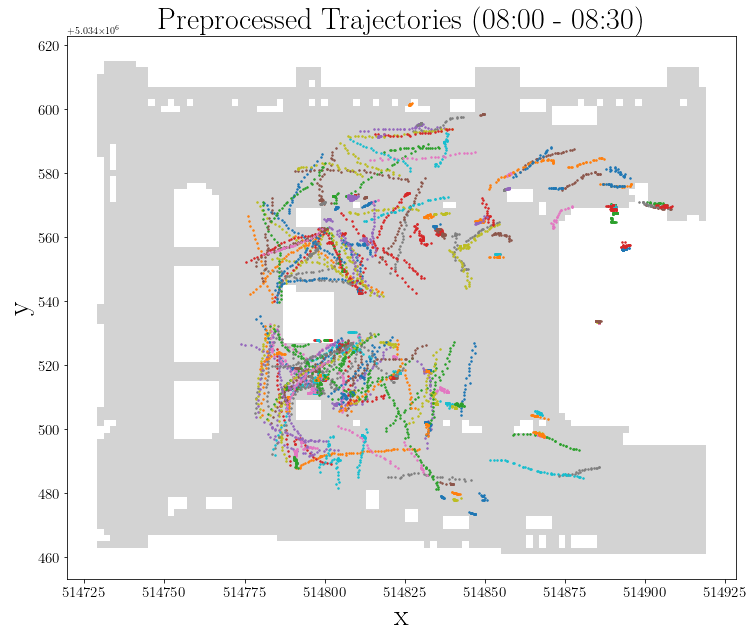

In [ ]:
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig = plt.figure(figsize=(12, 12))
ids = traj_collection_df_new_app['id'].unique()
for id_ in ids:
  self_id = traj_collection_df_new_app[traj_collection_df_new_app['id'] == id_]
  plt.plot(
            self_id['lon'],
            self_id['lat'],
            marker='o',
            linestyle='None',  # to plot only markers without lines
            markersize=1.5
            # markers= 'o',
            # markersize=12
        )
  ax = plt.axes()
 
  # Giving title to the plot
  
  # Showing the plot using plt.show()
grid_duomo[1150:6700].to_crs(epsg=32632).plot(ax=ax, color='lightgrey')

plt.title('Preprocessed Trajectories {}'.format(datetime_detection), fontsize=30)
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)

# Get the axes object
ax = plt.gca()

# Set the tick font size
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

In [ ]:
fig.savefig('preprocessed_{}.png'.format(hour_label), dpi=300, bbox_inches='tight')

# Output generale traiettorie pre processate

In [ ]:
# import pandas as pd
# result = pd.read_csv('/content/drive/MyDrive/dataframe_trajectories/total.csv')
# result

# import matplotlib as mpl
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

# fig = plt.figure(figsize=(12, 12))
# ids = result['id'].unique()
# for id_ in ids:
#   self_id = result[result['id'] == id_]
#   plt.plot(
#             self_id['lon'],
#             self_id['lat'],
#             marker='o',
#             linestyle='None',  # to plot only markers without lines
#             markersize=1.5
#             # markers= 'o',
#             # markersize=12
#         )
#   ax = plt.axes()

# grid_duomo[1150:6700].to_crs(epsg=32632).plot(ax=ax, color='lightgrey')

# plt.title('Aggregate Preprocessed Trajectories', fontsize=30)
# plt.xlabel('x', fontsize=30)
# plt.ylabel('y', fontsize=30)


# ax = plt.gca()
# ax.tick_params(axis='x', labelsize=15)
# ax.tick_params(axis='y', labelsize=15)
# plt.show()

In [ ]:
# fig.savefig('aggregate_preprocessed.png', dpi=300, bbox_inches='tight')

# DEPRECATED: Occupancy post pre-processing

In [ ]:
'''
from geopandas.tools import sjoin

pointInPolys = sjoin(traj_collection_df_new_app, grid_duomo, how='inner') 
pointInPolys_df = pd.DataFrame(data=pointInPolys)
pointInPolys_df

grid_count = pointInPolys_df.groupby(['id_right'])['id_left'].nunique().reset_index(name='unique_id_count').sort_values(by=['unique_id_count'], ascending=False)
grid_count

grid_count_geom = grid_count.merge(grid_duomo, left_on='id_right', right_on='id')
grid_count_geom

import numpy as np
grid_count_geom['count_log'] = np.log(grid_count_geom['unique_id_count'])

grid_count_geom = gpd.GeoDataFrame(grid_count_geom, 
                          crs = 'epsg:32632', 
                          geometry = grid_count_geom['geometry'])
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# fig = plt.figure(figsize=(12, 12))


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12,12))
grid_duomo.to_crs(epsg=32632).plot(ax=ax, color='lightgrey')
grid_count_geom.plot(column = 'unique_id_count', ax=ax, cmap = 'rainbow',
                     legend = True, legend_kwds={'shrink': 0.3}, markersize = 10)

plt.title('Occupancy post pre-processing {}'.format(datetime_detection), fontsize=25)
plt.xlabel('x', fontsize=25)
plt.ylabel('y', fontsize=25)

# Get the axes object
ax = plt.gca()

# Set the tick font size
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()
'''

# si può notare che le detection pre processate si concentrano tendenzialmente nella prima parte della piazza, quella più vicina alla telecamera
# è un'informazione non cosi tanto utile perchè stiamo considerando ped/min su traiettorie che sono state pulite, filtrate ecc, quindi non rappresenta molto la realtà

"\nfrom geopandas.tools import sjoin\n\npointInPolys = sjoin(traj_collection_df_new_app, grid_duomo, how='inner') \npointInPolys_df = pd.DataFrame(data=pointInPolys)\npointInPolys_df\n\ngrid_count = pointInPolys_df.groupby(['id_right'])['id_left'].nunique().reset_index(name='unique_id_count').sort_values(by=['unique_id_count'], ascending=False)\ngrid_count\n\ngrid_count_geom = grid_count.merge(grid_duomo, left_on='id_right', right_on='id')\ngrid_count_geom\n\nimport numpy as np\ngrid_count_geom['count_log'] = np.log(grid_count_geom['unique_id_count'])\n\ngrid_count_geom = gpd.GeoDataFrame(grid_count_geom, \n                          crs = 'epsg:32632', \n                          geometry = grid_count_geom['geometry'])\nimport matplotlib as mpl\nimport matplotlib.pyplot as plt\n\nplt.rc('text', usetex=True)\nplt.rc('font', family='serif')\n# fig = plt.figure(figsize=(12, 12))\n\n\nimport matplotlib.pyplot as plt\nfig, ax = plt.subplots(figsize = (12,12))\ngrid_duomo.to_crs(epsg=32632).

In [ ]:
# l'output è traj_collection_df_new_app e sarà usato per clustering e groups

# Creazione fetaures riassuntive per traiettoria
Viene creato un datfarme in cui le osservazioni non sono più i singoli punti ma sono le traiettorie stesse

In [ ]:
# # al posto di procedere con traj_collection_df_new_app per ogni singola fascia oraria si può procedere con result che contiene tutti i dati di tutti gli orari
# !pip install geopandas
# import geopandas as gpd
# import pandas as pd
# import matplotlib.pyplot as plt
# traj_collection_new_df = pd.read_csv('/content/drive/MyDrive/dataframe_trajectories/total.csv')


# # effettuare correzioni type varie feature qui

# traj_collection_df_new_app = traj_collection_new_df.copy(deep=True)

# # in questo modo ho traj_collection_df_new_app che ingloba tutto e non ho problemi di ridenominazioni

In [ ]:
# df_geopandas_long_traj_new = traj_collection_df.copy(deep=True)

In [ ]:
traj_collection_df_new_app

,lon,lat,id,frame,Timestamp,speed,direction,t,prev_t,geometry,point_id,prev_point_id,geometry_point,prev_lon,prev_lat,geometry_prev_point,distance
361,514789.988391,5.034519e+06,16,15,2021-07-15 07:59:31.980,0.000000,0.0,2021-07-15 07:59:31.980,2021-07-15 07:59:30.980,"LINESTRING (514789.988 5034519.052, 514789.988...",361_16,360_15,POINT (514789.988 5034519.052),514829.370872,5.034506e+06,POINT (514829.371 5034505.594),0.000000
362,514789.988391,5.034519e+06,16,30,2021-07-15 07:59:33.030,0.000000,0.0,2021-07-15 07:59:33.030,2021-07-15 07:59:31.980,"LINESTRING (514789.988 5034519.052, 514789.988...",362_16,361_16,POINT (514789.988 5034519.052),514789.988391,5.034519e+06,POINT (514789.988 5034519.052),0.000000
363,514789.988391,5.034519e+06,16,45,2021-07-15 07:59:34.080,0.000000,0.0,2021-07-15 07:59:34.080,2021-07-15 07:59:33.030,"LINESTRING (514789.988 5034519.052, 514789.988...",363_16,362_16,POINT (514789.988 5034519.052),514789.988391,5.034519e+06,POINT (514789.988 5034519.052),0.000000
364,514789.988391,5.034519e+06,16,60,2021-07-15 07:59:35.130,0.000000,0.0,2021-07-15 07:59:35.130,2021-07-15 07:59:34.080,"LINESTRING (514789.988 5034519.052, 514789.988...",364_16,363_16,POINT (514789.988 5034519.052),514789.988391,5.034519e+06,POINT (514789.988 5034519.052),0.000000
365,514789.988391,5.034519e+06,16,75,2021-07-15 07:59:36.180,0.000000,0.0,2021-07-15 07:59:36.180,2021-07-15 07:59:35.130,"LINESTRING (514789.988 5034519.052, 514789.988...",365_16,364_16,POINT (514789.988 5034519.052),514789.988391,5.034519e+06,POINT (514789.988 5034519.052),0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39190,514817.100953,5.034592e+06,53754,27810,2021-07-15 08:31:57.630,0.000000,0.0,2021-07-15 08:31:57.630,2021-07-15 08:31:56.580,"LINESTRING (514817.101 5034591.682, 514817.101...",39190_53754,39189_53754,POINT (514817.101 5034591.682),514817.100953,5.034592e+06,POINT (514817.101 5034591.682),0.000000
39191,514817.100953,5.034592e+06,53754,27825,2021-07-15 08:31:58.680,0.000000,0.0,2021-07-15 08:31:58.680,2021-07-15 08:31:57.630,"LINESTRING (514817.101 5034591.682, 514817.101...",39191_53754,39190_53754,POINT (514817.101 5034591.682),514817.100953,5.034592e+06,POINT (514817.101 5034591.682),0.000000
39192,514817.100953,5.034592e+06,53754,27840,2021-07-15 08:31:59.730,0.000000,0.0,2021-07-15 08:31:59.730,2021-07-15 08:31:58.680,"LINESTRING (514817.101 5034591.682, 514817.101...",39192_53754,39191_53754,POINT (514817.101 5034591.682),514817.100953,5.034592e+06,POINT (514817.101 5034591.682),0.000000
39193,514817.100953,5.034592e+06,53754,27855,2021-07-15 08:32:00.780,0.000000,0.0,2021-07-15 08:32:00.780,2021-07-15 08:31:59.730,"LINESTRING (514817.101 5034591.682, 514817.101...",39193_53754,39192_53754,POINT (514817.101 5034591.682),514817.100953,5.034592e+06,POINT (514817.101 5034591.682),0.000000


In [ ]:
# con correzione dei valori di velocità
traj_collection_new_df = traj_collection_df_new_app.copy(deep=True)

In [ ]:
len(traj_collection_new_df)

7966

In [ ]:
df1 = pd.DataFrame(traj_collection_new_df.id.unique(), columns=['id'])
df1

,id
0,16
1,169
2,192
3,347
4,443
...,...
250,52249
251,52452
252,52501
253,53479


In [ ]:
df1['avg_speed'] = list(traj_collection_new_df.groupby('id')['speed'].mean())
df1['avg_direction'] = list(traj_collection_new_df.groupby('id')['direction'].mean())
df1['first_point'] = list(traj_collection_new_df.groupby('id')['geometry_point'].nth(0))
df1['last_point'] = list(traj_collection_new_df.groupby('id')['geometry_point'].nth(-1))
df1['first_time'] = list(traj_collection_new_df.groupby('id')['t'].nth(0))
df1['last_time'] = list(traj_collection_new_df.groupby('id')['t'].nth(-1))
df1['avg_lat'] = list(traj_collection_new_df.groupby('id')['lat'].mean())
df1['avg_lon'] = list(traj_collection_new_df.groupby('id')['lon'].mean())
df1

,id,avg_speed,avg_direction,first_point,last_point,first_time,last_time,avg_lat,avg_lon
0,16,0.076978,52.468485,POINT (514789.9883909481 5034519.051701628),POINT (514790.5820966886 5034519.249603541),2021-07-15 07:59:31.980,2021-07-15 08:01:04.380,5.034519e+06,514790.028416
1,169,1.302840,156.914178,POINT (514775.9373550882 5034566.548160872),POINT (514783.4576278019 5034539.831402547),2021-07-15 07:59:37.230,2021-07-15 07:59:58.230,5.034553e+06,514780.093295
2,192,1.268657,50.633431,POINT (514806.6121516837 5034572.683120191),POINT (514832.14149852766 5034589.108979013),2021-07-15 07:59:38.280,2021-07-15 08:00:01.380,5.034580e+06,514818.073254
3,347,1.295188,168.235490,POINT (514785.2387450236 5034524.988759033),POINT (514789.19678329397 5034488.970610772),2021-07-15 07:59:45.630,2021-07-15 08:00:12.930,5.034508e+06,514786.572751
4,443,0.824680,83.508437,POINT (514811.16389569466 5034593.264919197),POINT (514829.17296982487 5034595.0460364185),2021-07-15 07:59:49.830,2021-07-15 08:00:11.880,5.034594e+06,514822.642207
...,...,...,...,...,...,...,...,...,...
250,52249,0.823069,72.087847,POINT (514858.8582568528 5034578.818079511),POINT (514870.7323716639 5034588.119469446),2021-07-15 08:30:51.480,2021-07-15 08:31:11.430,5.034584e+06,514865.389020
251,52452,1.259255,76.971109,POINT (514804.6331325485 5034505.792273422),POINT (514822.8401085923 5034518.655897801),2021-07-15 08:30:57.780,2021-07-15 08:31:19.830,5.034511e+06,514812.666151
252,52501,0.986292,63.664708,POINT (514783.25972588843 5034564.964945564),POINT (514800.08138853754 5034582.974019694),2021-07-15 08:30:58.830,2021-07-15 08:31:24.030,5.034574e+06,514792.038655
253,53479,0.612358,153.415908,POINT (514905.9589122704 5034569.912493402),POINT (514908.13583331904 5034569.318787661),2021-07-15 08:31:30.330,2021-07-15 08:31:54.480,5.034570e+06,514906.099093


In [ ]:
# per test
# df1['first_time'] =  pd.to_datetime(df1['first_time'], format='%Y-%m-%d %H:%M:%S.%f') 
# df1['last_time'] =  pd.to_datetime(df1['last_time'], format='%Y-%m-%d %H:%M:%S.%f') 

# from shapely.wkt import loads
# df1['first_point'] = loads(df1['first_point'])
# df1['last_point'] = loads(df1['last_point'])

# df1

In [ ]:
df1['duration'] = df1['last_time'] - df1['first_time'] 

# per sfruttare la feature per clustering
lista_temp = []
lista_lon_first = []
lista_lat_first = []
lista_lon_last = []
lista_lat_last = []
for i in list(range(0, len(df1))):
  lista_temp.append(df1['duration'][i].total_seconds())
  lista_lon_first.append(df1['first_point'][i].x)
  lista_lat_first.append(df1['first_point'][i].y)
  lista_lon_last.append(df1['last_point'][i].x)
  lista_lat_last.append(df1['last_point'][i].y)

df1['duration'] = lista_temp # in secondi
df1['lon_first_point'] = lista_lon_first
df1['lat_first_point'] = lista_lat_first
df1['lon_last_point'] = lista_lon_last
df1['lat_last_point'] = lista_lat_last
df1

,id,avg_speed,avg_direction,first_point,last_point,first_time,last_time,avg_lat,avg_lon,duration,lon_first_point,lat_first_point,lon_last_point,lat_last_point
0,16,0.076978,52.468485,POINT (514789.9883909481 5034519.051701628),POINT (514790.5820966886 5034519.249603541),2021-07-15 07:59:31.980,2021-07-15 08:01:04.380,5.034519e+06,514790.028416,92.40,514789.988391,5.034519e+06,514790.582097,5.034519e+06
1,169,1.302840,156.914178,POINT (514775.9373550882 5034566.548160872),POINT (514783.4576278019 5034539.831402547),2021-07-15 07:59:37.230,2021-07-15 07:59:58.230,5.034553e+06,514780.093295,21.00,514775.937355,5.034567e+06,514783.457628,5.034540e+06
2,192,1.268657,50.633431,POINT (514806.6121516837 5034572.683120191),POINT (514832.14149852766 5034589.108979013),2021-07-15 07:59:38.280,2021-07-15 08:00:01.380,5.034580e+06,514818.073254,23.10,514806.612152,5.034573e+06,514832.141499,5.034589e+06
3,347,1.295188,168.235490,POINT (514785.2387450236 5034524.988759033),POINT (514789.19678329397 5034488.970610772),2021-07-15 07:59:45.630,2021-07-15 08:00:12.930,5.034508e+06,514786.572751,27.30,514785.238745,5.034525e+06,514789.196783,5.034489e+06
4,443,0.824680,83.508437,POINT (514811.16389569466 5034593.264919197),POINT (514829.17296982487 5034595.0460364185),2021-07-15 07:59:49.830,2021-07-15 08:00:11.880,5.034594e+06,514822.642207,22.05,514811.163896,5.034593e+06,514829.172970,5.034595e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,52249,0.823069,72.087847,POINT (514858.8582568528 5034578.818079511),POINT (514870.7323716639 5034588.119469446),2021-07-15 08:30:51.480,2021-07-15 08:31:11.430,5.034584e+06,514865.389020,19.95,514858.858257,5.034579e+06,514870.732372,5.034588e+06
251,52452,1.259255,76.971109,POINT (514804.6331325485 5034505.792273422),POINT (514822.8401085923 5034518.655897801),2021-07-15 08:30:57.780,2021-07-15 08:31:19.830,5.034511e+06,514812.666151,22.05,514804.633133,5.034506e+06,514822.840109,5.034519e+06
252,52501,0.986292,63.664708,POINT (514783.25972588843 5034564.964945564),POINT (514800.08138853754 5034582.974019694),2021-07-15 08:30:58.830,2021-07-15 08:31:24.030,5.034574e+06,514792.038655,25.20,514783.259726,5.034565e+06,514800.081389,5.034583e+06
253,53479,0.612358,153.415908,POINT (514905.9589122704 5034569.912493402),POINT (514908.13583331904 5034569.318787661),2021-07-15 08:31:30.330,2021-07-15 08:31:54.480,5.034570e+06,514906.099093,24.15,514905.958912,5.034570e+06,514908.135833,5.034569e+06


In [ ]:
lista = []
from movingpandas.geometry_utils import (
    azimuth,
    calculate_initial_compass_bearing,
    angular_difference,
    mrr_diagonal,
    measure_distance_geodesic,
    measure_distance_euclidean,
    measure_distance_spherical,
)

for index, row in df1.iterrows():
  diff = measure_distance_euclidean(row['first_point'], row['last_point'])
  lista.append(diff)


df1['distance_eucl'] = lista
df1

,id,avg_speed,avg_direction,first_point,last_point,first_time,last_time,avg_lat,avg_lon,duration,lon_first_point,lat_first_point,lon_last_point,lat_last_point,distance_eucl
0,16,0.076978,52.468485,POINT (514789.9883909481 5034519.051701628),POINT (514790.5820966886 5034519.249603541),2021-07-15 07:59:31.980,2021-07-15 08:01:04.380,5.034519e+06,514790.028416,92.40,514789.988391,5.034519e+06,514790.582097,5.034519e+06,0.625821
1,169,1.302840,156.914178,POINT (514775.9373550882 5034566.548160872),POINT (514783.4576278019 5034539.831402547),2021-07-15 07:59:37.230,2021-07-15 07:59:58.230,5.034553e+06,514780.093295,21.00,514775.937355,5.034567e+06,514783.457628,5.034540e+06,27.754994
2,192,1.268657,50.633431,POINT (514806.6121516837 5034572.683120191),POINT (514832.14149852766 5034589.108979013),2021-07-15 07:59:38.280,2021-07-15 08:00:01.380,5.034580e+06,514818.073254,23.10,514806.612152,5.034573e+06,514832.141499,5.034589e+06,30.357147
3,347,1.295188,168.235490,POINT (514785.2387450236 5034524.988759033),POINT (514789.19678329397 5034488.970610772),2021-07-15 07:59:45.630,2021-07-15 08:00:12.930,5.034508e+06,514786.572751,27.30,514785.238745,5.034525e+06,514789.196783,5.034489e+06,36.234970
4,443,0.824680,83.508437,POINT (514811.16389569466 5034593.264919197),POINT (514829.17296982487 5034595.0460364185),2021-07-15 07:59:49.830,2021-07-15 08:00:11.880,5.034594e+06,514822.642207,22.05,514811.163896,5.034593e+06,514829.172970,5.034595e+06,18.096937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,52249,0.823069,72.087847,POINT (514858.8582568528 5034578.818079511),POINT (514870.7323716639 5034588.119469446),2021-07-15 08:30:51.480,2021-07-15 08:31:11.430,5.034584e+06,514865.389020,19.95,514858.858257,5.034579e+06,514870.732372,5.034588e+06,15.083450
251,52452,1.259255,76.971109,POINT (514804.6331325485 5034505.792273422),POINT (514822.8401085923 5034518.655897801),2021-07-15 08:30:57.780,2021-07-15 08:31:19.830,5.034511e+06,514812.666151,22.05,514804.633133,5.034506e+06,514822.840109,5.034519e+06,22.292752
252,52501,0.986292,63.664708,POINT (514783.25972588843 5034564.964945564),POINT (514800.08138853754 5034582.974019694),2021-07-15 08:30:58.830,2021-07-15 08:31:24.030,5.034574e+06,514792.038655,25.20,514783.259726,5.034565e+06,514800.081389,5.034583e+06,24.643358
253,53479,0.612358,153.415908,POINT (514905.9589122704 5034569.912493402),POINT (514908.13583331904 5034569.318787661),2021-07-15 08:31:30.330,2021-07-15 08:31:54.480,5.034570e+06,514906.099093,24.15,514905.958912,5.034570e+06,514908.135833,5.034569e+06,2.256429


In [ ]:
# lista = []
# from movingpandas.geometry_utils import (
#     azimuth,
#     calculate_initial_compass_bearing,
#     angular_difference,
#     mrr_diagonal,
#     measure_distance_geodesic,
#     measure_distance_euclidean,
#     measure_distance_spherical,
# )
# 
# for index, row in df1.iterrows():
#   diff = measure_distance_euclidean(row['last_point'], row['first_point'])
#   lista.append(diff)
# 
# df1['distance'] = lista
# df1

# calcolo la distanza piuttosto come somma di segmenti
df1['distance'] = list(traj_collection_new_df.groupby('id')['distance'].sum())
df1

,id,avg_speed,avg_direction,first_point,last_point,first_time,last_time,avg_lat,avg_lon,duration,lon_first_point,lat_first_point,lon_last_point,lat_last_point,distance_eucl,distance
0,16,0.076978,52.468485,POINT (514789.9883909481 5034519.051701628),POINT (514790.5820966886 5034519.249603541),2021-07-15 07:59:31.980,2021-07-15 08:01:04.380,5.034519e+06,514790.028416,92.40,514789.988391,5.034519e+06,514790.582097,5.034519e+06,0.625821,7.193574
1,169,1.302840,156.914178,POINT (514775.9373550882 5034566.548160872),POINT (514783.4576278019 5034539.831402547),2021-07-15 07:59:37.230,2021-07-15 07:59:58.230,5.034553e+06,514780.093295,21.00,514775.937355,5.034567e+06,514783.457628,5.034540e+06,27.754994,28.727628
2,192,1.268657,50.633431,POINT (514806.6121516837 5034572.683120191),POINT (514832.14149852766 5034589.108979013),2021-07-15 07:59:38.280,2021-07-15 08:00:01.380,5.034580e+06,514818.073254,23.10,514806.612152,5.034573e+06,514832.141499,5.034589e+06,30.357147,30.638078
3,347,1.295188,168.235490,POINT (514785.2387450236 5034524.988759033),POINT (514789.19678329397 5034488.970610772),2021-07-15 07:59:45.630,2021-07-15 08:00:12.930,5.034508e+06,514786.572751,27.30,514785.238745,5.034525e+06,514789.196783,5.034489e+06,36.234970,36.718566
4,443,0.824680,83.508437,POINT (514811.16389569466 5034593.264919197),POINT (514829.17296982487 5034595.0460364185),2021-07-15 07:59:49.830,2021-07-15 08:00:11.880,5.034594e+06,514822.642207,22.05,514811.163896,5.034593e+06,514829.172970,5.034595e+06,18.096937,19.050104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,52249,0.823069,72.087847,POINT (514858.8582568528 5034578.818079511),POINT (514870.7323716639 5034588.119469446),2021-07-15 08:30:51.480,2021-07-15 08:31:11.430,5.034584e+06,514865.389020,19.95,514858.858257,5.034579e+06,514870.732372,5.034588e+06,15.083450,17.284457
251,52452,1.259255,76.971109,POINT (514804.6331325485 5034505.792273422),POINT (514822.8401085923 5034518.655897801),2021-07-15 08:30:57.780,2021-07-15 08:31:19.830,5.034511e+06,514812.666151,22.05,514804.633133,5.034506e+06,514822.840109,5.034519e+06,22.292752,29.088781
252,52501,0.986292,63.664708,POINT (514783.25972588843 5034564.964945564),POINT (514800.08138853754 5034582.974019694),2021-07-15 08:30:58.830,2021-07-15 08:31:24.030,5.034574e+06,514792.038655,25.20,514783.259726,5.034565e+06,514800.081389,5.034583e+06,24.643358,25.890172
253,53479,0.612358,153.415908,POINT (514905.9589122704 5034569.912493402),POINT (514908.13583331904 5034569.318787661),2021-07-15 08:31:30.330,2021-07-15 08:31:54.480,5.034570e+06,514906.099093,24.15,514905.958912,5.034570e+06,514908.135833,5.034569e+06,2.256429,15.431427


### ------> Tabella caratteristiche traiettorie pulite

In [ ]:
df1['id'].nunique()

255

In [ ]:
print('{} $\pm$ {} & {} $\pm$ {} & {} $\pm$ {} & {} $\pm$ {}'.format(
    round(df1['distance'].mean(),3),
    round(df1['distance'].std(),3),
    round(df1['duration'].mean(),3),
    round(df1['duration'].std(),3),
    round(df1['avg_speed'].mean(),3),
    round(df1['avg_speed'].std(),3),
    round(df1['avg_direction'].mean(),3),
    round(df1['avg_direction'].std(),3)
                   )
)

18.087 $\pm$ 10.472 & 31.751 $\pm$ 15.226 & 0.61 $\pm$ 0.377 & 120.422 $\pm$ 57.002


In [ ]:
print(round(df1['distance'].mean(),3))
print(round(df1['distance'].std(),3))

18.087
10.472


In [ ]:
print(round(df1['duration'].mean(),3))
print(round(df1['duration'].std(),3))

31.751
15.226


In [ ]:
print(round(df1['avg_speed'].mean(),3))
print(round(df1['avg_speed'].std(),3))

0.61
0.377


In [ ]:
print(round(df1['avg_direction'].mean(),3))
print(round(df1['avg_direction'].std(),3))

120.422
57.002


In [ ]:
# oppure
# cosi evito di fare la media di medie
traj_collection_new_df['direction'].mean()
traj_collection_new_df['direction'].std()

112.11819718934909

In [ ]:
# traj_collection_new_df['speed'].max()

# 2.361622732550548 come per la distana anche qui data la possibilità di errori in fase di detection riteniamo accettabile questo valore

In [ ]:
# IMPORTANTE

# potrei aggiungere colonna valore lat e lon per primo e utlimo punto

In [ ]:
# per calcolare la lunghezza di una traiettoria è meglio calcolare la distazna tra primo e ultimo puntop oppure sommara la lunghezza dei segmenti che la compongono
# Per calcolare la lunghezza di una traiettoria, è meglio sommare la lunghezza dei segmenti che la compongono. Ciò implica calcolare la distanza tra ogni coppia di punti consecutivi e sommare tutte queste distanze.
# Calcolare la distanza tra il primo e l'ultimo punto potrebbe fornire un risultato approssimativo della lunghezza della traiettoria, ma non sarebbe accurato poiché potrebbero esserci curve o deviazioni che rendono la distanza effettiva maggiore di quella tra il primo e l'ultimo punto. Sommando invece la lunghezza di tutti i segmenti, si ottiene un risultato più preciso.

# nel nostro caso forse ha più senso la distanza calcolata come somma dei sgmenti (distance_y) perchè siamo interessati alle traiettorie, a capirle e avere maggiori informazioni. La distanza eucilidea è la misura di un segmente diritto tra il primo e l'ultimo punto e perdiamo tutto quello che è la traiettoria

In [ ]:
fig = px.histogram(df1['distance'].values)
fig.show()

In [ ]:
fig = px.histogram(df1['duration'].values)
fig.show()

In [ ]:
fig = px.histogram(df1['avg_direction'].values)
fig.show()

In [ ]:
fig = px.histogram(df1['avg_speed'].values)
fig.show()

In [ ]:
# 'id',	'avg_speed',	'avg_direction',	'first_point',	'last_point',	'first_time',	'last_time',	'avg_lat',	'avg_lon',	'duration',	'lon_first_point',	'lat_first_point',	'lon_last_point',	'lat_last_point',	'distance'

In [ ]:
df1

,id,avg_speed,avg_direction,first_point,last_point,first_time,last_time,avg_lat,avg_lon,duration,lon_first_point,lat_first_point,lon_last_point,lat_last_point,distance_eucl,distance
0,16,0.076978,52.468485,POINT (514789.9883909481 5034519.051701628),POINT (514790.5820966886 5034519.249603541),2021-07-15 07:59:31.980,2021-07-15 08:01:04.380,5.034519e+06,514790.028416,92.40,514789.988391,5.034519e+06,514790.582097,5.034519e+06,0.625821,7.193574
1,169,1.302840,156.914178,POINT (514775.9373550882 5034566.548160872),POINT (514783.4576278019 5034539.831402547),2021-07-15 07:59:37.230,2021-07-15 07:59:58.230,5.034553e+06,514780.093295,21.00,514775.937355,5.034567e+06,514783.457628,5.034540e+06,27.754994,28.727628
2,192,1.268657,50.633431,POINT (514806.6121516837 5034572.683120191),POINT (514832.14149852766 5034589.108979013),2021-07-15 07:59:38.280,2021-07-15 08:00:01.380,5.034580e+06,514818.073254,23.10,514806.612152,5.034573e+06,514832.141499,5.034589e+06,30.357147,30.638078
3,347,1.295188,168.235490,POINT (514785.2387450236 5034524.988759033),POINT (514789.19678329397 5034488.970610772),2021-07-15 07:59:45.630,2021-07-15 08:00:12.930,5.034508e+06,514786.572751,27.30,514785.238745,5.034525e+06,514789.196783,5.034489e+06,36.234970,36.718566
4,443,0.824680,83.508437,POINT (514811.16389569466 5034593.264919197),POINT (514829.17296982487 5034595.0460364185),2021-07-15 07:59:49.830,2021-07-15 08:00:11.880,5.034594e+06,514822.642207,22.05,514811.163896,5.034593e+06,514829.172970,5.034595e+06,18.096937,19.050104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,52249,0.823069,72.087847,POINT (514858.8582568528 5034578.818079511),POINT (514870.7323716639 5034588.119469446),2021-07-15 08:30:51.480,2021-07-15 08:31:11.430,5.034584e+06,514865.389020,19.95,514858.858257,5.034579e+06,514870.732372,5.034588e+06,15.083450,17.284457
251,52452,1.259255,76.971109,POINT (514804.6331325485 5034505.792273422),POINT (514822.8401085923 5034518.655897801),2021-07-15 08:30:57.780,2021-07-15 08:31:19.830,5.034511e+06,514812.666151,22.05,514804.633133,5.034506e+06,514822.840109,5.034519e+06,22.292752,29.088781
252,52501,0.986292,63.664708,POINT (514783.25972588843 5034564.964945564),POINT (514800.08138853754 5034582.974019694),2021-07-15 08:30:58.830,2021-07-15 08:31:24.030,5.034574e+06,514792.038655,25.20,514783.259726,5.034565e+06,514800.081389,5.034583e+06,24.643358,25.890172
253,53479,0.612358,153.415908,POINT (514905.9589122704 5034569.912493402),POINT (514908.13583331904 5034569.318787661),2021-07-15 08:31:30.330,2021-07-15 08:31:54.480,5.034570e+06,514906.099093,24.15,514905.958912,5.034570e+06,514908.135833,5.034569e+06,2.256429,15.431427


In [ ]:
X_ID = df1[['id']]
X_ID

,id
0,16
1,169
2,192
3,347
4,443
...,...
250,52249
251,52452
252,52501
253,53479


In [ ]:
# X = df1[['avg_speed', 'avg_direction', 'avg_lat',	'avg_lon', 'distance']]  # mancherebbe solo durata temporale
X = df1[[
    'avg_speed',	
    'avg_direction',	
     #'avg_lat',	
     #'avg_lon',	
    'duration',	
     #'lon_first_point',	
     #'lat_first_point',	
     #'lon_last_point',	
     #'lat_last_point',	
     # 'distance_eucl',
     'distance']]  
X

,avg_speed,avg_direction,duration,distance
0,0.076978,52.468485,92.40,7.193574
1,1.302840,156.914178,21.00,28.727628
2,1.268657,50.633431,23.10,30.638078
3,1.295188,168.235490,27.30,36.718566
4,0.824680,83.508437,22.05,19.050104
...,...,...,...,...
250,0.823069,72.087847,19.95,17.284457
251,1.259255,76.971109,22.05,29.088781
252,0.986292,63.664708,25.20,25.890172
253,0.612358,153.415908,24.15,15.431427


In [ ]:
# DA ELIMINARE

# FEATURE SCALING
from sklearn.preprocessing import StandardScaler
# df_numeric = X[['avg_speed', 'avg_direction', 'avg_lat', 'avg_lon', 'duration', 'distance']]
df_numeric = X[['avg_speed', 'avg_direction', 'duration', 'distance']]


# crea un oggetto StandardScaler
scaler = StandardScaler()

# standardizza le feature numeriche
df_standardized = scaler.fit_transform(df_numeric)

# crea un nuovo DataFrame con le feature standardizzate
df_standardized = pd.DataFrame(df_standardized, columns=df_numeric.columns)
# df_standardized


X = df_standardized.copy(deep=True)
X

# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# # Initialise the Scaler
# scaler = StandardScaler()
# X_std = scaler.fit_transform(X)
# X_std

,avg_speed,avg_direction,duration,distance
0,-1.415612,-1.194465,3.991003,-1.042272
1,1.842456,0.641448,-0.707483,1.018041
2,1.751606,-1.226721,-0.569292,1.200828
3,1.822117,0.840451,-0.292910,1.782590
4,0.571613,-0.648854,-0.638387,0.092125
...,...,...,...,...
250,0.567333,-0.849602,-0.776578,-0.076807
251,1.726615,-0.763765,-0.638387,1.052596
252,1.001143,-0.997661,-0.431101,0.746562
253,0.007310,0.579957,-0.500196,-0.254099


In [ ]:
# A review of moving object trajectory clustering algorithms

# Trajectory clustering: K-means
Partitioning algorithms

Here, the algorithm groups data into K clusters where the value K is pre-defined.
K-Means finds clusters by minimizing the mean distance between geometric points.

**richiede scaling**

**richiede numero cluster**

In [ ]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot


model = KMeans(n_clusters=2, 
               random_state=0,
               init = 'random',
               n_init = 100
               )

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)


# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster

listatest={}

for cluster in clusters:
  # get row indexes for samples with this cluster
  row_ix = where(yhat == cluster)
  # print(list(row_ix[0][0]))
  listatest['cluster'+str(cluster)] = []
  listatest['cluster'+str(cluster)].append(list(row_ix[0]))

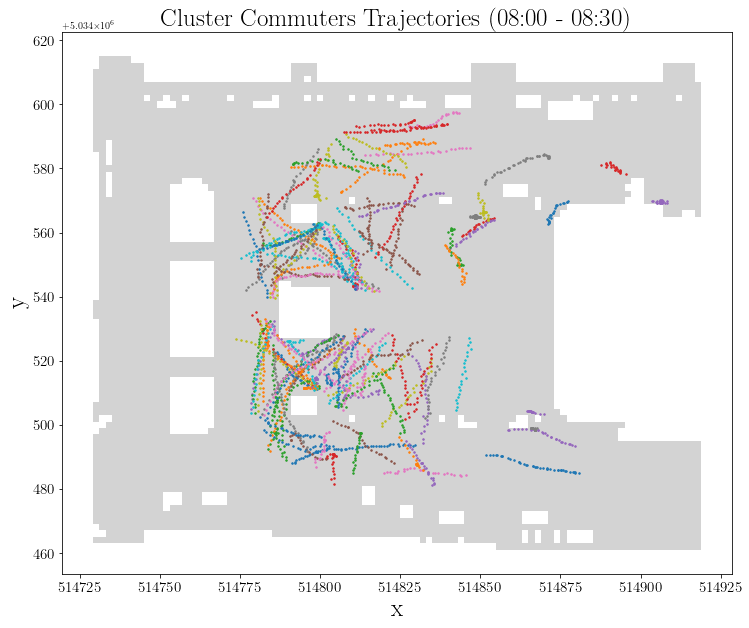

In [ ]:
# versione grafico 1 con pattern più evidenti

list_cluster1 = listatest['cluster0'][0]
lista1 = list(map(lambda x: X_ID.at[x, 'id'], list_cluster1))

# mpl.plot_trajectories(traj_collection_new_df[traj_collection_new_df['id'].isin(lista1)]
# , return_fig=False, markersize=0.5, markers='o')

# plt.title('Cluster Commuters trajectories', fontsize=20)
# plt.xlabel('x', fontsize=20)
# plt.ylabel('y', fontsize=20)
# plt.show()



# # versione grafico 2
# fig = plt.figure(figsize=(15, 15))
# ids = traj_collection_new_df[traj_collection_new_df['id'].isin(lista1)]['id'].unique()
# for id_ in ids:
#   self_id = traj_collection_new_df[traj_collection_new_df['id'] == id_]
#   plt.plot(
#             self_id['lon'],
#             self_id['lat'],
#              marker = ',',
#              markersize=0.05,
#            markeredgecolor='none'
#         )
#   ax = plt.axes()
 
#   # Giving title to the plot
  
#   # Showing the plot using plt.show()
# grid_duomo.to_crs(epsg=32632).plot(ax=ax, color='lightgrey')
# plt.title('Tourists trajectories', fontsize=20)
# plt.xlabel('x', fontsize=20)
# plt.ylabel('y', fontsize=20)
# plt.show()

# plt.show()



import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig = plt.figure(figsize=(12, 12))
ids = traj_collection_new_df[traj_collection_new_df['id'].isin(lista1)]['id'].unique()
for id_ in ids:
  self_id = traj_collection_new_df[traj_collection_new_df['id'].isin(lista1)][traj_collection_new_df[traj_collection_new_df['id'].isin(lista1)]['id'] == id_]
  plt.plot(
            self_id['lon'],
            self_id['lat'],
            marker='o',
            linestyle='None',  # to plot only markers without lines
            markersize=1.5
        )
  ax = plt.axes()
 
  # Giving title to the plot
  
  # Showing the plot using plt.show()
grid_duomo[1150:6700].to_crs(epsg=32632).plot(ax=ax, color='lightgrey')

# plt.title('Cluster Tourists Trajectories {}'.format(datetime_detection), fontsize=25)
plt.title('Cluster Commuters Trajectories {}'.format(datetime_detection), fontsize=25)  # per 18

plt.xlabel('x', fontsize=25)
plt.ylabel('y', fontsize=25)

# Get the axes object
ax = plt.gca()

# Set the tick font size
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

In [ ]:
# salvo gli id di ciascun cluster
list_cluster1 = listatest['cluster0'][0]
lista1 = list(map(lambda x: X_ID.at[x, 'id'], list_cluster1))

list_cluster2 = listatest['cluster1'][0]
lista2 = list(map(lambda x: X_ID.at[x, 'id'], list_cluster2))

# dopo svariati test è possibile affermare che per tutte le fasce orarie il numero di commuters è sempre maggiore del numero di turisti
if len(lista1)>len(lista2):
  lista_tourists = lista1
  lista_commuters = lista2
else:
  lista_commuters = lista1
  lista_tourists = lista2

## Cluster commuters

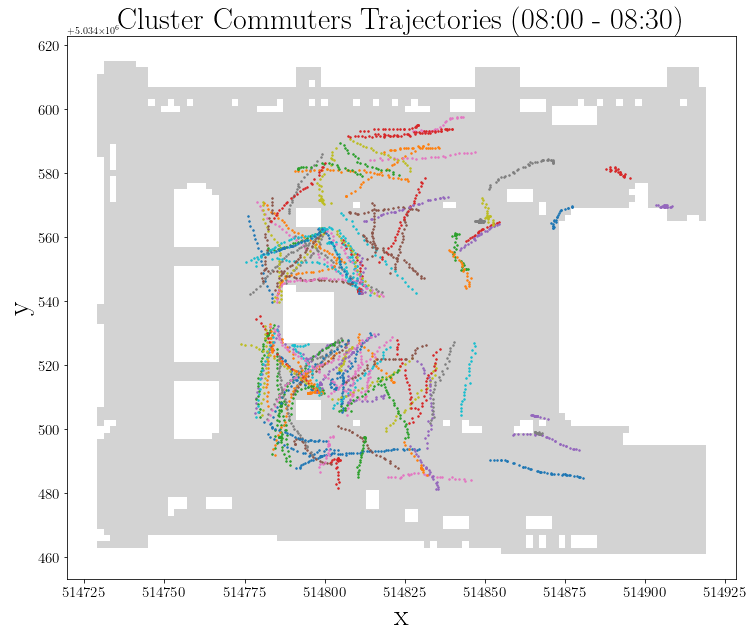

In [ ]:
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig = plt.figure(figsize=(12, 12))
ids = traj_collection_new_df[traj_collection_new_df['id'].isin(lista_commuters)]['id'].unique()
traj_collection_new_df_commuters = traj_collection_new_df[traj_collection_new_df['id'].isin(lista_commuters)]
for id_ in ids:
  self_id = traj_collection_new_df_commuters[traj_collection_new_df_commuters['id'] == id_]
  plt.plot(
            self_id['lon'],
            self_id['lat'],
            marker='o',
            linestyle='None',  # to plot only markers without lines
            markersize=1.5
            # in alternativa
            # marker = ',',
            # markersize=0.05,
            # markeredgecolor='none'
        )
  ax = plt.axes()
 
# Giving title to the plot
  
# Showing the plot using plt.show()
grid_duomo[1150:6700].to_crs(epsg=32632).plot(ax=ax, color='lightgrey')

# plt.title('Cluster Tourists Trajectories {}'.format(datetime_detection), fontsize=25)
plt.title('Cluster Commuters Trajectories {}'.format(datetime_detection), fontsize=30)  # per 18

plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)

# Get the axes object
ax = plt.gca()

# Set the tick font size
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

In [ ]:
fig.savefig('commuters_{}.png'.format(hour_label), dpi=300, bbox_inches='tight')

## Cluster tourists

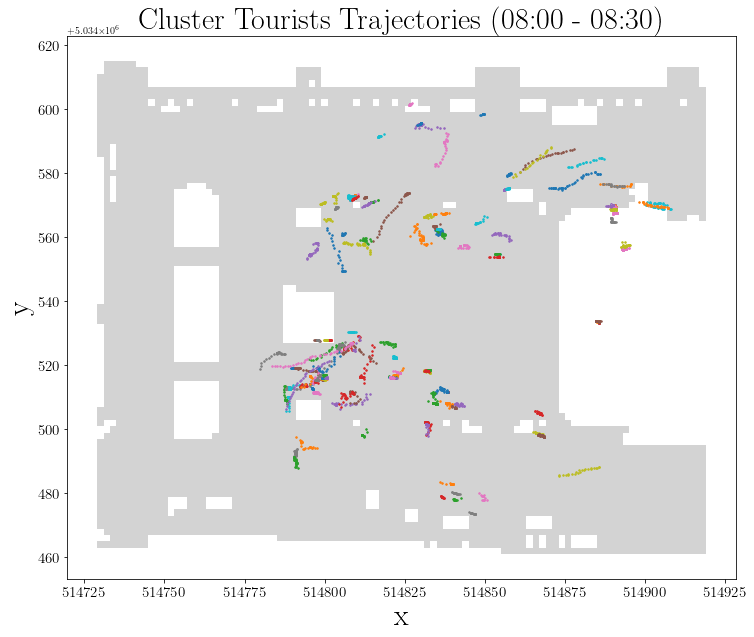

In [ ]:
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


fig = plt.figure(figsize=(12, 12))
ids = traj_collection_new_df[traj_collection_new_df['id'].isin(lista_tourists)]['id'].unique()
traj_collection_new_df_tourists = traj_collection_new_df[traj_collection_new_df['id'].isin(lista_tourists)]
for id_ in ids:
  self_id = traj_collection_new_df_tourists[traj_collection_new_df_tourists['id'] == id_]
  plt.plot(
            self_id['lon'],
            self_id['lat'],
            marker='o',
            linestyle='None',  # to plot only markers without lines
            markersize=1.5
        )
  ax = plt.axes()
 
  # Giving title to the plot
  
  # Showing the plot using plt.show()
grid_duomo[1150:6700].to_crs(epsg=32632).plot(ax=ax, color='lightgrey')

# plt.title('Cluster Commuters Trajectories {}'.format(datetime_detection), fontsize=25)  # orignal fontsize: 25
plt.title('Cluster Tourists Trajectories {}'.format(datetime_detection), fontsize=30)  # per 18

plt.xlabel('x', fontsize=30)  # original fontsize: 25
plt.ylabel('y', fontsize=30)

# Get the axes object
ax = plt.gca()
# Set the tick font size
ax.tick_params(axis='x', labelsize=15)  # original fontsize: 15
ax.tick_params(axis='y', labelsize=15)

plt.show()

In [ ]:
fig.savefig('tourists_{}.png'.format(hour_label), dpi=300, bbox_inches='tight')

## Analisi caratteristiche turisti e pedoni

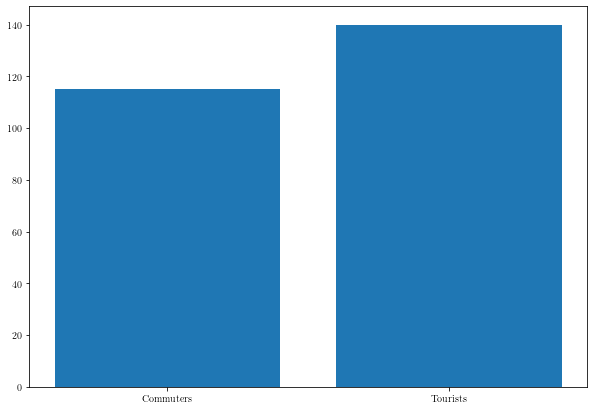

In [ ]:
num_commuters = df1[df1['id'].isin(lista_commuters)]['id'].nunique()
num_tourists = df1[df1['id'].isin(lista_tourists)]['id'].nunique()
objects = ('Commuters', 'Tourists')
plt.figure(figsize=(10, 7))
plt.bar(objects, (num_commuters,num_tourists))
plt.show()

In [ ]:
tot_pedoni = num_commuters + num_tourists
# num_commuters : tot_pedoni = x : 100
print('Commuters: {}, {}%'.format(num_commuters, num_commuters*100/tot_pedoni))
print('Tourists: {}, {}%'.format(num_tourists, num_tourists*100/tot_pedoni))

Commuters: 115, 45.09803921568628%
Tourists: 140, 54.90196078431372%


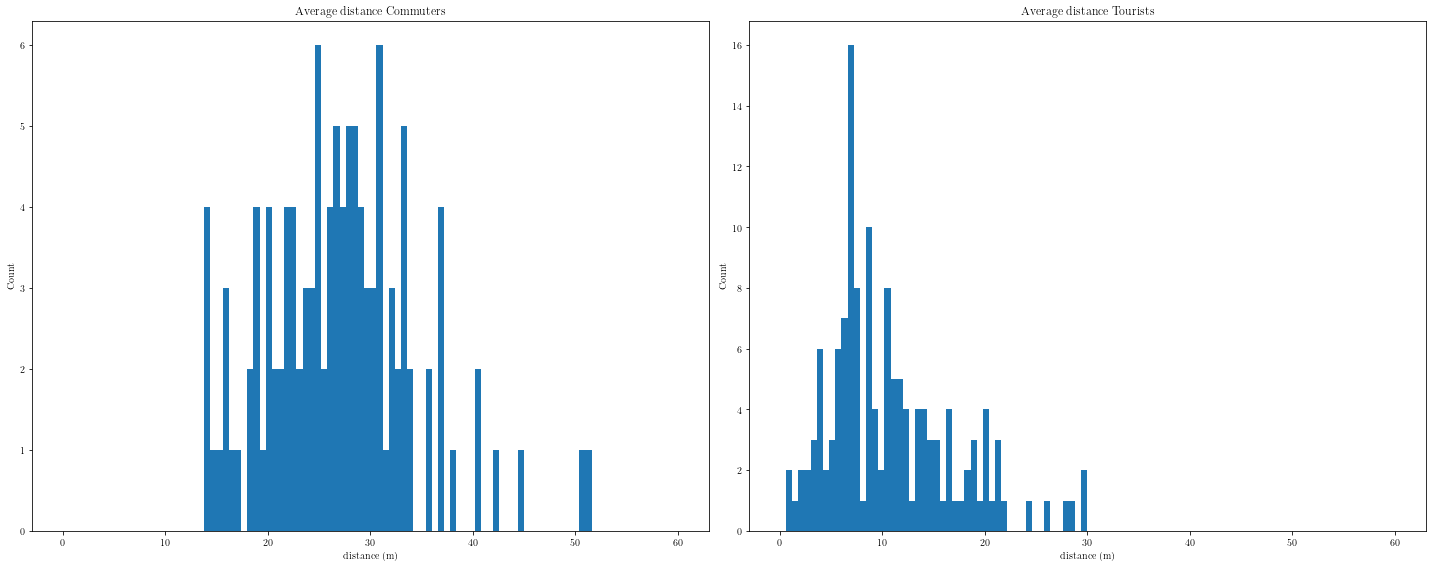

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))

title = ["Average distance Commuters", "Average distance Tourists"]
for i in range(2):      
    # subplots
    plt.subplot(1, 2, i+1)    
    if i == 0:
      # plotting (x,y)
      plt.hist(df1[df1['id'].isin(lista_commuters)]['distance'], bins=100, range=[0,60])
    else:
      plt.hist(df1[df1['id'].isin(lista_tourists)]['distance'], bins=100, range=[0,60])   
    # set the title to subplots
    plt.gca().title.set_text(title[i])
    plt.xlabel("distance (m)")
    plt.ylabel("Count")
# set spacing
fig.tight_layout()
plt.show()

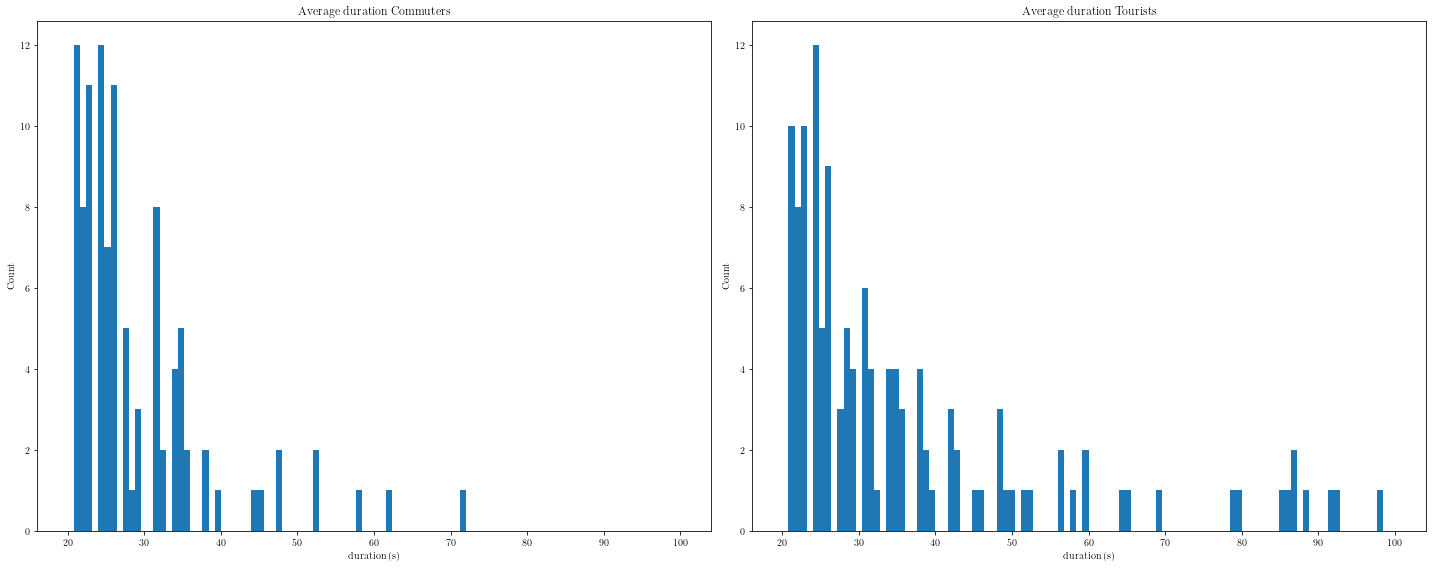

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
#df1[df1['id'].isin(lista1)].hist('distance', bins=100, ax=axes[0])
#df1[df1['id'].isin(lista2)].hist('distance', bins=100, ax=axes[1])


title = ["Average duration Commuters", "Average duration Tourists"]
for i in range(2):      
    # subplots
    plt.subplot(1, 2, i+1)    
    if i == 0:
      # plotting (x,y)
      plt.hist(df1[df1['id'].isin(lista_commuters)]['duration'], bins=100, range=[20,100])
    else:
      plt.hist(df1[df1['id'].isin(lista_tourists)]['duration'], bins=100, range=[20,100])   
    # set the title to subplots
    plt.gca().title.set_text(title[i])
    plt.xlabel("duration (s)")
    plt.ylabel("Count")
# set spacing
fig.tight_layout()
plt.show()

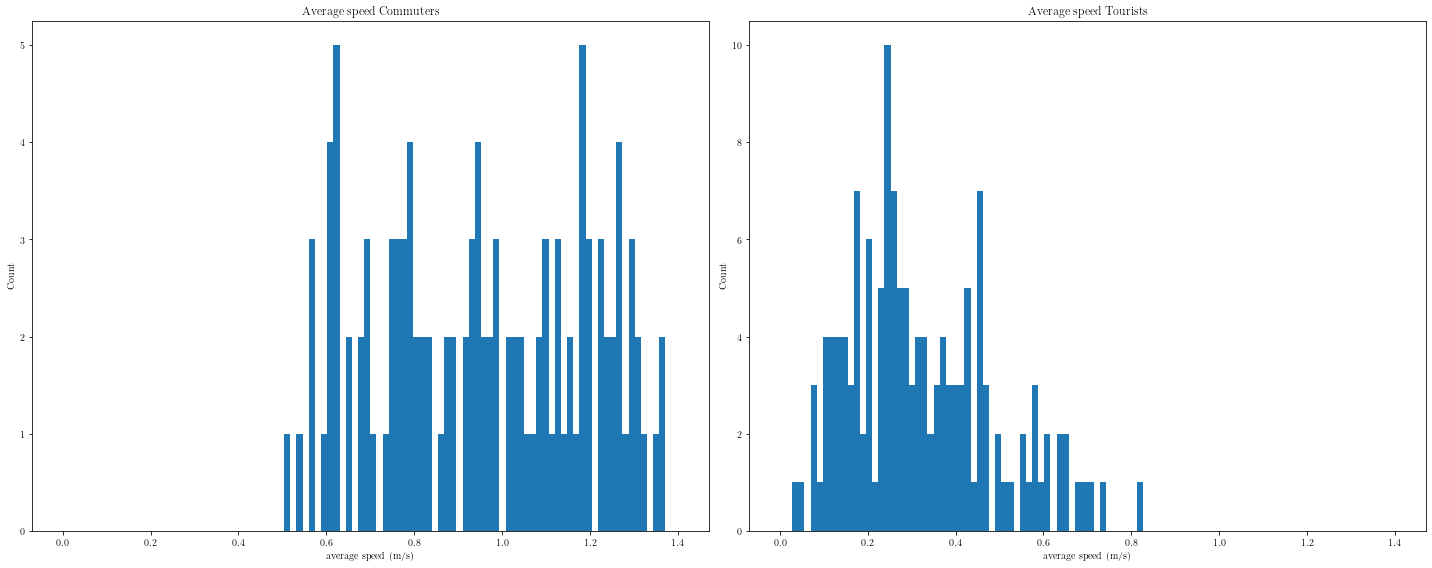

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
#df1[df1['id'].isin(lista1)].hist('distance', bins=100, ax=axes[0])
#df1[df1['id'].isin(lista2)].hist('distance', bins=100, ax=axes[1])


title = ["Average speed Commuters", "Average speed Tourists"]
for i in range(2):      
    # subplots
    plt.subplot(1, 2, i+1)    
    if i == 0:
      # plotting (x,y)
      plt.hist(df1[df1['id'].isin(lista_commuters)]['avg_speed'], bins=100, range=[0,1.4])
    else:
      plt.hist(df1[df1['id'].isin(lista_tourists)]['avg_speed'], bins=100, range=[0,1.4])   
    # set the title to subplots
    plt.gca().title.set_text(title[i])
    plt.xlabel("average speed (m/s)")
    plt.ylabel("Count")
# set spacing
fig.tight_layout()
plt.show()

### T-test Commuters vs Tourists


In [ ]:
# commuters
data_commuters = df1[df1['id'].isin(lista_commuters)]
len(data_commuters)

115

In [ ]:
# tourist
data_tourists = df1[df1['id'].isin(lista_tourists)]
len(data_tourists)

140

In [ ]:
list_metric = ['distance', 'duration', 'avg_speed', 'avg_direction']

from scipy.stats import ttest_ind
for metric in list_metric:
  print(metric)

  sample1 = list(data_commuters[metric])
  sample2 = list(data_tourists[metric])

  t_stat, p_value = ttest_ind(sample1, sample2, alternative='two-sided')
  print('t_stat: {}'.format(round(t_stat,3)))
  print('p_value: {}'.format(format(p_value, ".3e")))

  if p_value < 0.001:
    print("----> DIFFERENZA STATISTICAMENTE SIGNIFICATIVA")
    print('p value<0.001')
  else:
    print("NO DIFFERENZA STATISTICAMENTE SIGNIFICATIVA")
  print('--------------------------------')

distance
t_stat: 19.137
p_value: 4.363e-51
----> DIFFERENZA STATISTICAMENTE SIGNIFICATIVA
p value<0.001
--------------------------------
duration
t_stat: -3.639
p_value: 3.322e-04
----> DIFFERENZA STATISTICAMENTE SIGNIFICATIVA
p value<0.001
--------------------------------
avg_speed
t_stat: 25.026
p_value: 2.166e-70
----> DIFFERENZA STATISTICAMENTE SIGNIFICATIVA
p value<0.001
--------------------------------
avg_direction
t_stat: 11.203
p_value: 6.361e-24
----> DIFFERENZA STATISTICAMENTE SIGNIFICATIVA
p value<0.001
--------------------------------


### ------> Tabella caratteristiche cluster

In [ ]:
print('{} $\pm$ {} & {} $\pm$ {} & {} $\pm$ {} & {} $\pm$ {} & {} $\pm$ {} & {} $\pm$ {} & {} $\pm$ {} & {} $\pm$ {}'.format(
    round(df1[df1['id'].isin(lista_commuters)]['distance'].mean(),3),
    round(df1[df1['id'].isin(lista_commuters)]['distance'].std(),3),
    round(df1[df1['id'].isin(lista_tourists)]['distance'].mean(),3),
    round(df1[df1['id'].isin(lista_tourists)]['distance'].std(),3),
    round(df1[df1['id'].isin(lista_commuters)]['duration'].mean(),3),
    round(df1[df1['id'].isin(lista_commuters)]['duration'].std(),3),
    round(df1[df1['id'].isin(lista_tourists)]['duration'].mean(),3),
    round(df1[df1['id'].isin(lista_tourists)]['duration'].std(),3),
    round(df1[df1['id'].isin(lista_commuters)]['avg_speed'].mean(),3),
    round(df1[df1['id'].isin(lista_commuters)]['avg_speed'].std(),3),
    round(df1[df1['id'].isin(lista_tourists)]['avg_speed'].mean(),3),
    round(df1[df1['id'].isin(lista_tourists)]['avg_speed'].std(),3),
    round(df1[df1['id'].isin(lista_commuters)]['avg_direction'].mean(),3),
    round(df1[df1['id'].isin(lista_commuters)]['avg_direction'].std(),3),
    round(df1[df1['id'].isin(lista_tourists)]['avg_direction'].mean(),3),
    round(df1[df1['id'].isin(lista_tourists)]['avg_direction'].std(),3)
                   )
)

26.956 $\pm$ 7.269 & 10.802 $\pm$ 6.209 & 28.012 $\pm$ 9.149 & 34.822 $\pm$ 18.274 & 0.96 $\pm$ 0.24 & 0.322 $\pm$ 0.166 & 156.568 $\pm$ 61.191 & 90.731 $\pm$ 29.962


In [ ]:
print('distanza media traiettorie tourists: {}'.format(round(df1[df1['id'].isin(lista_tourists)]['distance'].mean(),3)))
print('SD distanza media traiettorie tourists: {}'.format(round(df1[df1['id'].isin(lista_tourists)]['distance'].std(),3)))

print('')
print('')

print('distanza media traiettorie commuters: {}'.format(round(df1[df1['id'].isin(lista_commuters)]['distance'].mean(),3)))
print('SD distanza media traiettorie commuters: {}'.format(round(df1[df1['id'].isin(lista_commuters)]['distance'].std(),3)))

distanza media traiettorie tourists: 10.802
SD distanza media traiettorie tourists: 6.209


distanza media traiettorie commuters: 26.956
SD distanza media traiettorie commuters: 7.269


In [ ]:
print('durata media traiettorie tourists: {}'.format(round(df1[df1['id'].isin(lista_tourists)]['duration'].mean(),3)))
print('SD durata media traiettorie tourists: {}'.format(round(df1[df1['id'].isin(lista_tourists)]['duration'].std(),3)))

print('')
print('')

print('durata media traiettorie commuters: {}'.format(round(df1[df1['id'].isin(lista_commuters)]['duration'].mean(),3)))
print('SD durata media traiettorie commuters: {}'.format(round(df1[df1['id'].isin(lista_commuters)]['duration'].std(),3)))

durata media traiettorie tourists: 34.822
SD durata media traiettorie tourists: 18.274


durata media traiettorie commuters: 28.012
SD durata media traiettorie commuters: 9.149


In [ ]:
print('velocità media traiettorie tourists: {}'.format(round(df1[df1['id'].isin(lista_tourists)]['avg_speed'].mean(),3)))
print('SD velocità media traiettorie tourists: {}'.format(round(df1[df1['id'].isin(lista_tourists)]['avg_speed'].std(),3)))

print('')
print('')

print('velocità media traiettorie commuters: {}'.format(round(df1[df1['id'].isin(lista_commuters)]['avg_speed'].mean(),3)))
print('SD velocità media traiettorie commuters: {}'.format(round(df1[df1['id'].isin(lista_commuters)]['avg_speed'].std(),3)))

velocità media traiettorie tourists: 0.322
SD velocità media traiettorie tourists: 0.166


velocità media traiettorie commuters: 0.96
SD velocità media traiettorie commuters: 0.24


In [ ]:
print('direzione media traiettorie tourists: {}'.format(round(df1[df1['id'].isin(lista_tourists)]['avg_direction'].mean(),3)))
print('SD direzione media traiettorie tourists: {}'.format(round(df1[df1['id'].isin(lista_tourists)]['avg_direction'].std(),3)))

print('')
print('')

print('direzione media traiettorie commuters: {}'.format(round(df1[df1['id'].isin(lista_commuters)]['avg_direction'].mean(),3)))
print('SD direzione media traiettorie commuters: {}'.format(round(df1[df1['id'].isin(lista_commuters)]['avg_direction'].std(),3)))

direzione media traiettorie tourists: 90.731
SD direzione media traiettorie tourists: 29.962


direzione media traiettorie commuters: 156.568
SD direzione media traiettorie commuters: 61.191


# Groups detection (1.5 m)

tolgo filtro temporale
più conmservativo -> nel senso che considero un gruppo se sono stati vicini tutto il tempo

In [ ]:
# riporto nuovamente situazione inziale traiettorie pulite
# from pymove.visualization.matplotlib import plot_trajectories
# mpl.plot_trajectories(traj_collection_df_new_app, return_fig=False, markersize=0.5, markers='o')

# plt.title('Trajectories after pre-processing', fontsize=20)
# plt.xlabel('x', fontsize=20)
# plt.ylabel('y', fontsize=20)
# plt.show() 

In [ ]:
traj_collection_df_new_app  # è il df pulito delle traiettorie

,lon,lat,id,frame,Timestamp,speed,direction,t,prev_t,geometry,point_id,prev_point_id,geometry_point,prev_lon,prev_lat,geometry_prev_point,distance
361,514789.988391,5.034519e+06,16,15,2021-07-15 07:59:31.980,0.000000,0.0,2021-07-15 07:59:31.980,2021-07-15 07:59:30.980,"LINESTRING (514789.988 5034519.052, 514789.988...",361_16,360_15,POINT (514789.988 5034519.052),514829.370872,5.034506e+06,POINT (514829.371 5034505.594),0.000000
362,514789.988391,5.034519e+06,16,30,2021-07-15 07:59:33.030,0.000000,0.0,2021-07-15 07:59:33.030,2021-07-15 07:59:31.980,"LINESTRING (514789.988 5034519.052, 514789.988...",362_16,361_16,POINT (514789.988 5034519.052),514789.988391,5.034519e+06,POINT (514789.988 5034519.052),0.000000
363,514789.988391,5.034519e+06,16,45,2021-07-15 07:59:34.080,0.000000,0.0,2021-07-15 07:59:34.080,2021-07-15 07:59:33.030,"LINESTRING (514789.988 5034519.052, 514789.988...",363_16,362_16,POINT (514789.988 5034519.052),514789.988391,5.034519e+06,POINT (514789.988 5034519.052),0.000000
364,514789.988391,5.034519e+06,16,60,2021-07-15 07:59:35.130,0.000000,0.0,2021-07-15 07:59:35.130,2021-07-15 07:59:34.080,"LINESTRING (514789.988 5034519.052, 514789.988...",364_16,363_16,POINT (514789.988 5034519.052),514789.988391,5.034519e+06,POINT (514789.988 5034519.052),0.000000
365,514789.988391,5.034519e+06,16,75,2021-07-15 07:59:36.180,0.000000,0.0,2021-07-15 07:59:36.180,2021-07-15 07:59:35.130,"LINESTRING (514789.988 5034519.052, 514789.988...",365_16,364_16,POINT (514789.988 5034519.052),514789.988391,5.034519e+06,POINT (514789.988 5034519.052),0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39190,514817.100953,5.034592e+06,53754,27810,2021-07-15 08:31:57.630,0.000000,0.0,2021-07-15 08:31:57.630,2021-07-15 08:31:56.580,"LINESTRING (514817.101 5034591.682, 514817.101...",39190_53754,39189_53754,POINT (514817.101 5034591.682),514817.100953,5.034592e+06,POINT (514817.101 5034591.682),0.000000
39191,514817.100953,5.034592e+06,53754,27825,2021-07-15 08:31:58.680,0.000000,0.0,2021-07-15 08:31:58.680,2021-07-15 08:31:57.630,"LINESTRING (514817.101 5034591.682, 514817.101...",39191_53754,39190_53754,POINT (514817.101 5034591.682),514817.100953,5.034592e+06,POINT (514817.101 5034591.682),0.000000
39192,514817.100953,5.034592e+06,53754,27840,2021-07-15 08:31:59.730,0.000000,0.0,2021-07-15 08:31:59.730,2021-07-15 08:31:58.680,"LINESTRING (514817.101 5034591.682, 514817.101...",39192_53754,39191_53754,POINT (514817.101 5034591.682),514817.100953,5.034592e+06,POINT (514817.101 5034591.682),0.000000
39193,514817.100953,5.034592e+06,53754,27855,2021-07-15 08:32:00.780,0.000000,0.0,2021-07-15 08:32:00.780,2021-07-15 08:31:59.730,"LINESTRING (514817.101 5034591.682, 514817.101...",39193_53754,39192_53754,POINT (514817.101 5034591.682),514817.100953,5.034592e+06,POINT (514817.101 5034591.682),0.000000


In [ ]:
traj_collection_df_new_app['id'].nunique()  # numero di id univoci che comprendono id che appartengono e id che non appartengono a gruppi

# tutti gli id che appartengono a gruppi sono len(df): 868

255

In [ ]:
traj_collection_df_new_app_temp = traj_collection_df_new_app.copy(deep=True)

traj_collection_df_new_app_temp

,lon,lat,id,frame,Timestamp,speed,direction,t,prev_t,geometry,point_id,prev_point_id,geometry_point,prev_lon,prev_lat,geometry_prev_point,distance
361,514789.988391,5.034519e+06,16,15,2021-07-15 07:59:31.980,0.000000,0.0,2021-07-15 07:59:31.980,2021-07-15 07:59:30.980,"LINESTRING (514789.988 5034519.052, 514789.988...",361_16,360_15,POINT (514789.988 5034519.052),514829.370872,5.034506e+06,POINT (514829.371 5034505.594),0.000000
362,514789.988391,5.034519e+06,16,30,2021-07-15 07:59:33.030,0.000000,0.0,2021-07-15 07:59:33.030,2021-07-15 07:59:31.980,"LINESTRING (514789.988 5034519.052, 514789.988...",362_16,361_16,POINT (514789.988 5034519.052),514789.988391,5.034519e+06,POINT (514789.988 5034519.052),0.000000
363,514789.988391,5.034519e+06,16,45,2021-07-15 07:59:34.080,0.000000,0.0,2021-07-15 07:59:34.080,2021-07-15 07:59:33.030,"LINESTRING (514789.988 5034519.052, 514789.988...",363_16,362_16,POINT (514789.988 5034519.052),514789.988391,5.034519e+06,POINT (514789.988 5034519.052),0.000000
364,514789.988391,5.034519e+06,16,60,2021-07-15 07:59:35.130,0.000000,0.0,2021-07-15 07:59:35.130,2021-07-15 07:59:34.080,"LINESTRING (514789.988 5034519.052, 514789.988...",364_16,363_16,POINT (514789.988 5034519.052),514789.988391,5.034519e+06,POINT (514789.988 5034519.052),0.000000
365,514789.988391,5.034519e+06,16,75,2021-07-15 07:59:36.180,0.000000,0.0,2021-07-15 07:59:36.180,2021-07-15 07:59:35.130,"LINESTRING (514789.988 5034519.052, 514789.988...",365_16,364_16,POINT (514789.988 5034519.052),514789.988391,5.034519e+06,POINT (514789.988 5034519.052),0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39190,514817.100953,5.034592e+06,53754,27810,2021-07-15 08:31:57.630,0.000000,0.0,2021-07-15 08:31:57.630,2021-07-15 08:31:56.580,"LINESTRING (514817.101 5034591.682, 514817.101...",39190_53754,39189_53754,POINT (514817.101 5034591.682),514817.100953,5.034592e+06,POINT (514817.101 5034591.682),0.000000
39191,514817.100953,5.034592e+06,53754,27825,2021-07-15 08:31:58.680,0.000000,0.0,2021-07-15 08:31:58.680,2021-07-15 08:31:57.630,"LINESTRING (514817.101 5034591.682, 514817.101...",39191_53754,39190_53754,POINT (514817.101 5034591.682),514817.100953,5.034592e+06,POINT (514817.101 5034591.682),0.000000
39192,514817.100953,5.034592e+06,53754,27840,2021-07-15 08:31:59.730,0.000000,0.0,2021-07-15 08:31:59.730,2021-07-15 08:31:58.680,"LINESTRING (514817.101 5034591.682, 514817.101...",39192_53754,39191_53754,POINT (514817.101 5034591.682),514817.100953,5.034592e+06,POINT (514817.101 5034591.682),0.000000
39193,514817.100953,5.034592e+06,53754,27855,2021-07-15 08:32:00.780,0.000000,0.0,2021-07-15 08:32:00.780,2021-07-15 08:31:59.730,"LINESTRING (514817.101 5034591.682, 514817.101...",39193_53754,39192_53754,POINT (514817.101 5034591.682),514817.100953,5.034592e+06,POINT (514817.101 5034591.682),0.000000


In [ ]:
# per test poi da cancellare

# df1['first_time'] =  pd.to_datetime(df1['first_time'], format='%Y-%m-%d %H:%M:%S.%f') 
# df1['last_time'] =  pd.to_datetime(df1['last_time'], format='%Y-%m-%d %H:%M:%S.%f') 

# from shapely.wkt import loads
# traj_collection_df_new_app_temp['geometry_point'] = loads(traj_collection_df_new_app_temp['geometry_point'])
# traj_collection_df_new_app_temp

## Identificazione potenziali gruppi


considerato una soglia di 1 m ottenuta sommando al valore medio la sua sd (Age and Group-driven Pedestrian Behaviour: from Observations to Simulations)

In [ ]:
# considero i frame 15 - 30 - 45 e cosi via
# per ogni frame mi salvo le coppie di punti che sono distanti meno di una certa soglia
# alla fine concateneto tutti i risultati
# se una tupla compare più di n volte significa che sono stati vicini nei frame consecutivi e quindi può essere considerato un gruppo

dict_temp = {}

for frame in list(traj_collection_df_new_app_temp['frame'].unique()):
  dict_temp['frame'+str(frame)]= []
  # print('frame {}'.format(frame))
  temp = traj_collection_df_new_app_temp[traj_collection_df_new_app_temp['frame'] == frame] 
  for index, row in temp.iterrows():
    # print('primo punto')
    # print(row['id'])

    for index2, row2 in temp.iterrows(): 
      if row['id'] != row2['id']:
        # print('con secondo punto')
        # print(row2['id'])
        # print(measure_distance_euclidean(row['geometry_point'], row2['geometry_point']))
        # print(type(row['geometry_point']))
        # per i risultati ppt ho messo 1
        if measure_distance_euclidean(row['geometry_point'], row2['geometry_point']) <= 1.5:  # settare qui la distanza minima, https://www.google.com/search?q=Proxemics+characterization&sxsrf=AJOqlzXBOZZXXAPOmK0BVKWCXAaHkQCmYA:1673950177314&source=lnms&tbm=isch&sa=X&ved=2ahUKEwj3zsKtrs78AhVfhP0HHSKfDGcQ_AUoAXoECAEQAw&biw=1440&bih=757&dpr=1#imgrc=c29KrB4wlLuySM
          # print('coppia')
          # print(row['id'])
          # print(row2['id'])
          dict_temp['frame'+str(frame)].append((row['id'], row2['id']))
# dict_temp  # ottengo ad esempio: 'frame240': [(2273, 2308), (2308, 2273), (2324, 2358), (2358, 2324)],


# elimino i duplicati
# (21, 40), (40, 21) -> (21, 40)
huge_list = []
for key, value in dict_temp.items():
  uniq = {frozenset(c) for c in value}
  # print(uniq)
  uniq_new = [list(x) for x in uniq]
  # print(uniq_new)
  huge_list.append(uniq_new)

# conto il numero di occorrenze, ad esempio: '[2273, 2308]': 27,
from collections import Counter
from itertools import chain
count = Counter(str(i) for i in list(chain.from_iterable(huge_list)))


# trasformo in df, è il mio risultato finale, sono tutti i gruppi con il relativo conteggio
# esempio:
#         index	        0
# 0	      [2273, 2308]	27
# 1	      [985, 2273]	  1
# ....
# in questo caso 2273 è in gruppo con 2308 ma non è in gruppo con 985 dal momento in cui le occorrenze sono pari a 1 quindi significa che si sono solo incontrati velocemente
df = pd.DataFrame.from_dict(count, orient='index').reset_index()

In [ ]:
# df indica tutte le coppie di id che costituiscono gruppi e per ciascuna coppia il numero di occorrenze (che non useremo)
df.head()

,index,0
0,"[859, 1100]",13
1,"[5248, 4947]",13
2,"[5569, 5564]",19
3,"[5672, 5265]",1
4,"[6588, 6076]",7


## Filtro gruppi che hanno punti inizio e punti fine traiettoria vicini

In [ ]:
# # test da cancellare

# import geopandas

# lista_gruppi = []

# for index,row in df.iterrows():

#   # seleziono id traiettorie
#   txt = row['index']
#   numb1 = txt.split(',')[0][2:-1]  # id traiettoria 1  -> ho cambiato qui
#   numb2 = txt.split(',')[1][2:-2]  # id traiettoria 2  -> ho cambiato qui

#   # seleziono punto inziale traiettoria 1
#   first_df1 = df1[df1['id'] == numb1]
#   first_df1 = geopandas.GeoDataFrame(first_df1, geometry=geopandas.points_from_xy(first_df1["lon_first_point"], first_df1["lat_first_point"]))
#   index = first_df1.index[0]
#   punto_iniziale_traiettoria1 = first_df1['geometry'][index]
#   # print(punto_iniziale_traiettoria1)

#   # seleziono punto inziale traiettoria 2
#   first_df2 = df1[df1['id'] == numb2]
#   first_df2 = geopandas.GeoDataFrame(first_df2, geometry=geopandas.points_from_xy(first_df2["lon_first_point"], first_df2["lat_first_point"]))
#   index = first_df2.index[0]
#   punto_iniziale_traiettoria2 = first_df2['geometry'][index]
#   # print(punto_iniziale_traiettoria2)




#   # seleziono punto finale traiettoria 1
#   last_df1 = df1[df1['id'] == numb1]
#   last_df1 = geopandas.GeoDataFrame(last_df1, geometry=geopandas.points_from_xy(last_df1["lon_last_point"], last_df1["lat_last_point"]))
#   index = last_df1.index[0]
#   punto_finale_traiettoria1 = last_df1['geometry'][index]
#   # print(punto_iniziale_traiettoria1)

#   # seleziono punto finale traiettoria 2
#   last_df2 = df1[df1['id'] == numb2]
#   last_df2 = geopandas.GeoDataFrame(last_df2, geometry=geopandas.points_from_xy(last_df2["lon_last_point"], last_df2["lat_last_point"]))
#   index = last_df2.index[0]
#   punto_finale_traiettoria2 = last_df2['geometry'][index]
#   # print(punto_iniziale_traiettoria2)


#   # calcolo distanza punti inziali e finali
#   if measure_distance_euclidean(punto_iniziale_traiettoria1,punto_iniziale_traiettoria2) < 4 and measure_distance_euclidean(punto_finale_traiettoria1,punto_finale_traiettoria2) < 4:
#     # print('sono un gruppo')
#     lista_gruppi.append(numb1)
#     lista_gruppi.append(numb2)

In [ ]:
# new con gruppi con colori univoci

traj_collection_df_new_app['group_id'] = -1

import geopandas

lista_gruppi = []

# new
tuple_list = []

id_colore = 0

for index,row in df.iterrows():

  # seleziono id traiettorie
  txt = row['index']
  numb1 = int(txt.split(',')[0][1:])  # id traiettoria 1
  numb2 = int(txt.split(',')[1][:-1])  # id traiettoria 2


  # seleziono punto inziale traiettoria 1
  first_df1 = df1[df1['id'] == numb1]
  first_df1 = geopandas.GeoDataFrame(first_df1, geometry=geopandas.points_from_xy(first_df1["lon_first_point"], first_df1["lat_first_point"]))
  index = first_df1.index[0]
  punto_iniziale_traiettoria1 = first_df1['geometry'][index]
  # print(punto_iniziale_traiettoria1)

  # seleziono punto inziale traiettoria 2
  first_df2 = df1[df1['id'] == numb2]
  first_df2 = geopandas.GeoDataFrame(first_df2, geometry=geopandas.points_from_xy(first_df2["lon_first_point"], first_df2["lat_first_point"]))
  index = first_df2.index[0]
  punto_iniziale_traiettoria2 = first_df2['geometry'][index]
  # print(punto_iniziale_traiettoria2)


  # seleziono punto finale traiettoria 1
  last_df1 = df1[df1['id'] == numb1]
  last_df1 = geopandas.GeoDataFrame(last_df1, geometry=geopandas.points_from_xy(last_df1["lon_last_point"], last_df1["lat_last_point"]))
  index = last_df1.index[0]
  punto_finale_traiettoria1 = last_df1['geometry'][index]
  # print(punto_iniziale_traiettoria1)

  # seleziono punto finale traiettoria 2
  last_df2 = df1[df1['id'] == numb2]
  last_df2 = geopandas.GeoDataFrame(last_df2, geometry=geopandas.points_from_xy(last_df2["lon_last_point"], last_df2["lat_last_point"]))
  index = last_df2.index[0]
  punto_finale_traiettoria2 = last_df2['geometry'][index]
  # print(punto_iniziale_traiettoria2)


  # calcolo distanza punti inziali e finali
  if measure_distance_euclidean(punto_iniziale_traiettoria1,punto_iniziale_traiettoria2) < 4 and measure_distance_euclidean(punto_finale_traiettoria1,punto_finale_traiettoria2) < 4:
    # print('sono un gruppo: {} e {}'.format(numb1, numb2))
    lista_gruppi.append(numb1)
    lista_gruppi.append(numb2)
    traj_collection_df_new_app.loc[traj_collection_df_new_app['id'] == numb1, 'group_id'] = id_colore
    traj_collection_df_new_app.loc[traj_collection_df_new_app['id'] == numb2, 'group_id'] = id_colore
    id_colore = id_colore + 1
    
    # new
    tuple_item = (numb1, numb2)
    tuple_list.append(tuple_item)



# step 1
rgb = []

for r in range(0,256,1):
 for g in range(0,256,1):
  for b in range(0,256,1):
    rgb.append([r,g,b])

# step 2
import random
lista = random.sample(list(rgb), traj_collection_df_new_app['group_id'].nunique())

test = pd.DataFrame(traj_collection_df_new_app['group_id'].unique())
test['color'] = None

for index, row in test.iterrows():
  row['color'] = (1,2,3)


# step 3
test["color"] = test.apply(lambda x: (1,2,3), axis=1)
test["color"] = lista
test = test.rename({0: 'group_id', 
},  axis=1)
test

# step 4 - aggiungo colore univoco per ogni gruppo
traj_collection_df_new_app = pd.merge(traj_collection_df_new_app, test,  how='left', on='group_id')

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# tuple_list

In [ ]:
# dizionario per tenere traccia degli insiemi di coppie con elementi in comune
from collections import defaultdict

set_dict = defaultdict(set)

# unione degli insiemi di coppie con elementi in comune
for i, couple in enumerate(tuple_list):
    set_dict[i].add(couple)
    for j in range(i):
        if set(couple) & set(tuple_list[j]):
            set_dict[i] |= set_dict[j]
            del set_dict[j]

# costruzione della lista di coppie unione
result = []
for s in set_dict.values():
    couple_union = s.pop()
    for c in s:
        couple_union = couple_union + tuple(e for e in c if e not in couple_union)
    result.append(couple_union)

print(result)

[(5248, 4947), (5672, 5265), (6588, 6076), (8257, 8526), (9484, 9325), (12000, 12416), (16304, 16018), (18233, 17031), (20980, 20828), (21256, 21751, 21954), (22579, 21996), (28208, 28425, 29677), (33186, 33331, 32365), (49257, 49295)]


In [ ]:
count_dict = {}

for tup in result:
    length = len(tup)
    if length in count_dict:
        count_dict[length] += 1
    else:
        count_dict[length] = 1

print(count_dict)

# {2: 11, 3: 3}
# ci sono 11 gruppi di dimensione 2
# ci sono 3 gruppi di dimensione 3

{2: 11, 3: 3}


In [ ]:
# seleziono le sole tuple che hano 2 o 3 elementi
selected_tuples = [t for t in result if len(t) == 2 or len(t) == 3]
selected_tuples

unique_values = set()

# Iterazione sulle tuple e aggiunta dei valori univoci all'insieme
for t in selected_tuples:
    unique_values.update(t)

# Stampa dell'insieme di valori univoci
print(unique_values)

lista_id_gruppi = unique_values

{5248, 12416, 17031, 21256, 28425, 9484, 49295, 5265, 16018, 33186, 5672, 16304, 28208, 22579, 33331, 18233, 6076, 6588, 8257, 21954, 8526, 4947, 20828, 12000, 49257, 21996, 9325, 29677, 32365, 20980, 21751}


In [ ]:
len(lista_id_gruppi)

31

In [ ]:
lista_id_gruppi_2_3 = list(lista_id_gruppi)
# lista_id_gruppi_2_3

In [ ]:
len(lista_id_gruppi_2_3)

31

In [ ]:
# originale con traiettorie con colori univoci

# import geopandas

# lista_gruppi = []

# for index,row in df.iterrows():

#   # seleziono id traiettorie
#   txt = row['index']
#   numb1 = int(txt.split(',')[0][1:])  # id traiettoria 1
#   numb2 = int(txt.split(',')[1][:-1])  # id traiettoria 2


#   # seleziono punto inziale traiettoria 1
#   first_df1 = df1[df1['id'] == numb1]
#   first_df1 = geopandas.GeoDataFrame(first_df1, geometry=geopandas.points_from_xy(first_df1["lon_first_point"], first_df1["lat_first_point"]))
#   index = first_df1.index[0]
#   punto_iniziale_traiettoria1 = first_df1['geometry'][index]
#   # print(punto_iniziale_traiettoria1)

#   # seleziono punto inziale traiettoria 2
#   first_df2 = df1[df1['id'] == numb2]
#   first_df2 = geopandas.GeoDataFrame(first_df2, geometry=geopandas.points_from_xy(first_df2["lon_first_point"], first_df2["lat_first_point"]))
#   index = first_df2.index[0]
#   punto_iniziale_traiettoria2 = first_df2['geometry'][index]
#   # print(punto_iniziale_traiettoria2)


#   # seleziono punto finale traiettoria 1
#   last_df1 = df1[df1['id'] == numb1]
#   last_df1 = geopandas.GeoDataFrame(last_df1, geometry=geopandas.points_from_xy(last_df1["lon_last_point"], last_df1["lat_last_point"]))
#   index = last_df1.index[0]
#   punto_finale_traiettoria1 = last_df1['geometry'][index]
#   # print(punto_iniziale_traiettoria1)

#   # seleziono punto finale traiettoria 2
#   last_df2 = df1[df1['id'] == numb2]
#   last_df2 = geopandas.GeoDataFrame(last_df2, geometry=geopandas.points_from_xy(last_df2["lon_last_point"], last_df2["lat_last_point"]))
#   index = last_df2.index[0]
#   punto_finale_traiettoria2 = last_df2['geometry'][index]
#   # print(punto_iniziale_traiettoria2)


#   # calcolo distanza punti inziali e finali
#   if measure_distance_euclidean(punto_iniziale_traiettoria1,punto_iniziale_traiettoria2) < 4 and measure_distance_euclidean(punto_finale_traiettoria1,punto_finale_traiettoria2) < 4:
#     # print('sono un gruppo')
#     lista_gruppi.append(numb1)
#     lista_gruppi.append(numb2)

In [ ]:
'''
# lista gruppi contiene tutti gli id unovici delle traiettorie che fanno parte di gruppi
# numero di traiettorie che prendono parte a gruppi
lista_id_gruppi = set(lista_gruppi) 
len(lista_id_gruppi) 
'''

'\n# lista gruppi contiene tutti gli id unovici delle traiettorie che fanno parte di gruppi\n# numero di traiettorie che prendono parte a gruppi\nlista_id_gruppi = set(lista_gruppi) \nlen(lista_id_gruppi) \n'

In [ ]:
'''
# df5 indica gli id che partecipano a gruppi e il relativo numero di occorrenze 

# capisco ogni id a quanti gruppi appartiene
# se l'id 16040 ha come valore 2 significa che l'id 16040 è insieme all'id X e Y, non è possibile che sia con due id separatemente. Di conseguenza si tratta di un gruppo di 3 persone
d = Counter(lista_gruppi)
df5 = pd.DataFrame.from_dict(d, orient='index').reset_index()
df5.head()
'''

"\n# df5 indica gli id che partecipano a gruppi e il relativo numero di occorrenze \n\n# capisco ogni id a quanti gruppi appartiene\n# se l'id 16040 ha come valore 2 significa che l'id 16040 è insieme all'id X e Y, non è possibile che sia con due id separatemente. Di conseguenza si tratta di un gruppo di 3 persone\nd = Counter(lista_gruppi)\ndf5 = pd.DataFrame.from_dict(d, orient='index').reset_index()\ndf5.head()\n"

In [ ]:
'''
df5[0].value_counts(dropna=False)

# si nota come la maggiorparte dei gruppi siano costituiti da 2 persone.
'''

'\ndf5[0].value_counts(dropna=False)\n\n# si nota come la maggiorparte dei gruppi siano costituiti da 2 persone.\n'

In [ ]:
'''
dim_groups = [1,2]  # a noi ci interessano i gruppi 1,2,3 persone quindi 1 (l'id è in gruppo con altro id),2(l'id è in gruppo con altri due id)
lista_id_gruppi_2_3 = list(df5[df5[0].isin(dim_groups)]['index'])
'''

"\ndim_groups = [1,2]  # a noi ci interessano i gruppi 1,2,3 persone quindi 1 (l'id è in gruppo con altro id),2(l'id è in gruppo con altri due id)\nlista_id_gruppi_2_3 = list(df5[df5[0].isin(dim_groups)]['index'])\n"

In [ ]:
'''
len(lista_id_gruppi_2_3)  # numero di id che partecipano alla formazione di gruppi di 1 o 2 persone, non si considerano gruppi formati da più di 2 persone
'''

'\nlen(lista_id_gruppi_2_3)  # numero di id che partecipano alla formazione di gruppi di 1 o 2 persone, non si considerano gruppi formati da più di 2 persone\n'

### Plot gruppi

In [ ]:
# codice colore 
# coppia arancione arancione chiaro
# colore univoco per gruppi
# potrei mettere per ogni gruppo una label in modo tale che poi associo ad ogni label un colore

In [ ]:
grid_duomo

,Depthmap_R,id,geometry
0,5767220,0,"POLYGON ((514729.000 5034415.000, 514729.000 5..."
1,5832756,1,"POLYGON ((514731.000 5034415.000, 514731.000 5..."
2,5898292,2,"POLYGON ((514733.000 5034415.000, 514733.000 5..."
3,5963828,3,"POLYGON ((514735.000 5034415.000, 514735.000 5..."
4,6029364,4,"POLYGON ((514737.000 5034415.000, 514737.000 5..."
...,...,...,...
7282,11665575,7282,"POLYGON ((514909.000 5034645.000, 514909.000 5..."
7283,11731111,7283,"POLYGON ((514911.000 5034645.000, 514911.000 5..."
7284,11796647,7284,"POLYGON ((514913.000 5034645.000, 514913.000 5..."
7285,11862183,7285,"POLYGON ((514915.000 5034645.000, 514915.000 5..."


In [ ]:
# traj_collection_df_new_app_groups[traj_collection_df_new_app_groups['id']==29677]

# 12	[161, 196, 160]
# 13	[188, 29, 231]
# conferma che con questo nuovo approccio colori non vanno bene

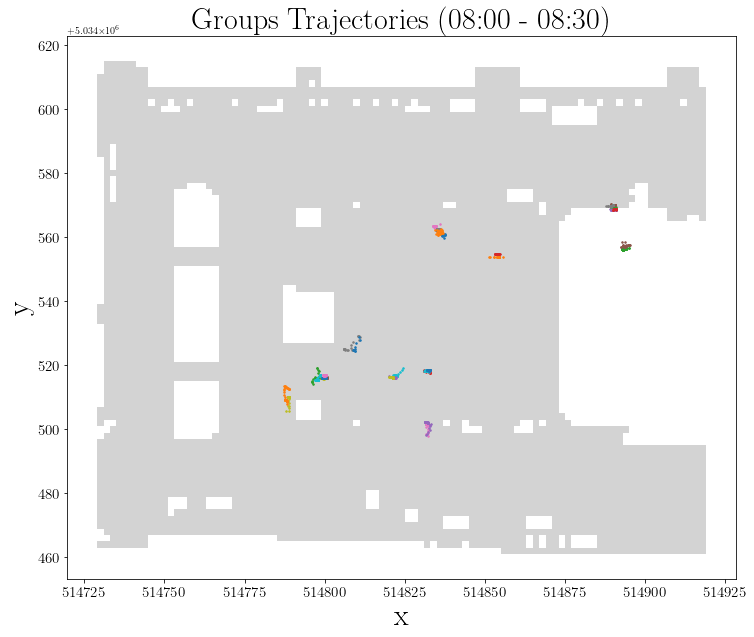

In [ ]:
import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig = plt.figure(figsize=(12, 12))
ids = lista_id_gruppi_2_3
traj_collection_df_new_app_groups = traj_collection_df_new_app.loc[traj_collection_df_new_app['id'].isin(lista_id_gruppi_2_3)]

for id_ in ids:
  # self_id = traj_collection_df_new_app.loc[traj_collection_df_new_app['id'].isin(lista_id_gruppi_2_3)][traj_collection_df_new_app.loc[traj_collection_df_new_app['id'].isin(list(df5[df5[0].isin(dim_groups)]['index']))]['id'] == id_]
  # self_id = traj_collection_df_new_app.loc[traj_collection_df_new_app['id']]
  self_id = traj_collection_df_new_app_groups[traj_collection_df_new_app_groups['id'] == id_]
  plt.plot(
            self_id['lon'],
            self_id['lat'],
            marker='o',
            linestyle='None',  # to plot only markers without lines
            markersize=1.5,

            # color = tuple(int(i)/255 for i in str(self_id.iloc[0]['color'])[1:-1].split(','))  # elimino questa riga per versione originale
        )
  ax = plt.axes()

 
# Giving title to the plot
  
# Showing the plot using plt.show()
grid_duomo[1150:6700].to_crs(epsg=32632).plot(ax=ax, color='lightgrey')
plt.title('Groups Trajectories {}'.format(datetime_detection), fontsize=30)
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)

# Get the axes object
ax = plt.gca()
# Set the tick font size
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

In [ ]:
fig.savefig('groups_{}.png'.format(hour_label), dpi=300, bbox_inches='tight')

In [ ]:
# ----

In [ ]:
# plotto le traiettorie specifiche di alcuni gruppi

# df  # elenco coppie

In [ ]:
# di questi selezioni gli id filtrati che sono lista_id_gruppi_2_3
# len(lista_id_gruppi_2_3)

In [ ]:
# test = lista_id_gruppi_2_3[0:5]  # da cambiare trovare traiettorie ok da visualizzare

# import matplotlib as mpl
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

# fig = plt.figure(figsize=(12, 12))
# ids = lista_id_gruppi_2_3
# traj_collection_df_new_app_groups = traj_collection_df_new_app.loc[traj_collection_df_new_app['id'].isin(test)]
# # traj_collection_df_new_app_groups = traj_collection_df_new_app[traj_collection_df_new_app['id'] == 139807]
# # 46815, 47067
# # 139696, 139807
# # 257102, 257553

# for id_ in ids:
#   # self_id = traj_collection_df_new_app.loc[traj_collection_df_new_app['id'].isin(lista_id_gruppi_2_3)][traj_collection_df_new_app.loc[traj_collection_df_new_app['id'].isin(list(df5[df5[0].isin(dim_groups)]['index']))]['id'] == id_]
#   # self_id = traj_collection_df_new_app.loc[traj_collection_df_new_app['id']]
#   self_id = traj_collection_df_new_app_groups[traj_collection_df_new_app_groups['id'] == id_]
#   plt.plot(
#             self_id['lon'],
#             self_id['lat'],
#             marker='o',
#             linestyle='None',  # to plot only markers without lines
#             markersize=1.5,

#             # color = tuple(int(i)/255 for i in str(self_id.iloc[0]['color'])[1:-1].split(','))  # elimino questa riga per versione originale
#         )

#   ax = plt.axes()

  
# # Giving title to the plot
    
# # Showing the plot using plt.show()
# grid_duomo[1150:6700].to_crs(epsg=32632).plot(ax=ax, color='lightgrey')
# plt.title('Groups Trajectories {}'.format(datetime_detection), fontsize=30)
# plt.xlabel('x', fontsize=30)
# plt.ylabel('y', fontsize=30)

# # Get the axes object
# ax = plt.gca()
# # Set the tick font size
# ax.tick_params(axis='x', labelsize=15)
# ax.tick_params(axis='y', labelsize=15)

# plt.show()

In [ ]:
# x = [139696, 139807,
#      46815, 47067,
#      257102, 257553,
#      21198, 21576]
# x = [33186]

# # !pip install pymove
# import pymove
# import pymove as pm
# from pymove.visualization import folium as f, matplotlib as mpl
# from pymove.utils import visual
# mpl.plot_trajectories(traj_collection_df_new_app.loc[traj_collection_df_new_app['id'].isin(x)], return_fig=False, markersize=2.5)

In [ ]:
# ---

### Plot singoli

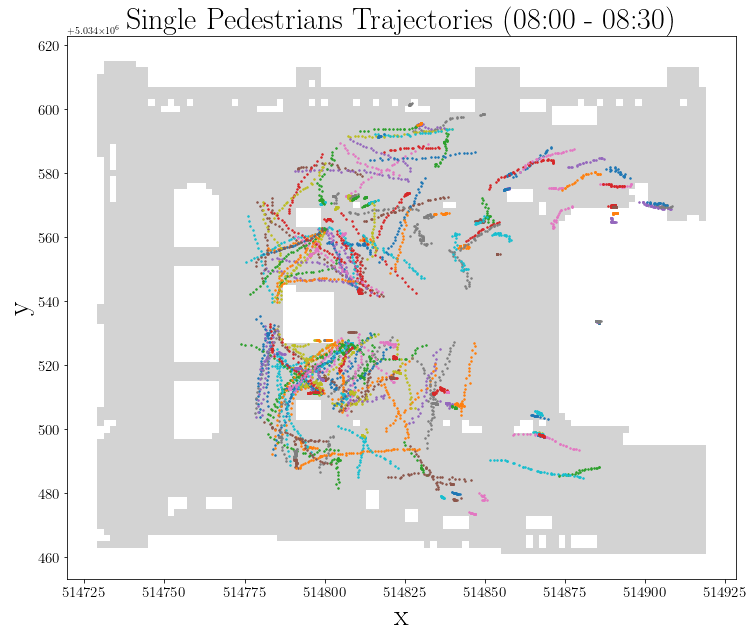

In [ ]:
# plot singoli

# list(set(traj_collection_df_new_app['id']))  # numero di id univoci che comprendono id che appartengono e id che non appartengono a gruppi - 1209
# list(newlist_set)  # sono tutti gli id che fanno aprte di gruppi - 217
# quindi mi apsetto che ci siano 1209-217 id di traiettorie individuali - corretto
lista_id_individuals = set([x for x in list(set(traj_collection_df_new_app['id'])) if x not in list(lista_id_gruppi)])  # se x non fa parte della lista id dei gruppi allora è una traiettoria individuale
lista_id_individuals  # individual trajectories

import matplotlib as mpl
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig = plt.figure(figsize=(12, 12))
ids = lista_id_individuals
traj_collection_df_new_app_individuals = traj_collection_df_new_app.loc[traj_collection_df_new_app['id'].isin(lista_id_individuals)]

for id_ in ids:

  self_id = traj_collection_df_new_app_individuals[traj_collection_df_new_app_individuals['id'] == id_]

  plt.plot(
            self_id['lon'],
            self_id['lat'],
            marker='o',
            linestyle='None',  # to plot only markers without lines
            markersize=1.5
        )
  ax = plt.axes()
 
# Giving title to the plot
  
# Showing the plot using plt.show()
grid_duomo[1150:6700].to_crs(epsg=32632).plot(ax=ax, color='lightgrey')
plt.title('Single Pedestrians Trajectories {}'.format(datetime_detection), fontsize=30)
plt.xlabel('x', fontsize=30)
plt.ylabel('y', fontsize=30)

# Get the axes object
ax = plt.gca()
# Set the tick font size
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()

In [ ]:
fig.savefig('singlepedestrians_{}.png'.format(hour_label), dpi=300, bbox_inches='tight')

In [ ]:
# sarebbe interessante analizzare le velocità dei gruppi vs singoli
# di solito i gruppi dovrebbero essere più elnti dei singoli


# groups
traiettorie_groups = df1.loc[df1['id'].isin(lista_id_gruppi_2_3)]

In [ ]:
traiettorie_groups['id'].nunique()

31

In [ ]:
# individuals
traiettorie_individuals = df1.loc[df1['id'].isin(lista_id_individuals)]

In [ ]:
traiettorie_individuals['id'].nunique()

224

### T-test Individuals vs Groups

In [ ]:
list_metric = ['distance', 'duration', 'avg_speed', 'avg_direction']

for metric in list_metric:
  print(metric)

  sample1 = list(traiettorie_individuals[metric])
  sample2 = list(traiettorie_groups[metric])

  t_stat, p_value = ttest_ind(sample1, sample2, alternative='two-sided')
  print('t_stat: {}'.format(round(t_stat,3)))
  print('p_value: {}'.format(format(p_value, ".3e")))

  if p_value < 0.001:
    print("----> DIFFERENZA STATISTICAMENTE SIGNIFICATIVA")
    print('p value<0.001')
  else:
    print("NO DIFFERENZA STATISTICAMENTE SIGNIFICATIVA")
  print('--------------------------------')

distance
t_stat: 5.333
p_value: 2.143e-07
----> DIFFERENZA STATISTICAMENTE SIGNIFICATIVA
p value<0.001
--------------------------------
duration
t_stat: -0.298
p_value: 7.660e-01
NO DIFFERENZA STATISTICAMENTE SIGNIFICATIVA
--------------------------------
avg_speed
t_stat: 5.475
p_value: 1.051e-07
----> DIFFERENZA STATISTICAMENTE SIGNIFICATIVA
p value<0.001
--------------------------------
avg_direction
t_stat: 2.963
p_value: 3.336e-03
NO DIFFERENZA STATISTICAMENTE SIGNIFICATIVA
--------------------------------


### ------> Tabella caratteristiche gruppi

In [ ]:
# tt = [df1[df1['id'].isin(lista1)]['id'].nunique(), df1[df1['id'].isin(lista2)]['id'].nunique()]
# [df1[df1['id'].isin(lista1)]['id'].nunique(), df1[df1['id'].isin(lista2)]['id'].nunique()]
# # objects = ('Tourists', 'Commuters')
# objects = ('Commuters', 'Tourists')
# plt.figure(figsize=(10, 7))
# plt.bar(objects, tt)
# plt.show()

In [ ]:
 # numero gruppi e individui e relative percentuali

print('Individuals: {}, {}%'.format(traiettorie_individuals['id'].nunique(), 
                               round(traiettorie_individuals['id'].nunique()*100/(traiettorie_groups['id'].nunique() + traiettorie_individuals['id'].nunique()),3)))
print('Groups: {}, {}%'.format(traiettorie_groups['id'].nunique(), 
                               round(traiettorie_groups['id'].nunique()*100/(traiettorie_groups['id'].nunique() + traiettorie_individuals['id'].nunique()),3)))

Individuals: 224, 87.843%
Groups: 31, 12.157%


In [ ]:
print('{} $\pm$ {} & {} $\pm$ {} & {} $\pm$ {} & {} $\pm$ {} & {} $\pm$ {} & {} $\pm$ {} & {} $\pm$ {} & {} $\pm$ {}'.format(
    round(traiettorie_individuals['distance'].mean(),3),
    round(traiettorie_individuals['distance'].std(),3),
    round(traiettorie_groups['distance'].mean(),3),
    round(traiettorie_groups['distance'].std(),3),
    round(traiettorie_individuals['duration'].mean(),3),
    round(traiettorie_individuals['duration'].std(),3),
    round(traiettorie_groups['duration'].mean(),3),
    round(traiettorie_groups['duration'].std(),3),
    round(traiettorie_individuals['avg_speed'].mean(),3),
    round(traiettorie_individuals['avg_speed'].std(),3),
    round(traiettorie_groups['avg_speed'].mean(),3),
    round(traiettorie_groups['avg_speed'].std(),3),
    round(traiettorie_individuals['avg_direction'].mean(),3),
    round(traiettorie_individuals['avg_direction'].std(),3),
    round(traiettorie_groups['avg_direction'].mean(),3),
    round(traiettorie_groups['avg_direction'].std(),3)
                   )
)

19.323 $\pm$ 10.478 & 9.156 $\pm$ 4.32 & 31.645 $\pm$ 15.501 & 32.516 $\pm$ 13.269 & 0.655 $\pm$ 0.378 & 0.28 $\pm$ 0.109 & 124.298 $\pm$ 58.713 & 92.416 $\pm$ 31.037


In [ ]:
print('distanza media traiettorie individuals: {}'.format(round(traiettorie_individuals['distance'].mean(),3)))
print('SD distanza media traiettorie individuals: {}'.format(round(traiettorie_individuals['distance'].std(),3)))

print(' ')
print(' ')

print('distanza media traiettorie gruppi: {}'.format(round(traiettorie_groups['distance'].mean(),3)))
print('SD distanza media traiettorie gruppi: {}'.format(round(traiettorie_groups['distance'].std(),3)))

# con l'orario 10.59 mi ritrovo con le osservazioni dei apper di andrea
# ovvero gruppi oiù lenti degli individui
# i gruppi essendo più lenti fanno meno strada e ci mettono di più

distanza media traiettorie individuals: 19.323
SD distanza media traiettorie individuals: 10.478
 
 
distanza media traiettorie gruppi: 9.156
SD distanza media traiettorie gruppi: 4.32


In [ ]:
print('durata media traiettorie individuals: {}'.format(round(traiettorie_individuals['duration'].mean(),3)))
print('SD durata media traiettorie individuals: {}'.format(round(traiettorie_individuals['duration'].std(),3)))

print(' ')
print(' ')

print('durata media traiettorie gruppi: {}'.format(round(traiettorie_groups['duration'].mean(),3)))
print('SD durata media traiettorie gruppi: {}'.format(round(traiettorie_groups['duration'].std(),3)))

durata media traiettorie individuals: 31.645
SD durata media traiettorie individuals: 15.501
 
 
durata media traiettorie gruppi: 32.516
SD durata media traiettorie gruppi: 13.269


In [ ]:
print('velocità media traiettorie individuals: {}'.format(round(traiettorie_individuals['avg_speed'].mean(),3)))
print('SD velocità media traiettorie individuals: {}'.format(round(traiettorie_individuals['avg_speed'].std(),3)))

print(' ')
print(' ')

print('velocità media traiettorie gruppi: {}'.format(round(traiettorie_groups['avg_speed'].mean(),3)))
print('SD velocità media traiettorie gruppi: {}'.format(round(traiettorie_groups['avg_speed'].std(),3)))

velocità media traiettorie individuals: 0.655
SD velocità media traiettorie individuals: 0.378
 
 
velocità media traiettorie gruppi: 0.28
SD velocità media traiettorie gruppi: 0.109


In [ ]:
print('direzione media traiettorie individuals: {}'.format(round(traiettorie_individuals['avg_direction'].mean(),3)))
print('SD direzione media traiettorie individuals: {}'.format(round(traiettorie_individuals['avg_direction'].std(),3)))

print(' ')
print(' ')

print('direzione media traiettorie gruppi: {}'.format(round(traiettorie_groups['avg_direction'].mean(),3)))
print('SD direzione media traiettorie gruppi: {}'.format(round(traiettorie_groups['avg_direction'].std(),3)))

direzione media traiettorie individuals: 124.298
SD direzione media traiettorie individuals: 58.713
 
 
direzione media traiettorie gruppi: 92.416
SD direzione media traiettorie gruppi: 31.037


## Filtro gruppi le cui traiettorie hanno in comune N punti

In [ ]:
# selezioned i gruppi le cui traiettorie hanno in comune tot punti

# list_thres_new = list(range(0, 100, 5))

# def soglia_gruppi(df, thres):
#   df = df
#   listaaa = []
#   for el in list(df[df[0]>thres]['index'].values): 
#     listaaa.append(str(el)[1:-1])
#   newlist = [num for item in listaaa for num in item.split(',')]
#   for i in range(len(newlist)):
#       newlist[i] = int(newlist[i])
#   return len(newlist)

 
# lista_results_gruppi = []
# for th in list_thres_new:
#   res = soglia_gruppi(df, th)
#   lista_results_gruppi.append(res)


# df_gruppi = pd.DataFrame(
#     {'threshold': list_thres_new,
#      'number_traj': lista_results_gruppi
#     }
# )

# df_gruppi['number_traj_eliminate'] = ((int(df_gruppi['number_traj'].head(1))-df_gruppi['number_traj'])*100)/int(df_gruppi['number_traj'].head(1))
# df_gruppi

# numero traj indica il numero di id univoci di traiettorie che prendono parte nrlla formazione di gruppi

In [ ]:
# listaaa = []
# for el in list(df[df[0]>20]['index'].values):  # > 20 singifica che che ci sono più di 20 frame consecutivi, in questo caso 20 sec perchè stiamo considerando ogni 15 frame quindi ogni secondo
#   listaaa.append(str(el)[1:-1])

# listaaa
# newlist = [num for item in listaaa for num in item.split(',')]
# newlist

# for i in range(len(newlist)):
#     newlist[i] = int(newlist[i])

# newlist  # 2273 con soglia 0 compare più volte quindi signfica che è in coppia con altri punti, quindi potremmo avere gruppi di più di 2 persone. 
# Perciò se io trovo 2273 significa che fa parte di 3 gruppi e per la proprietà transisitva allora stanno tutti insieme

In [ ]:
# newlist

In [ ]:
# per avere numero id univoci che fanno aprte di gruppi per fare eventuali calcoli

# newlist_set = set(newlist) 
# len(newlist_set)

In [ ]:
# d = Counter(newlist)
# df5 = pd.DataFrame.from_dict(d, orient='index').reset_index()
# df5.head()

In [ ]:
# Counter(df5[0])  


# 1 singifica che stiamo parlando di 2 persone
# 2 significa che stiamo parlando di 3 persone -> A con B e A con C quindi anche B con C


# potremmo selezionare solo gruppi di 2 e 3 persone
# mousaid paper conteggio gruppi folla

In [ ]:
# lista_tempo = [1,2]  # a noi ci interessano i gruppi 1,2,3 perosne quindi 1,2

# # list(df5[df5[0].isin(lista_tempo)]['index'])

# len(list(df5[df5[0].isin(lista_tempo)]['index']))  # numero di id che partecipano alla formazione di gruppi di 1 o 2 persone, eliminiamo quegli id che fanno parte di più di 2 gruppi

In [ ]:
# traj_collection_df_new_app.loc[traj_collection_df_new_app['id'].isin(list(df5[df5[0].isin(lista_tempo)]['index']))]

In [ ]:
# selezione gruppi che hanno tot punti in comune
# mpl.plot_trajectories(traj_collection_df_new_app.loc[traj_collection_df_new_app['id'].isin(list(df5[df5[0].isin(lista_tempo)]['index']))],return_fig=False, markersize=0.5, markers='-', figsize = (15,15))

# plt.title('Groups trajectories', fontsize=20)
# plt.xlabel('x', fontsize=20)
# plt.ylabel('y', fontsize=20)
# plt.show()


# codice colore 
# coppia arancione arancione chiaro
# colore univoco per gruppi

## Groups - Commuters plot

In [ ]:
# def intersection(lst1, lst2):
#     lst3 = [value for value in lst1 if value in lst2]
#     return lst3

# # newlist  # devo capire quali appartengono al cluster 1 e quali al cluster 2 
# newlist = lista_gruppi  # se scelgo filtro punti inzio e fine vicini

# intersection(newlist, lista1)  # traiettorie commuters 

# intersection(newlist, lista2)  # traiettorie turisti

In [ ]:
# tra gli id che fanno parte dei gruppi quanti commuters ci sono

# len(intersection(newlist, lista1))  # infatti anche Andrea diceva che i commuter soltimente non viaggiono in gruppo

In [ ]:
# tra gli id che fanno parte dei gruppi quanti turisti ci sono

# len(intersection(newlist, lista2) )

In [ ]:
# gruppi che sono commuters
# mpl.plot_trajectories(traj_collection_df_new_app.loc[traj_collection_df_new_app['id'].isin(intersection(newlist, lista1))],
#                       return_fig=False, markersize=0.5, markers='-', figsize = (15,15))

# plt.title('Commuters Groups trajectories', fontsize=20)
# plt.xlabel('x', fontsize=20)
# plt.ylabel('y', fontsize=20)
# plt.show()

## Groups - Tourists plot

In [ ]:
# gruppi che sono toursits
# mpl.plot_trajectories(traj_collection_df_new_app.loc[traj_collection_df_new_app['id'].isin(intersection(newlist, lista2))],
#                       return_fig=False, markersize=0.5, markers='-', figsize = (15,15))

# plt.title('Tourists Groups trajectories', fontsize=20)
# plt.xlabel('x', fontsize=20)
# plt.ylabel('y', fontsize=20)
# plt.show()

# # più probabile che un commuter non viaggi in gruppo

In [ ]:
# fig = plt.figure(figsize=(20, 20))
# ids = traj_collection_df_new_app.loc[traj_collection_df_new_app['id'].isin(newlist)]['id'].unique()
# for id_ in ids:
#   self_id = traj_collection_df_new_app.loc[traj_collection_df_new_app['id'].isin(newlist)][traj_collection_df_new_app.loc[traj_collection_df_new_app['id'].isin(newlist)]['id'] == id_]
#   plt.plot(
#             self_id['lon'],
#             self_id['lat'],
#             # markers= 'o',
#             # markersize=12
#         )
#   ax = plt.axes()
 
#   # Giving title to the plot
  
#   # Showing the plot using plt.show()
# grid_duomo.to_crs(epsg=32632).plot(ax=ax, color='lightgrey')

# plt.show()

In [ ]:
# velocità media commuter e turista

# più probabile che un commuter non viaggi in gruppo

In [ ]:
# group detection - velocità coem terza dimensione

# clustering

In [ ]:
!pip freeze

absl-py==1.4.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.4
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
atomicwrites==1.4.1
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
backports.zoneinfo==0.2.1
beautifulsoup4==4.6.3
bleach==6.0.0
blis==0.7.9
bokeh==2.4.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
cftime==1.6.2
chardet==4.0.0
charset-normalizer==3.0.1
click==8.1.3
click-plugins==1.1.1
cligj==0.7.2
clikit==0.6.2
cloudpickle==2.2.1
cmake==3.22.6
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.3
cycler==0.11.0
cymem==2.0.7
Cython==0.29.33
dask==2022.2.1
datascienc

In [ ]:
# !pip freeze > requirements.txt

## Barchart Groups size

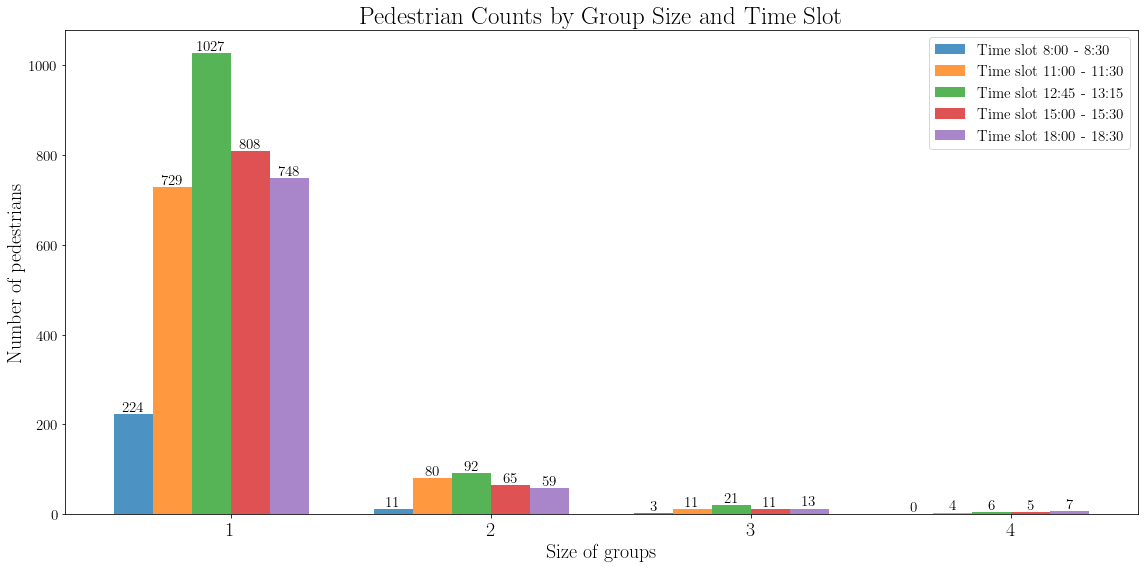

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Dati del grafico
num_groups = 4
num_timeslots = 5
pedestrian_counts = np.array([[224, 729, 1027, 808, 748], 
                              [11, 80, 92, 65, 59], 
                              [3, 11, 21, 11, 13], 
                              [0, 4, 6, 5, 7]])
# per valori superiori a 4 non li riporto



# Etichette per l'asse X
group_labels = ['1', '2', '3', '4']

# Creazione del grafico
fig, ax = plt.subplots(figsize=(16, 8))
index = np.arange(num_groups)
bar_width = 0.15
opacity = 0.8

for i in range(num_timeslots):
    rects = ax.bar(index + (i * bar_width), pedestrian_counts[:,i], bar_width,
                    alpha=opacity,
                    label='Time Slot '+str(i+1))
    # Aggiungi il valore sopra ogni barra
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=15)

# Aggiunta delle etichette, titoli e legenda
ax.set_xlabel('Size of groups')
ax.set_ylabel('Number of pedestrians')
ax.set_title('Pedestrian Counts by Group Size and Time Slot', fontsize=25)
ax.set_xticks(index + (bar_width*num_timeslots)/2)
ax.set_xticklabels(group_labels)
ax.legend()

# Nuovi nomi dei time slot
timeslot_labels = ['Time slot 8:00 - 8:30', 'Time slot 11:00 - 11:30', 'Time slot 12:45 - 13:15', 'Time slot 15:00 - 15:30', 'Time slot 18:00 - 18:30']

# Cambio dei nomi nella legenda
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, timeslot_labels, prop={'size': 15}, title_fontsize=12)

plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

ax.tick_params(axis='x', labelsize=20) 
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Size of groups')
ax.set_ylabel('Number of pedestrians')

plt.tight_layout()
plt.show()

In [ ]:
# Individuals: 224, 87.843%
# Groups: 31, 12.157%

# Individuals: 729, 79.067%
# Groups: 193, 20.933%

# Individuals: 1027, 80.612%
# Groups: 247, 19.388%

# Individuals: 808, 83.299%
# Groups: 162, 16.701%

# Individuals: 748, 82.652%
# Groups: 157, 17.348%


# import numpy as np

# # individuals
# individuals = [87.843, 79.067, 80.612, 83.299, 82.652]
# print(round(np.mean(individuals),3))
# print(round(np.std(individuals),3))

# print('')

# # groups
# groups = [12.157, 20.933, 19.388, 16.701, 17.348]
# print(round(np.mean(groups),3))
# print(round(np.std(groups),3))